<a href="https://colab.research.google.com/github/Anna-Blokhina/Game_analysis/blob/main/2_GamesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Планы:
* можно проверить гипотезу ближе к теме: если  в первой игре был консенсус, то во второй тоже будет?
* вообще надо посмотреть например на YH первую игру и YH вторую игру и сравнить поведение людей: и статистику и визуально, может что заметим. Общая статистика, графики поведений.
* ещё идея по типу моей статьи, которую я тебе присылал: попробовать провести классификацию решений (не)использовать PI на каждом шаге в зависимости от истории шага: действия/выигрыш/штраф на прошлом шаге, рост действий/ресурса/выигрышей/штрафов на прошлом шаге и т.п. признаки


In [ ]:
# можно не выполнять если вторая ячейка выполнится
!curl -O https://raw.githubusercontent.com/moskvo/allocation-games/gh-pages/0.GamesDefinitions-Web.py
%run 0.GamesDefinitions-Web.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 22940  100 22940    0     0   107k      0 --:--:-- --:--:-- --:--:--  107k
[38.33333333 38.33333333 38.33333333]
[1. 3. 5.]


In [ ]:
%ls

0.GamesDefinitions-Web.py  sample_data/


In [ ]:
import matplotlib.pyplot as plt

## Функции формирования таблиц для анализа

In [ ]:
def individual_decisions(data, eps=0.000001):
  """Makes table with analysis of individual decisions
  """
  dec = data[data.Time>1]
  results = { 
      'games' : len(dec.Game.unique()),
      'total iterations' : len(dec.groupby(['Game','Time'])),
      'total decisions' : len(dec),
      
      'Rtnl' : (data['Fii>Fiprev']==1).sum(),
      'Toward BR' : (data.twbr==1).sum(),
      'BR(1)' : (data.br1==1).sum(),
      
      'Agree CB' : (data.iscb0==1).sum(),
      'Waiting CB(1)\ACB' : ((data.iscb1==1) & (data.iscb0==0)).sum(),
      'Rational WCB(1)\ACB' : ((data.twbr==1) & (data.iscb1==1) & (data.iscb0==0)).sum(),
      
      'NI' : (data['Ui>Uprev']==1).sum(),
      'NI\WCB(1)' : ((data['Ui>Uprev']==1) & (data.iscb1==0)).sum(),
      'Rational NI\WCB(1)' : ((data.twbr==1) & (data['Ui>Uprev']==1) & (data.iscb1==0)).sum(),
      
      'Local NI' : (data['Uloci']>eps).sum(), # for weak Pareto: (data['Uloci']>eps).sum()
      'Local NI & NI': ((data['Uloci']>eps) & (data['Ui>Uprev']==1) ).sum(),
      'LNI\WCB(1)' : ((data['Uloci']>eps) & (data.iscb1==0)).sum(),
      'LNI\\NI' : ((data['Uloci']>eps) & (data['Ui>Uprev']==0)).sum(),
      'LNI\\NI\\WCB(1)' : ((data['Uloci']>eps) & (data['Ui>Uprev']==0) & (data.iscb1==0)).sum(),
      'Rational LNI\WCB(1)' : ((data.twbr==1) & (data['Uloci']>eps) & (data.iscb1==0)).sum(),
      'LN>LNprev&LNI' : ((data['Uloci>Ulocprev']==1) & (data['Uloci']>eps)).sum(),
      'LN>LNprev\\WCB(1)' : ((data['Uloci>Ulocprev']==1) & (data['Uloci']>eps) & (data.iscb1==0)).sum(),
      'LN>LNprev\\NI' : ((data['Uloci>Ulocprev']==1) & (data['Uloci']>eps) & (data['Ui>Uprev']==0)).sum(),
      
      'Weak Pareto' : ((data['Fi>=Fprev']==1) & (data['anyFi>Fprev']==1)).sum(),
      #'Strong Pareto': (data['Fi>Fprev']>eps).sum()
      'Strong Pareto': (data['Fi>Fprev']==1).sum(),

      #'Message decrease': (data['dsi']<0).sum()
      }
  return results

#         'Local NI' : (data['Uloci>Ulocprev']==1).sum(),
#         'Local NI & NI': ((data['Uloci>Ulocprev']==1) & (data['Ui>Uprev']==1) ).sum(),
#         'LNI\WCB(1)' : ((data['Uloci>Ulocprev']==1) & (data.iscb1==0)).sum(),
#         'Rational LNI\WCB(1)' : ((data.twbr==1) & (data['Uloci>Ulocprev']==1) & (data.iscb1==0)).sum(),
#         'LNI\\NI' : ((data['Uloci>Ulocprev']==1) & (data['Ui>Uprev']==0)).sum(),
#         'LNI\\NI\\WCB(1)' : ((data['Uloci>Ulocprev']==1) & (data['Ui>Uprev']==0) & (data.iscb1==0)).sum(),
#         'LNI&LN>0' : ((data['Uloci>Ulocprev']==1) & (data['Uloci']>0.00001)).sum(),
#         'LNI>0\\WCB(1)' : ((data['Uloci>Ulocprev']==1) & (data['Uloci']>0.00001) & (data.iscb1==0)).sum(),
#         'LNI>0\\NI' : ((data['Uloci>Ulocprev']==1) & (data['Uloci']>0.00001) & (data['Ui>Uprev']==0)).sum()


In [ ]:
def situations(data):
    dec = data[data.Time>1]
    sits = dec.groupby(['Game','Time'])
    results = { 
        'games' : len(dec.Game.unique()),
        'total situations' : len(sits),
        
        'One Rtnl' : sits.apply(lambda x: (x['Fii>Fiprev']==1).any()).sum(),
        'All Rtnl' : sits.apply(lambda x: (x['Fii>Fiprev']==1).all()).sum(),
        'One BR(1)' : sits.apply(lambda x: (x.br1==1).any()).sum(),
        'Two BR(1)' : sits.apply(lambda x: (x.br1==1).sum()>=2).sum(),
        'All BR(1)' : sits.apply(lambda x: (x.br1==1).all()).sum(),
        'One TBR' : sits.apply(lambda x: (x.twbr==1).any()).sum(),
        'Two TBR' : sits.apply(lambda x: (x.twbr==1).sum()>=2).sum(),
        'All TBR' : sits.apply(lambda x: (x.twbr==1).all()).sum(),
        
        'One ACB' : sits.apply(lambda x: (x.iscb0==1).any()).sum(),
        'Two ACB' : sits.apply(lambda x: (x.iscb0==1).sum()>=2).sum(),        
        'All ACB' : sits.apply(lambda x: (x.iscb0==1).all()).sum(),
        'One Waiting CB(1)' : sits.apply(lambda x: ((x.iscb1==1) ).any()).sum(),
        'Two Waiting CB(1)' : sits.apply(lambda x: ((x.iscb1==1) ).sum()>=2).sum(),
        'All Waiting CB(1)' : sits.apply(lambda x: ((x.iscb1==1) ).all()).sum(),
        'One Waiting CB(1)\ACB' : sits.apply(lambda x: ((x.iscb1==1) & (x.iscb0==0)).any()).sum(),
        'Two Waiting CB(1)\ACB' : sits.apply(lambda x: ((x.iscb1==1) & (x.iscb0==0)).sum()>=2).sum(),
        'All Waiting CB(1)\ACB' : sits.apply(lambda x: ((x.iscb1==1) & (x.iscb0==0)).all()).sum(),
        'One Rational WCB(1)\ACB' : sits.apply(lambda x: ((x.twbr==1) & (x.iscb1==1) & (x.iscb0==0)).any()).sum(),
        'Two Rational WCB(1)\ACB' : sits.apply(lambda x: ((x.twbr==1) & (x.iscb1==1) & (x.iscb0==0)).sum()>=2).sum(),
        'All Rational WCB(1)\ACB' : sits.apply(lambda x: ((x.twbr==1) & (x.iscb1==1) & (x.iscb0==0)).all()).sum(),
        }
    return results

def Nash_situations(data):
    dec = data[data.Time>1]
    sits = dec.groupby(['Game','Time'])
    results = { 
        'games' : len(dec.Game.unique()),
        'total situations' : len(sits),

        'One NI' : sits.apply(lambda x: (x['Ui>Uprev']==1).any()).sum(),
        'Two NI' : sits.apply(lambda x: (x['Ui>Uprev']==1).sum()>=2).sum(),
        'All NI' : sits.apply(lambda x: (x['Ui>Uprev']==1).all()).sum(),
        'One NI\WCB(1)' : sits.apply(lambda x: ((x['Ui>Uprev']==1) & (x.iscb1==0)).any()).sum(),
        'Two NI\WCB(1)' : sits.apply(lambda x: ((x['Ui>Uprev']==1) & (x.iscb1==0)).sum()>=2).sum(),
        'All NI\WCB(1)' : sits.apply(lambda x: ((x['Ui>Uprev']==1) & (x.iscb1==0)).all()).sum(),
        'One Rational NI\WCB(1)' : sits.apply(lambda x: ((x.twbr==1) & (x['Ui>Uprev']==1) & (x.iscb1==0)).any()).sum(),
        'Two Rational NI\WCB(1)' : sits.apply(lambda x: ((x.twbr==1) & (x['Ui>Uprev']==1) & (x.iscb1==0)).sum()>=2).sum(),
        'All Rational NI\WCB(1)' : sits.apply(lambda x: ((x.twbr==1) & (x['Ui>Uprev']==1) & (x.iscb1==0)).all()).sum(),
        
        'One Local NI' : sits.apply(lambda x: (x['Uloci']>0.00001).any()).sum(),
        'Two Local NI' : sits.apply(lambda x: (x['Uloci']>0.00001).sum()>=2).sum(),
        'All Local NI' : sits.apply(lambda x: (x['Uloci']>0.00001).all()).sum(),

        'Real NI' : sits.apply(lambda x: (x['Unew>Uprev']==1).all()).sum(),
        'Real LNI': sits.apply(lambda x: (x['Ulocnew']>0.00001).all()).sum(),
        'Real LNI & Real NI': sits.apply(lambda x: ((x['Unew>Uprev']==1) & (x['Ulocnew']>0.00001)).all()).sum(),
        'Real LNI & All LNI': sits.apply(lambda x: ((x['Ulocnew']>0.00001) & (x['Uloci']>0.00001)).all()).sum(),
        'Real LNI & All LNI & Real NI': sits.apply(lambda x: ((x['Ulocnew']>0.00001) & (x['Uloci']>0.00001) & (x['Unew>Uprev']==1)).all()).sum(),
        
        #'Weak Pareto': sits.apply(lambda x:  ((x['Fnew>=Fprev']==1) & (x['anyFi>Fprev']==1)).all()).sum(),

        'LNI\WCB(1)' : sits.apply(lambda x:  ((x['Uloci']>0.00001) & (x.iscb1==0)).any()).sum(),
        'Rational LNI\WCB(1)' : sits.apply(lambda x:  ((x.twbr==1) & (x['Uloci']>0.00001) & (x.iscb1==0)).any()).sum(),
        "LNI\\NI" : sits.apply(lambda x:  ((x['Uloci']>0.00001) & (x['Ui>Uprev']==1)).any()).sum(),
        'LNI&LN>0' : sits.apply(lambda x:  ((x['Uloci>Ulocprev']==1) & (x['Uloci']>0.00001)).any()).sum(),
        'LNI>0\WCB(1)' : sits.apply(lambda x:  ((x['Uloci>Ulocprev']==1) & (x['Uloci']>0.00001) & (x.iscb1==0)).any()).sum()
       
        }
    return results

def RealNash_situations_origins(data):
    def mydiv(a,b):
        if b == 0:
            return -1
        return (a*100) // b;
    dec = data[data.Time>1]
    sits = dec.groupby(['Game','Time'])
    results = { 
        'games' : len(dec.Game.unique()),
        'total situations' : len(sits),

        'Real NI' : sits.apply(lambda x: (x['Unew>Uprev']==1).all()).sum(),
        'Real NI & no One NI' : sits.apply(lambda x: ((x['Unew>Uprev']==1) & (x['Ui>Uprev']==0)).all()).sum(),
        'Real NI & no One LNI' : sits.apply(lambda x: ((x['Unew>Uprev']==1) & (x['Uloci>Ulocprev']==0)).all()).sum(),
        'One NI vs Real NI %' : mydiv( sits.apply(lambda x: ((x['Unew>Uprev']==1) & (x['Ui>Uprev']==1)).sum()>=1).sum() ,
                                sits.apply(lambda x: ((x['Unew>Uprev']==0) & (x['Ui>Uprev']==1)).sum()>=1).sum() ),
        'Two NI vs Real NI %' : mydiv( sits.apply(lambda x: ((x['Unew>Uprev']==1) & (x['Ui>Uprev']==1)).sum()>=2).sum() ,
                                sits.apply(lambda x: ((x['Unew>Uprev']==0) & (x['Ui>Uprev']==1)).sum()>=2).sum() ),
        'All NI vs Real NI %' : mydiv( sits.apply(lambda x: ((x['Unew>Uprev']==1) & (x['Ui>Uprev']==1)).all()).sum() ,
                                sits.apply(lambda x: ((x['Unew>Uprev']==0) & (x['Ui>Uprev']==1)).all()).sum() ),
        'Real NI & All NI': sits.apply(lambda x: ((x['Unew>Uprev']==1) & (x['Ui>Uprev']==1)).all()).sum(),
        'Real NI & All LNI': sits.apply(lambda x: ((x['Unew>Uprev']==1) & (x['Uloci>Ulocprev']==1)).all()).sum(),

        'Real LNI': sits.apply(lambda x: (x['Ulocnew>Ulocprev']==1).all()).sum(),
        'Real LNI & no One LNI': sits.apply(lambda x: ((x['Ulocnew>Ulocprev']==1) & (x['Uloci>Ulocprev']==0)).all()).sum(),
        'Real LNI & no One NI': sits.apply(lambda x: ((x['Ulocnew>Ulocprev']==1) & (x['Ui>Uprev']==0)).all()).sum(),
        'One LNI vs Real LNI %': mydiv( sits.apply(lambda x: ((x['Ulocnew>Ulocprev']==1) & (x['Uloci>Ulocprev']==1)).sum()>=1).sum(),
                                     sits.apply(lambda x: ((x['Ulocnew>Ulocprev']==0) & (x['Uloci>Ulocprev']==1)).sum()>=1).sum() ),
        'Two LNI vs Real LNI %': mydiv( sits.apply(lambda x: ((x['Ulocnew>Ulocprev']==1) & (x['Uloci>Ulocprev']==1)).sum()>=2).sum(),
                                     sits.apply(lambda x: ((x['Ulocnew>Ulocprev']==0) & (x['Uloci>Ulocprev']==1)).sum()>=2).sum() ),
        'All LNI vs Real LNI %': mydiv( sits.apply(lambda x: ((x['Ulocnew>Ulocprev']==1) & (x['Uloci>Ulocprev']==1)).all()).sum(),
                                     sits.apply(lambda x: ((x['Ulocnew>Ulocprev']==0) & (x['Uloci>Ulocprev']==1)).all()).sum() ),
        'Real LNI & All LNI': sits.apply(lambda x: ((x['Ulocnew>Ulocprev']==1) & (x['Uloci>Ulocprev']==1)).all()).sum(),
        'Real LNI & All NI': sits.apply(lambda x: ((x['Ulocnew>Ulocprev']==1) & (x['Ui>Uprev']==1)).all()).sum(),

        'One TBR vs Real NI %' : mydiv( sits.apply(lambda x: ((x['Unew>Uprev']==1) & (x['twbr']==1)).sum()>=1).sum(),
                                    sits.apply(lambda x: ((x['Unew>Uprev']==0) & (x['twbr']==1)).sum()>=1).sum() ),
        'One ACB vs Real NI %' : mydiv( sits.apply(lambda x: ((x['Unew>Uprev']==1) & (x['iscb0']==1)).sum()>=1).sum(),
                                     sits.apply(lambda x: ((x['Unew>Uprev']==0) & (x['iscb0']==1)).sum()>=1).sum() ),

        'One TBR vs Real LNI %' : mydiv( sits.apply(lambda x: ((x['Ulocnew>Ulocprev']==1) & (x['twbr']==1)).sum()>=1).sum(),
                                      sits.apply(lambda x: ((x['Ulocnew>Ulocprev']==0) & (x['twbr']==1)).sum()>=1).sum() ),
        'One ACB vs Real LNI %' : mydiv( sits.apply(lambda x: ((x['Ulocnew>Ulocprev']==1) & (x['iscb0']==1)).sum()>=1).sum(),
                                      sits.apply(lambda x: ((x['Ulocnew>Ulocprev']==0) & (x['iscb0']==1)).sum()>=1).sum() ),
        
        'All LNI & All NI': sits.apply(lambda x: ((x['Uloci>Ulocprev']==1) & (x['Ui>Uprev']==1)).all()).sum(),
        'All LNI & All NI': sits.apply(lambda x: ((x['Uloci>Ulocprev']==1) & (x['Ui>Uprev']==1)).all()).sum(),
        'Real LNI & All LNI & Real NI': sits.apply(lambda x: ((x['Ulocnew>Ulocprev']==1) & (x['Uloci>Ulocprev']==1) & (x['Unew>Uprev']==1)).all()).sum(),
        'Real LNI & All LNI & not Real NI': sits.apply(lambda x: ((x['Ulocnew>Ulocprev']==1) & (x['Uloci>Ulocprev']==1) & (x['Unew>Uprev']==0)).all()).sum(),

    }
    return results

In [ ]:
def getSituationsTable(statfunc,data,consensusgames):
  sit_cons = statfunc(data[data.Game.isin(consensusgames)])
  sit_notcons = statfunc(data[~data.Game.isin(consensusgames)])
  sit = statfunc(data)

  table = pd.concat([pd.DataFrame.from_dict(sit,'index',columns=['All games']), pd.DataFrame.from_dict(sit_notcons,'index',columns=['Not Consensus']),
                        pd.DataFrame.from_dict(sit_cons,'index',columns=['Consensus'])], axis=1 )
  return table


# Статья 2019 по результату GTM2019. Нэш-торги в механизме распределения ресурса YH

In [ ]:
YHBadGames = [58,59,62]
YHConsensusGames = [41,42,56]
YHGames = Games[(Games.Mechname=='yh') & (Games.GameMech=='agree') & (~Games.Game.isin(YHBadGames))]
YHData = Alldata[Alldata.Game.isin(YHGames.Game)].copy()
print(YHData.Game.unique())
YHData.shape

[40 41 42 43 56 57 60 61 92 93 94]


(978, 18)

Игры не включённые (BadGames):

* 58 - все кроме одного вообще не меняют заявки в течение 15 шагов, а один меняет с точностью 0.1
* 59,62 - два шага

In [ ]:
YHGames[(~YHGames.Game.isin(YHBadGames)) & (~YHGames.Game.isin(YHConsensusGames))].Game

39    40
42    43
56    57
59    60
60    61
91    92
92    93
93    94
Name: Game, dtype: int64

## Добавляем столбец является ли шаг константным поведением

In [ ]:
# Считает несколько секунд
cb = getCBwithEps(YHData,eps=0)
YHData = DataMarkedCB(YHData,cb,'iscb0')
cb = getCBwithEps(YHData,eps=0.51)
YHData = DataMarkedCB(YHData,cb,'iscb0.5')
cb = getCBwithEps(YHData,eps=1.01)
YHData = DataMarkedCB(YHData,cb,'iscb1')
del cb

## Nash bargaining

Fi>Fprev == Uiloc == LNI

In [ ]:
YHNB = NashData_bySubjects(YHMechanism, YHData, [0,0,0])
YHData = pd.merge(YHData, YHNB, on=['Game', 'Time','GrSubject'], how='outer')
YHData.head()

,Game,Time,Subject,Group,GrSubject,Type,Gain,Penalty,x,s1,...,Fii>Fiprev,Ui,Uloci,Unew,Uprev,Ulocnew,Ulocnew>Ulocprev,dsi,dxi,dti
0,40,1,11,1,1,1,1.131904,0.10700,0.534884,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40,1,6,1,2,9,2.129054,5.74200,52.953488,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,40,1,10,1,3,25,3.551163,5.75000,61.511628,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,40,2,11,1,1,1,1.142498,0.11770,0.588099,NaN,...,1.0,-0.182068,-5.028777e-07,-0.182068,-0.166445,-5.028777e-07,-1.0,0.1,0.053215,0.0107
4,40,2,6,1,2,9,2.122540,5.74695,52.928870,NaN,...,0.0,-0.166445,0.000000e+00,-0.182068,-0.166445,-5.028777e-07,-1.0,0.0,0.000000,0.0000


## Добавляем столбец с Наилучшим ответом и гамма (вел-на шага в индикаторном поведении)

In [ ]:
csvfile = 'https://raw.githubusercontent.com/moskvo/allocation-games/gh-pages/YHBRdata.csv'

BRdata = pd.read_csv(csvfile,header=None)
BRdata.columns = ['Game','Time','g1','g2','g3','br1','br2','br3']

br1 = BRdata[['Game','Time','g1','br1']].copy()
br1.columns = ['Game','Time','g','br']
br1['GrSubject'] = 1
##br1.insert(br1.shape[1],'GrSubject',1)

br2 = BRdata[['Game','Time','g2','br2']].copy()
br2.columns = ['Game','Time','g','br']
br2['GrSubject'] = 2
##br2.insert(br2.shape[1],'GrSubject',2)

br3 = BRdata[['Game','Time','g3','br3']].copy()
br3.columns = ['Game','Time','g','br']
br3['GrSubject'] = 3
##br3.insert(br3.shape[1],'GrSubject',3)

BRdata=pd.concat([br1,br2,br3])

BRdata.head()

,Game,Time,g,br,GrSubject
0,40.0,2.0,0.013325,8.504692,1
1,40.0,3.0,-0.013505,8.504692,1
2,40.0,4.0,0.013325,8.504692,1
3,40.0,5.0,2.953944,39.658624,1
4,40.0,6.0,1.513113,39.658624,1


In [ ]:
YHData = pd.merge(YHData, BRdata[~BRdata.Game.isin(YHBadGames)], on=['Game', 'Time','GrSubject'], how='outer')
c1,c2 = YHData['s2'],YHData['br']
YHData['br0'] = ((c1-c2).abs() < 0.01).astype('float64')
YHData['br0.5'] = ((c1-c2).abs() < 0.51).astype('float64')
YHData['br1'] = ((c1-c2).abs() < 1.01).astype('float64')
YHData['twbr'] = (YHData['g'] > 0).astype('float64')
YHData.head()

,Game,Time,Subject,Group,GrSubject,Type,Gain,Penalty,x,s1,...,Ulocnew>Ulocprev,dsi,dxi,dti,g,br,br0,br0.5,br1,twbr
0,40,1,11,1,1,1,1.131904,0.10700,0.534884,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,40,1,6,1,2,9,2.129054,5.74200,52.953488,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,40,1,10,1,3,25,3.551163,5.75000,61.511628,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,40,2,11,1,1,1,1.142498,0.11770,0.588099,NaN,...,-1.0,0.1,0.053215,0.0107,0.013325,8.504692,0.0,0.0,0.0,1.0
4,40,2,6,1,2,9,2.122540,5.74695,52.928870,NaN,...,-1.0,0.0,0.000000,0.0000,0.000000,27.598804,0.0,0.0,0.0,0.0


In [ ]:
# YHData.to_csv('YH_BR_CB_NB_data_2021jun24.csv',sep=';')

In [ ]:
YHData[YHData['Fi>Fprev']>0.0001]

,Game,Time,Subject,Group,GrSubject,Type,Gain,Penalty,x,s1,...,Ulocnew>Ulocprev,dsi,dxi,dti,g,br,br0,br0.5,br1,twbr
10,40,4,6,1,2,9,6.085187,1.252000,44.834308,NaN,...,1.0,-59.0,-23.466309,-3.42200,0.826317,27.598804,0.0,0.0,0.0,1.0
11,40,4,10,1,3,25,8.428066,1.263825,68.932749,NaN,...,1.0,-53.5,-17.719058,-2.67500,0.612168,27.605742,0.0,0.0,0.0,1.0
19,40,7,6,1,2,9,5.232570,1.622000,37.985136,NaN,...,0.0,-51.0,-22.826494,-2.06550,1.135462,46.084369,0.0,0.0,0.0,1.0
26,40,9,10,1,3,25,6.218916,2.400000,49.285714,NaN,...,0.0,-20.0,-7.725773,-0.41200,1.546870,67.070666,0.0,0.0,0.0,1.0
28,40,10,6,1,2,9,3.964668,2.070000,27.417219,NaN,...,0.0,-4.0,-2.415966,-0.20000,0.900411,35.557585,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,93,11,5,2,3,25,7.456471,0.765000,42.592593,NaN,...,0.0,-30.0,-16.916129,-1.42500,1.022223,30.652201,0.0,0.0,1.0,1.0
926,94,3,8,3,3,25,6.668881,1.980000,49.803150,NaN,...,0.0,-35.0,-13.908429,-0.98000,1.043038,56.444165,0.0,0.0,0.0,1.0
934,94,6,7,3,2,9,6.367044,0.962500,44.722222,NaN,...,0.0,-3.3,-1.986218,-0.17325,0.620238,32.979463,0.0,0.0,0.0,1.0
947,94,10,8,3,3,25,6.856247,1.172500,39.460784,NaN,...,1.0,-33.0,-18.465142,-1.10550,1.721155,48.826832,0.0,0.0,0.0,1.0


In [ ]:
YHData[(YHData.Game==40) & (YHData.Time>2) & (YHData.Time<5)]

,Game,Time,Subject,Group,GrSubject,Type,Gain,Penalty,x,s1,...,Ulocnew>Ulocprev,dsi,dxi,dti,g,br,br0,br0.5,br1,twbr
6,40,3,11,1,1,1,1.131904,0.107000,0.534884,NaN,...,0.0,-0.1,-0.053215,-0.0107,-0.013505,8.504692,0.0,0.0,0.0,0.0
7,40,3,6,1,2,9,2.129054,5.742000,52.953488,NaN,...,0.0,0.0,0.000000,0.0000,0.000000,27.551742,0.0,0.0,0.0,0.0
8,40,3,10,1,3,25,3.551163,5.750000,61.511628,NaN,...,0.0,0.0,0.000000,0.0000,0.000000,27.545459,0.0,0.0,0.0,0.0
9,40,4,11,1,1,1,1.438479,0.055825,1.232943,NaN,...,1.0,0.1,0.053215,0.0107,0.013325,8.504692,0.0,0.0,0.0,1.0
10,40,4,6,1,2,9,6.085187,1.252000,44.834308,NaN,...,1.0,-59.0,-23.466309,-3.4220,0.826317,27.598804,0.0,0.0,0.0,1.0
11,40,4,10,1,3,25,8.428066,1.263825,68.932749,NaN,...,1.0,-53.5,-17.719058,-2.6750,0.612168,27.605742,0.0,0.0,0.0,1.0


## Individual decisions

In [ ]:
YHData.columns

Index(['Game', 'Time', 'Subject', 'Group', 'GrSubject', 'Type', 'Gain',
       'Penalty', 'x', 's1', 's2', 's3', 'AcceptAdvice', 'CalcCount',
       'CalcAdviceCount', 'UseHelp', 'Unnamed: 16', 'Util', 'iscb0', 'iscb0.5',
       'iscb1', 'Ui>Uprev', 'Uloci>Ulocprev', 'Uall>Uprev', 'Unew>Uprev',
       'Fnew>Fprev', 'Fnew>=Fprev', 'anyFnew>Fprev', 'Fi>Fprev', 'Fi>=Fprev',
       'anyFi>Fprev', 'Fii>Fiprev', 'Ui', 'Uloci', 'Unew', 'Uprev', 'Ulocnew',
       'Ulocnew>Ulocprev', 'dsi', 'dxi', 'dti', 'g', 'br', 'br0', 'br0.5',
       'br1', 'twbr'],
      dtype='object')

In [ ]:
YHIndDecResult = getSituationsTable(individual_decisions,YHData, YHConsensusGames)
YHIndDecResult

,All games,Not Consensus,Consensus
games,11,8,3
total iterations,315,262,53
total decisions,945,786,159
Rtnl,373,306,67
Toward BR,435,361,74
BR(1),49,31,18
Agree CB,295,240,55
Waiting CB(1)\ACB,120,115,5
Rational WCB(1)\ACB,74,70,4
NI,311,258,53


In [ ]:
# YHIndDecResult.to_csv('YHNash_IndividualDecisions.csv',sep=';')

## Decision situations

In [ ]:
sittable = getSituationsTable(situations,YHData, YHConsensusGames)
sittable

,All games,Not Consensus,Consensus
games,11,8,3
total situations,315,262,53
One Rtnl,252,208,44
All Rtnl,18,14,4
One BR(1),44,27,17
Two BR(1),5,4,1
All BR(1),0,0,0
One TBR,273,227,46
Two TBR,133,111,22
All TBR,29,23,6


In [ ]:
# sittable.to_csv('YHNash_Situations.csv',sep=';')

In [ ]:
nashsittable = getSituationsTable(Nash_situations, YHData, YHConsensusGames)
nashsittable

,All games,Not Consensus,Consensus
games,11,8,3
total situations,315,262,53
One NI,224,189,35
Two NI,76,62,14
All NI,11,7,4
One NI\WCB(1),187,153,34
Two NI\WCB(1),58,44,14
All NI\WCB(1),8,4,4
One Rational NI\WCB(1),128,100,28
Two Rational NI\WCB(1),28,19,9


In [ ]:
# nashsittable.to_csv('YHNash_NashSituations.csv',sep=';')

### Check situations - testing

In [ ]:
# sits = YHData.groupby(['Game','Time'])
# len(sits)

In [ ]:
# ConsData = YHData[YHData.Game.isin(ConsensusGames)]
# cons_sits = ConsData.groupby(['Game','Time'])

In [ ]:
# tlst = 0
# for name, group in cons_sits:
#     if ((group['Uloci>Ulocprev']==1) ).any():
#         tlst += 1
# tlst

In [ ]:
# tlst = 0
# for name, group in sits:
#     if ((group['Unew>U']==1) & (group['Ui>U']==1)).sum() >= 2:
#         tlst += 1
# tlst

In [ ]:
# tlst = 0
# for name, group in conssits:
#     if ((group['Unew>U']==1) & (group['Ui>U']==1)).sum() >= 2:
#         tlst += 1
# tlst

In [ ]:
# tmp = sits.get_group((40,1))

In [ ]:
# (tmp['GrSubject']==1).any()

In [ ]:
# (tmp['br1']==1).all()

In [ ]:
# gr = sits.get_group((40,4))
# #print(gr)
# (gr['twbr']==1).all()

# GTM2020. Нэш-торги в механизме распределения ресурса GL

In [ ]:
#GLBadGames = [26,36,50,70,71,106] # big penalties
GLBadGames = [26,36,70] # big penalties
GLConsensusGames = [11,12,13,14,15,26,30,33,38,48,49,51,71,72,107]
Old2013Games = [11,12,13,14,15,26,30,33,36,38]
GLGames = Games[(Games.Mechname=='gl') & (Games.GameMech=='agree') & (Games.Parametr1_alfa==1) 
                & (Games.Parametr2_beta==0.0005) & (Games.GamersCount==3) 
                & (~Games.Game.isin(GLBadGames)) & (~Games.Game.isin(Old2013Games))]

GoodConsensusGames = set(GLGames.Game) & set(GLConsensusGames)

GLData = Alldata[Alldata.Game.isin(GLGames.Game)].copy()
print(GLData.Game.unique())

GLData.shape

[ 48  49  50  51  68  69  71  72  83  84  85 106 107]


(1152, 18)

Малая доля шагов со штрафами как-то помешает функциям анализа поведения?

26 игра - хоть и были большие штрафы, но только 3 раза и последние 9 шагов норм.

36 - тоже только 3 момента со штрафами, последние 28 шагов норм.

50 - один уход в штрафы, последние 4 шага норм

70 - 15 из 40 шагов в штрафах, последние 5 шагов норм

71 - 4 из 38 шагов в штрафах, последние 22 шага норм

106 - 4 из 60 шагов в штрафах, последние 9 шагов норм

Можно добавить игры после 2013 года: 50, 71, 106

Игры не включённые (BadGames):

* BadGames - большие штрафы за уход одного игрока в минус по ресурсу

In [ ]:
GLData.columns

Index(['Game', 'Time', 'Subject', 'Group', 'GrSubject', 'Type', 'Gain',
       'Penalty', 'x', 's1', 's2', 's3', 'AcceptAdvice', 'CalcCount',
       'CalcAdviceCount', 'UseHelp', 'Unnamed: 16', 'Util'],
      dtype='object')

## Добавляем столбец является ли шаг константным поведением

In [ ]:
# Считает несколько секунд
cb = getCBwithEps(GLData,eps=0,dim=3)
GLData = DataMarkedCB(GLData,cb,'iscb0')
cb = getCBwithEps(GLData,eps=0.51,dim=3)
GLData = DataMarkedCB(GLData,cb,'iscb0.5')
cb = getCBwithEps(GLData,eps=1.01,dim=3)
GLData = DataMarkedCB(GLData,cb,'iscb1')
del cb

GLData.head()

,Game,Time,Subject,Group,GrSubject,Type,Gain,Penalty,x,s1,...,s3,AcceptAdvice,CalcCount,CalcAdviceCount,UseHelp,Unnamed: 16,Util,iscb0,iscb0.5,iscb1
3313,48,1,3,1,1,1,6.268971,0.000000,38.300000,38.3,...,38.30,1.0,0.0,0.0,NaN,NaN,6.268971,0.0,0.0,0.0
3312,48,1,1,1,2,9,6.708204,0.000000,36.000000,38.3,...,38.30,1.0,0.0,0.0,NaN,NaN,6.708204,0.0,0.0,0.0
3314,48,1,2,1,3,25,7.956130,0.000000,38.300000,38.3,...,38.30,1.0,0.0,0.0,NaN,NaN,7.956130,0.0,0.0,0.0
3317,48,2,3,1,1,1,5.626768,-0.110127,29.433333,49.0,...,34.15,1.0,0.0,2.0,NaN,NaN,5.516641,0.0,0.0,0.0
3315,48,2,1,1,2,9,6.336449,0.325632,35.383333,1.0,...,1.00,0.0,1.0,1.0,NaN,NaN,6.662082,0.0,0.0,0.0


## Nash bargaining

In [ ]:
GLNB = NashData_bySubjects(GLMechanism, GLData, [0,0,0])
GLData = pd.merge(GLData, GLNB, on=['Game', 'Time', 'GrSubject'], how='outer')
GLData.head()

/content/0.GamesDefinitions-Web.py:162: RuntimeWarning: invalid value encountered in sqrt
  return self.np.sqrt(self.types+x)
/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


,Game,Time,Subject,Group,GrSubject,Type,Gain,Penalty,x,s1,...,Fii>Fiprev,Ui,Uloci,Unew,Uprev,Ulocnew,Ulocnew>Ulocprev,dsi,dxi,dti
0,48,1,3,1,1,1,6.268971,0.000000,38.300000,38.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,48,1,1,1,2,9,6.708204,0.000000,36.000000,38.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,48,1,2,1,3,25,7.956130,0.000000,38.300000,38.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,48,2,3,1,1,1,5.626768,-0.110127,29.433333,49.0,...,1.0,57.482445,-0.001981,34.732348,57.758103,-0.168596,-1.0,"[10.700000000000003, -4.149999999999999, -4.14...",3.566667,0.016548
4,48,2,1,1,2,9,6.336449,0.325632,35.383333,1.0,...,0.0,33.716166,-0.192713,34.732348,57.758103,-0.168596,-1.0,"[-37.3, 0.0, -37.3]",0.0,0.309176


In [ ]:
GLData.columns

Index(['Game', 'Time', 'Subject', 'Group', 'GrSubject', 'Type', 'Gain',
       'Penalty', 'x', 's1', 's2', 's3', 'AcceptAdvice', 'CalcCount',
       'CalcAdviceCount', 'UseHelp', 'Unnamed: 16', 'Util', 'iscb0', 'iscb0.5',
       'iscb1', 'Ui>Uprev', 'Uloci>Ulocprev', 'Uall>Uprev', 'Unew>Uprev',
       'Fnew>Fprev', 'Fnew>=Fprev', 'anyFnew>Fprev', 'Fi>Fprev', 'Fi>=Fprev',
       'anyFi>Fprev', 'Fii>Fiprev', 'Ui', 'Uloci', 'Unew', 'Uprev', 'Ulocnew',
       'Ulocnew>Ulocprev', 'dsi', 'dxi', 'dti'],
      dtype='object')

## Добавляем столбец с Наилучшим ответом и гамма (вел-на шага в индикаторном поведении)

In [ ]:
BRdata = pd.read_csv('https://raw.githubusercontent.com/moskvo/allocation-games/gh-pages/GLBRdata.csv')

BRdata.head()

,Game,Time,GrSubject,BR1,BR2,BR3,twdbr1,twdbr2,twdbr3
0,48,2,1,103.160400,4.769800,7.069800,1,1,1
1,48,2,2,8.283046,98.433910,8.283046,1,1,1
2,48,2,3,11.487866,9.187866,94.324265,0,0,1
3,48,3,1,104.079760,14.210120,-3.289880,1,1,1
4,48,3,2,12.607043,97.210915,5.182044,1,1,1


In [ ]:
BRdata.Game.unique()

array([ 48,  49,  51,  68,  69,  72,  83,  84,  85, 107])

"twdbrj" - whether s_ij is toward i's BR, where i = GrSubject, s_i - bid of i's player

In [ ]:
# csvfile = ospath.join('..','Serious games','YHBRdata.csv')

# BRdata = pd.read_csv(csvfile,header=None)
# BRdata.columns = ['Game','Time','g1','g2','g3','br1','br2','br3']

# br1 = BRdata[['Game','Time','g1','br1']].copy()
# br1.columns = ['Game','Time','g','br']
# br1['GrSubject'] = 1
# #br1.insert(br1.shape[1],'GrSubject',1)

# br2 = BRdata[['Game','Time','g2','br2']].copy()
# br2.columns = ['Game','Time','g','br']
# br2['GrSubject'] = 2
# #br2.insert(br2.shape[1],'GrSubject',2)

# br3 = BRdata[['Game','Time','g3','br3']].copy()
# br3.columns = ['Game','Time','g','br']
# br3['GrSubject'] = 3
# #br3.insert(br3.shape[1],'GrSubject',3)

# BRdata=pd.concat([br1,br2,br3])

# BRdata.head()

In [ ]:
GLData = pd.merge(GLData, BRdata[BRdata.Game.isin(GLGames.Game)], on=['Game', 'Time','GrSubject'], how='outer')
c1,c2 = GLData[['s1','s2','s3']],GLData[['BR1','BR2','BR3']].rename(columns={'BR1':'s1','BR2':'s2','BR3':'s3'})

GLData['br0'] = (c1.sub(c2,fill_value=1000).abs().sum(axis=1)<0.01).astype('float64')
GLData['br0.5'] = (c1.sub(c2,fill_value=1000).abs().sum(axis=1)<0.51).astype('float64')
GLData['br1'] = (c1.sub(c2,fill_value=1000).abs().sum(axis=1)<1.01).astype('float64')

t = GLData[['twdbr1','twdbr2','twdbr3']].copy();
GLData['twbr'] = (t.sum(axis=1) == 3).astype('float64')

GLData.head()

,Game,Time,Subject,Group,GrSubject,Type,Gain,Penalty,x,s1,...,BR1,BR2,BR3,twdbr1,twdbr2,twdbr3,br0,br0.5,br1,twbr
0,48,1,3,1,1,1,6.268971,0.000000,38.300000,38.3,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,48,1,1,1,2,9,6.708204,0.000000,36.000000,38.3,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,48,1,2,1,3,25,7.956130,0.000000,38.300000,38.3,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,48,2,3,1,1,1,5.626768,-0.110127,29.433333,49.0,...,103.160400,4.76980,7.069800,1.0,1.0,1.0,0.0,0.0,0.0,1.0
4,48,2,1,1,2,9,6.336449,0.325632,35.383333,1.0,...,8.283046,98.43391,8.283046,1.0,1.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
# # export to csv
# GLData.to_csv('GL_BR_CB_NB_data_2021jun22.csv',sep=';',)

In [ ]:
# # import from csv
# GLData = pd.read_csv('GL_BR_CB_NB_data_2021jun22.csv',sep=';',)

## Individual decisions

In [ ]:
GLData.columns

Index(['Game', 'Time', 'Subject', 'Group', 'GrSubject', 'Type', 'Gain',
       'Penalty', 'x', 's1', 's2', 's3', 'AcceptAdvice', 'CalcCount',
       'CalcAdviceCount', 'UseHelp', 'Unnamed: 16', 'Util', 'iscb0', 'iscb0.5',
       'iscb1', 'Ui>Uprev', 'Uloci>Ulocprev', 'Uall>Uprev', 'Unew>Uprev',
       'Fnew>Fprev', 'Fnew>=Fprev', 'anyFnew>Fprev', 'Fi>Fprev', 'Fi>=Fprev',
       'anyFi>Fprev', 'Fii>Fiprev', 'Ui', 'Uloci', 'Unew', 'Uprev', 'Ulocnew',
       'Ulocnew>Ulocprev', 'dsi', 'dxi', 'dti', 'BR1', 'BR2', 'BR3', 'twdbr1',
       'twdbr2', 'twdbr3', 'br0', 'br0.5', 'br1', 'twbr'],
      dtype='object')

In [ ]:
GLData.twbr.sum() 

176.0

In [ ]:
individual_decisions(GLData)

{'games': 13,
 'total iterations': 371,
 'total decisions': 1113,
 'Rtnl': 559,
 'Toward BR': 176,
 'BR(1)': 2,
 'Agree CB': 254,
 'Waiting CB(1)\\ACB': 98,
 'Rational WCB(1)\\ACB': 4,
 'NI': 405,
 'NI\\WCB(1)': 362,
 'Rational NI\\WCB(1)': 88,
 'Local NI': 27,
 'Local NI & NI': 27,
 'LNI\\WCB(1)': 27,
 'LNI\\NI': 0,
 'LNI\\NI\\WCB(1)': 0,
 'Rational LNI\\WCB(1)': 9,
 'LN>LNprev&LNI': 15,
 'LN>LNprev\\WCB(1)': 15,
 'LN>LNprev\\NI': 0,
 'Weak Pareto': 27,
 'Strong Pareto': 27}

In [ ]:
IndDecResult = getSituationsTable(individual_decisions,GLData, GLConsensusGames)
IndDecResult

,All games,Not Consensus,Consensus
games,13,7,6
total iterations,371,213,158
total decisions,1113,639,474
Rtnl,559,334,225
Toward BR,176,86,90
BR(1),2,2,0
Agree CB,254,132,122
Waiting CB(1)\ACB,98,58,40
Rational WCB(1)\ACB,4,1,3
NI,405,242,163


In [ ]:
IndDecResult.to_csv('GLNash_IndividualDecisions.csv',sep=';')

## Decision situations

In [ ]:
situations(GLData)

{'games': 13,
 'total situations': 371,
 'One Rtnl': 320,
 'All Rtnl': 46,
 'One BR(1)': 2,
 'Two BR(1)': 0,
 'All BR(1)': 0,
 'One TBR': 135,
 'Two TBR': 37,
 'All TBR': 4,
 'One ACB': 193,
 'Two ACB': 55,
 'All ACB': 6,
 'One Waiting CB(1)': 241,
 'Two Waiting CB(1)': 91,
 'All Waiting CB(1)': 20,
 'One Waiting CB(1)\\ACB': 92,
 'Two Waiting CB(1)\\ACB': 6,
 'All Waiting CB(1)\\ACB': 0,
 'One Rational WCB(1)\\ACB': 4,
 'Two Rational WCB(1)\\ACB': 0,
 'All Rational WCB(1)\\ACB': 0}

In [ ]:
sittable = getSituationsTable(situations,GLData, GLConsensusGames)
sittable

,All games,Not Consensus,Consensus
games,13,7,6
total situations,371,213,158
One Rtnl,320,189,131
All Rtnl,46,27,19
One BR(1),2,2,0
Two BR(1),0,0,0
All BR(1),0,0,0
One TBR,135,63,72
Two TBR,37,20,17
All TBR,4,3,1


In [ ]:
#sittable.to_csv('GLNash_Situations.csv',sep=';')

In [ ]:
nashsittable = getSituationsTable(Nash_situations, GLData, GLConsensusGames)
nashsittable

,All games,Not Consensus,Consensus
games,13,7,6
total situations,371,213,158
One NI,281,162,119
Two NI,111,71,40
All NI,13,9,4
One NI\WCB(1),256,147,109
Two NI\WCB(1),98,61,37
All NI\WCB(1),8,6,2
One Rational NI\WCB(1),75,41,34
Two Rational NI\WCB(1),13,8,5


In [ ]:
#nashsittable.to_csv('GLNash_NashSituations.csv',sep=';')

In [ ]:
#nashsit2 = getSituationsTable(RealNash_situations_origins)
#nashsit2

In [ ]:
#nashsit2.to_csv('GLNash_RealNashSituations.csv',sep=';')

## Other

### Regression

In [ ]:
def dataForRegression(data):
    def builder(x):
        #print( x )
        return pd.Series([(x['Ui>Uprev']==1).sum()==1, (x['Ui>Uprev']==1).sum()==2, (x['Ui>Uprev']==1).all(),
                (x['Uloci>Ulocprev']==1).sum()==1, (x['Uloci>Ulocprev']==1).sum()==2, (x['Uloci>Ulocprev']==1).all(),
                (x['twbr']==1).sum()==1, (x['twbr']==1).sum()==2, (x['iscb0']==1).sum()==1, (x['iscb0']==1).sum()==2,
                x['Unew>Uprev'].iloc[0], x['Ulocnew>Ulocprev'].iloc[0] ])*1
    dec = data[data.Time>2]
    sits = dec.groupby(['Game','Time'])
    res = sits.apply(builder)
    res.columns = ['oneNI', 'twoNI', 'allNI', 'oneLNI', 'twoLNI', 'allLNI', 'oneTWBR', 'twoTWBR', 'oneACB', 'twoACB', 'RealNI', 'RealLNI' ]
    return res

In [ ]:
rawdata = dataForRegression(GLData)
rawdata.describe()

,oneNI,twoNI,allNI,oneLNI,twoLNI,allLNI,oneTWBR,twoTWBR,oneACB,twoACB,RealNI,RealLNI
count,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000
mean,0.458101,0.270950,0.036313,0.044693,0.100559,0.226257,0.262570,0.086592,0.374302,0.134078,0.483240,0.231844
std,0.498939,0.445072,0.187329,0.206918,0.301164,0.418993,0.440646,0.281630,0.484619,0.341213,0.500418,0.422600
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

In [ ]:
X = rawdata.iloc[:,0:-2]
y1 = rawdata['RealNI']
y2 = rawdata['RealLNI']

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.4)

# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(X1_train, y1_train)
# Make predictions using the testing set
y1_pred = regr.predict(X1_test)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y1_test, y1_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y1_test, y1_pred))

Coefficients: 
 [ 0.49747619  0.90246221  1.0619684   0.02234333  0.00962924 -0.03602275
 -0.01268054 -0.01231243  0.00208418  0.29530595]
Mean squared error: 0.15
Coefficient of determination: 0.39


In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2)#, random_state=0)

# Create linear regression object
regr2 = linear_model.LinearRegression()
# Train the model using the training sets
regr2.fit(X2_train, y2_train)
# Make predictions using the testing set
y2_pred = regr2.predict(X2_test)
# The coefficients
print('Coefficients: \n', regr2.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y2_test, y2_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y2_test, y2_pred))

Coefficients: 
 [-0.02332705  0.02545688  0.05979299  0.28258552  0.17550309  0.87507225
  0.04980568 -0.05455082  0.05045967  0.10523548]
Mean squared error: 0.02
Coefficient of determination: 0.91


In [ ]:
rawdata.columns

Index(['oneNI', 'twoNI', 'allNI', 'oneLNI', 'twoLNI', 'allLNI', 'oneTWBR',
       'twoTWBR', 'oneACB', 'twoACB', 'RealNI', 'RealLNI'],
      dtype='object')

### NBS and end of games

In [ ]:
def Nash_endof_games(data):
    def builder(x):
        return pd.Series([(x['iscb0']==1).sum()>=2,(x['Ui>Uprev']==1).all(),(x['Ui>Uprev']==1).any(), (x['Uloci>Ulocprev']==1).all(),(x['Uloci>Ulocprev']==1).any(), 
                          (x['Unew>Uprev']==1).any(), (x['Ulocnew>Ulocprev']==1).any()]) * 1
    
    def columnagg(c):
        last_step = c.index[-1]
        t = c[c > 0]
        if t.size > 0:
            if t.size > 1 and t.index[-1] == last_step:
                return t.index[-2]
            return t.index[-1]
        return 1000
    
    dec = data[data.Time>2]
    sits = dec.groupby(['Game','Time'])
    
    results = sits.apply(builder)
    results.columns = ['Two ACB','All NI', 'One NI', 'All LNI', 'One LNI', 'Real NI', 'Real LNI']
    
    res2 = results.reset_index().set_index('Time').groupby('Game')
    
    res3 = res2.agg(columnagg)
    res3['length'] = res2.apply(lambda x: x.index[-1])
    return res3

In [ ]:
tbl = Nash_endof_games(GLData)
tbl

,Two ACB,All NI,One NI,All LNI,One LNI,Real NI,Real LNI,length
Game,,,,,,,,
48,20,1000,20,20,20,20,20,21
49,27,14,27,25,26,27,26,28
50,14,17,18,14,17,17,17,19
51,44,19,42,44,44,41,44,45
68,34,21,39,36,36,39,36,40
69,39,26,30,30,30,27,30,40
71,37,1000,37,37,37,37,37,38
72,23,1000,23,22,22,23,22,24
83,1000,14,19,19,19,18,19,20


In [ ]:
tbl.to_csv('GLNash_Nash_endof_games.csv',sep=';')

In [ ]:
GLData[GLData.Game.isin([83,84,85])].groupby('Game').tail(6)[['Unew>Uprev','Ui>Uprev','Ulocnew>Ulocprev','Uloci>Ulocprev']]

,Unew>Uprev,Ui>Uprev,Ulocnew>Ulocprev,Uloci>Ulocprev
819,0.0,0.0,1.0,1.0
820,0.0,1.0,1.0,1.0
821,0.0,1.0,1.0,1.0
822,1.0,1.0,0.0,0.0
823,1.0,1.0,0.0,0.0
824,1.0,0.0,0.0,0.0
879,1.0,1.0,1.0,1.0
880,1.0,1.0,1.0,1.0
881,1.0,0.0,1.0,1.0
882,1.0,1.0,0.0,0.0


# ADMM

 \- 44 взломана - ушла в минус по выигрышам
 
 \+ 45 норм
 
 \+ 46 норм
 
 \- 47 слишком коротка - два шага
 
 \-+ 63 подозрительная - играл только один, остальные 38.3 - взять только одного?
 
 \- 64 короткая - два шага
 
 \+ 65 норм (в целом) - третий взломал на последних шагах
 
 \- 66 норм? - три шага, играл только один
 
 \+ 67 ушли в минус (только в конце второй прыгнул) - второй пытался взломать
 
 \- 78 ушли в минус - коллективный взлом, играл только один
 
 \- 79 ненорм - коллективный взлом
 
 \+ 80 норм
 
 \+ 81 норм
 
 \+ 82 норм (только в конце второй прыгнул)- второй взломал в конце

In [ ]:
ADMMGoodGames = [45, 46, 65, 67, 80, 81, 82]
ADMMData = Alldata[Alldata.Game.isin(ADMMGoodGames)]

ADMMNonConsensusGames = [65, 67, 82]
ADMMConsensusGames = [45,46,80,81]

ADMMMechanism = ADMMMechanismClass(game,{'beta':0.0005},
                                   lambda s,g: s, lambda s,g,m: s, lambda df: s
                                  )

ADMMData.shape

(477, 18)

In [ ]:
ADMMData.columns

Index(['Game', 'Time', 'Subject', 'Group', 'GrSubject', 'Type', 'Gain',
       'Penalty', 'x', 's1', 's2', 's3', 'AcceptAdvice', 'CalcCount',
       'CalcAdviceCount', 'UseHelp', 'Unnamed: 16', 'Util'],
      dtype='object')

## Добавляем столбец является ли шаг константным поведением

In [ ]:
# Считает несколько секунд
cb = getCBwithEps(ADMMData,eps=0)
ADMMData = DataMarkedCB(ADMMData,cb,'iscb0')
cb = getCBwithEps(ADMMData,eps=0.51)
ADMMData = DataMarkedCB(ADMMData,cb,'iscb0.5')
cb = getCBwithEps(ADMMData,eps=1.01)
ADMMData = DataMarkedCB(ADMMData,cb,'iscb1')
del cb

In [ ]:
ADMMData

,Game,Time,Subject,Group,GrSubject,Type,Gain,Penalty,x,s1,...,s3,AcceptAdvice,CalcCount,CalcAdviceCount,UseHelp,Unnamed: 16,Util,iscb0,iscb0.5,iscb1
3053,45,1,6,2,1,1,6.262846,0.006125,38.3,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,6.268971,0.0,0.0,0.0
3052,45,1,4,2,2,9,7.514953,0.100820,49.0,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,7.615773,0.0,0.0,0.0
3051,45,1,5,2,3,25,7.950005,0.006125,38.3,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,7.956130,0.0,0.0,0.0
3055,45,2,6,2,1,1,6.364697,0.038427,40.0,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,6.403124,0.0,0.0,0.0
3054,45,2,4,2,2,9,7.407930,0.008269,46.0,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,7.416198,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5406,82,19,7,3,2,9,-518.156042,549.920802,1000.0,NaN,...,NaN,NaN,2.0,NaN,1.0,NaN,31.764760,0.0,0.0,0.0
5407,82,19,8,3,3,25,2.619110,4.089094,20.0,NaN,...,NaN,NaN,13.0,NaN,1.0,NaN,6.708204,0.0,0.0,0.0
5411,82,20,9,3,1,1,-262.146789,268.742242,42.5,NaN,...,NaN,NaN,0.0,NaN,1.0,NaN,6.595453,0.0,0.0,0.0
5409,82,20,7,3,2,9,16.837608,0.454009,290.0,NaN,...,NaN,NaN,20.0,NaN,1.0,NaN,17.291616,0.0,0.0,0.0


In [ ]:
ADMMData.columns

Index(['Game', 'Time', 'Subject', 'Group', 'GrSubject', 'Type', 'Gain',
       'Penalty', 'x', 's1', 's2', 's3', 'AcceptAdvice', 'CalcCount',
       'CalcAdviceCount', 'UseHelp', 'Unnamed: 16', 'Util', 'iscb0', 'iscb0.5',
       'iscb1'],
      dtype='object')

## Nash bargaining

Fi>Fprev == Uiloc == LNI

In [ ]:
ADMMNB = NashData_bySubjects(ADMMMechanism, ADMMData, [0,0,0])
ADMMData = pd.merge(ADMMData, ADMMNB, on=['Game', 'Time','GrSubject'], how='outer')
ADMMData.head()

,Game,Time,Subject,Group,GrSubject,Type,Gain,Penalty,x,s1,...,Fii>Fiprev,Ui,Uloci,Unew,Uprev,Ulocnew,Ulocnew>Ulocprev,dsi,dxi,dti
0,45,1,6,2,1,1,6.262846,0.006125,38.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,45,1,4,2,2,9,7.514953,0.100820,49.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,45,1,5,2,3,25,7.950005,0.006125,38.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,45,2,6,2,1,1,6.364697,0.038427,40.0,NaN,...,1.0,72.189431,-0.000076,71.505146,71.008076,-0.000978,-1.0,1.7,1.7,0.038427
4,45,2,4,2,2,9,7.407930,0.008269,46.0,NaN,...,0.0,67.754348,-0.000094,71.505146,71.008076,-0.000978,-1.0,-3.0,-3.0,-0.048620


## Добавляем столбец с Наилучшим ответом и гамма (вел-на шага в индикаторном поведении)

In [ ]:
#csvfile = ospath.join('.','BR_for_ADMM.csv')
csvfile = 'https://raw.githubusercontent.com/moskvo/allocation-games/gh-pages/BR_for_ADMM.csv'
BRdata = pd.read_csv(csvfile)[['Game','Time','GrSubject','br','twbr']]

ADMMData = pd.merge(ADMMData, BRdata[BRdata.Game.isin(ADMMGoodGames)], on=['Game', 'Time','GrSubject'], how='outer')

tmps,tmpbr = ADMMData['s2'],ADMMData['br']

ADMMData['br0'] = ((tmps-tmpbr).abs() < 0.01).astype('float64')
ADMMData['br0.5'] = ((tmps-tmpbr).abs() < 0.51).astype('float64')
ADMMData['br1'] = ((tmps-tmpbr).abs() < 1.01).astype('float64')

ADMMData.head()

,Game,Time,Subject,Group,GrSubject,Type,Gain,Penalty,x,s1,...,Ulocnew,Ulocnew>Ulocprev,dsi,dxi,dti,br,twbr,br0,br0.5,br1
0,45,1,6,2,1,1,6.262846,0.006125,38.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1,45,1,4,2,2,9,7.514953,0.100820,49.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2,45,1,5,2,3,25,7.950005,0.006125,38.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
3,45,2,6,2,1,1,6.364697,0.038427,40.0,NaN,...,-0.000978,-1.0,1.7,1.7,0.038427,82.437918,1.0,0.0,0.0,0.0
4,45,2,4,2,2,9,7.407930,0.008269,46.0,NaN,...,-0.000978,-1.0,-3.0,-3.0,-0.048620,88.926562,0.0,0.0,0.0,0.0


In [ ]:
ADMMData.columns

Index(['Game', 'Time', 'Subject', 'Group', 'GrSubject', 'Type', 'Gain',
       'Penalty', 'x', 's1', 's2', 's3', 'AcceptAdvice', 'CalcCount',
       'CalcAdviceCount', 'UseHelp', 'Unnamed: 16', 'Util', 'iscb0', 'iscb0.5',
       'iscb1', 'Ui>Uprev', 'Uloci>Ulocprev', 'Uall>Uprev', 'Unew>Uprev',
       'Fnew>Fprev', 'Fnew>=Fprev', 'anyFnew>Fprev', 'Fi>Fprev', 'Fi>=Fprev',
       'anyFi>Fprev', 'Fii>Fiprev', 'Ui', 'Uloci', 'Unew', 'Uprev', 'Ulocnew',
       'Ulocnew>Ulocprev', 'dsi', 'dxi', 'dti', 'br', 'twbr', 'br0', 'br0.5',
       'br1'],
      dtype='object')

In [ ]:
ADMMData.to_csv('ADMM_BR_CB_NB_data_2021aug11.csv',sep=';')

In [ ]:
# import from csv
ADMMData = pd.read_csv('ADMM_BR_CB_NB_data_2021aug11.csv',sep=';',)

In [ ]:
ADMMData.columns

Index(['Unnamed: 0', 'Game', 'Time', 'Subject', 'Group', 'GrSubject', 'Type',
       'Gain', 'Penalty', 'x', 's1', 's2', 's3', 'AcceptAdvice', 'CalcCount',
       'CalcAdviceCount', 'UseHelp', 'Unnamed: 16', 'Util', 'iscb0', 'iscb0.5',
       'iscb1', 'Ui>Uprev', 'Uloci>Ulocprev', 'Uall>Uprev', 'Unew>Uprev',
       'Fnew>Fprev', 'Fnew>=Fprev', 'anyFnew>Fprev', 'Fi>Fprev', 'Fi>=Fprev',
       'anyFi>Fprev', 'Fii>Fiprev', 'Ui', 'Uloci', 'Unew', 'Uprev', 'Ulocnew',
       'Ulocnew>Ulocprev', 'dsi', 'dxi', 'dti', 'br', 'twbr', 'br0', 'br0.5',
       'br1'],
      dtype='object')

In [ ]:
IndDecADMM = getSituationsTable(individual_decisions, ADMMData, ADMMConsensusGames)
IndDecADMM

,All games,Not Consensus,Consensus
games,7,3,4
total iterations,152,57,95
total decisions,456,171,285
Rtnl,213,78,135
Toward BR,223,85,138
BR(1),27,12,15
Agree CB,130,47,83
Waiting CB(1)\ACB,60,30,30
Rational WCB(1)\ACB,41,17,24
NI,194,63,131


In [ ]:
IndDecADMM.to_csv('ADMM_IndividualDecisions.csv',sep=';')

In [ ]:
#IndDecADMM.to_latex('IndDecADMM.tex')

In [ ]:
ADMMsittable = getSituationsTable(situations,ADMMData, ADMMConsensusGames)
ADMMsittable

,All games,Not Consensus,Consensus
games,7,3,4
total situations,152,57,95
One Rtnl,124,49,75
All Rtnl,25,6,19
One BR(1),25,10,15
Two BR(1),2,2,0
All BR(1),0,0,0
One TBR,128,50,78
Two TBR,76,28,48
All TBR,19,7,12


In [ ]:
ADMMsittable.to_latex('ADMMsittable.tex')

In [ ]:
ADMMsittable.to_csv('ADMM_Situations.csv',sep=';')

In [ ]:
ADMMnashsittable = getSituationsTable(Nash_situations, ADMMData, ADMMConsensusGames)
ADMMnashsittable

,All games,Not Consensus,Consensus
games,7,3,4
total situations,152,57,95
One NI,80,25,55
Two NI,62,22,40
All NI,52,16,36
One NI\WCB(1),73,23,50
Two NI\WCB(1),31,9,22
All NI\WCB(1),13,2,11
One Rational NI\WCB(1),64,20,44
Two Rational NI\WCB(1),23,7,16


In [ ]:
ADMMnashsittable.to_csv('ADMM_NashSituations.csv',sep=';')

In [ ]:
ADMMnashsittable.to_latex('ADMMnashsittable.tex')

#GLR



In [ ]:
GLRGoodGames=[27, 28, 29, 31, 32, 34, 35, 37, 52, 53, 54, 55, 73,  75, 76, 77, 90, 108, 109]
GLRData = Alldata[Alldata.Game.isin(GLRGoodGames)]
#35 -- консенсус или нет? 
#39 -- всего два шага
GLRConsensusGames=[27, 29, 31, 32, 34, 35, 37, 52, 53, 54, 55, 73, 76, 77, 90, 108, 109]
GLRNonConsensusGames=[28, 75]
GLRData.shape

(1392, 18)

##Добавляем столбец является ли шаг константным поведением

In [ ]:
cb = getCBwithEps(GLRData,eps=0)
GLRData = DataMarkedCB(GLRData,cb,'iscb0')
cb = getCBwithEps(GLRData,eps=0.51)
GLRData = DataMarkedCB(GLRData,cb,'iscb0.5')
cb = getCBwithEps(GLRData,eps=1.01)
GLRData = DataMarkedCB(GLRData,cb,'iscb1')
del cb

In [ ]:
GLRData.head(5)

,Game,Time,Subject,Group,GrSubject,Type,Gain,Penalty,x,s1,...,s3,AcceptAdvice,CalcCount,CalcAdviceCount,UseHelp,Unnamed: 16,Util,iscb0,iscb0.5,iscb1
1096,27,1,1,1,1,1,7.071068,0.00000,49.0,49.0,...,25.0,1.0,0.0,0.0,NaN,NaN,7.071068,0.0,0.0,0.0
1097,27,1,2,1,2,9,7.071068,0.00000,41.0,49.0,...,25.0,1.0,0.0,0.0,NaN,NaN,7.071068,0.0,0.0,0.0
1095,27,1,3,1,3,25,7.071068,0.00000,25.0,49.0,...,25.0,1.0,0.0,0.0,NaN,NaN,7.071068,0.0,0.0,0.0
1098,27,2,1,1,1,1,6.722203,-0.12675,42.5,49.0,...,25.0,0.0,0.0,2.0,NaN,NaN,6.595453,1.0,1.0,1.0
1100,27,2,2,1,2,9,7.459773,0.15600,49.0,34.5,...,10.5,1.0,0.0,3.0,NaN,NaN,7.615773,0.0,0.0,0.0


##Nash bargaining (Pareto improvement)

In [ ]:
#можно использовать GLMechanism, потому что x и t считаются так же?
GLRNB = NashData_bySubjects(GLMechanism, GLRData, [0,0,0])
GLRData = pd.merge(GLRData, GLRNB, on=['Game', 'Time', 'GrSubject'], how='outer')
GLRData.head()

/content/0.GamesDefinitions-Web.py:162: RuntimeWarning: invalid value encountered in sqrt
  return self.np.sqrt(self.types+x)
/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


,Game,Time,Subject,Group,GrSubject,Type,Gain,Penalty,x,s1,...,Fii>Fiprev,Ui,Uloci,Unew,Uprev,Ulocnew,Ulocnew>Ulocprev,dsi,dxi,dti
0,27,1,1,1,1,1,7.071068,0.00000,49.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27,1,2,1,2,9,7.071068,0.00000,41.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27,1,3,1,3,25,7.071068,0.00000,25.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,27,2,1,1,1,1,6.722203,-0.12675,42.5,49.0,...,0.0,51.18795,0.0,50.87215,51.18795,-0.010526,-1.0,"[0.0, 0.0, 0.0]",0.0,0.0
4,27,2,2,1,2,9,7.459773,0.15600,49.0,34.5,...,1.0,47.535932,-0.04034,50.87215,51.18795,-0.010526,-1.0,"[-14.5, 29.0, -14.5]",9.666667,0.140167


In [ ]:
GLRData.columns

Index(['Game', 'Time', 'Subject', 'Group', 'GrSubject', 'Type', 'Gain',
       'Penalty', 'x', 's1', 's2', 's3', 'AcceptAdvice', 'CalcCount',
       'CalcAdviceCount', 'UseHelp', 'Unnamed: 16', 'Util', 'iscb0', 'iscb0.5',
       'iscb1', 'Ui>Uprev', 'Uloci>Ulocprev', 'Uall>Uprev', 'Unew>Uprev',
       'Fnew>Fprev', 'Fnew>=Fprev', 'anyFnew>Fprev', 'Fi>Fprev', 'Fi>=Fprev',
       'anyFi>Fprev', 'Fii>Fiprev', 'Ui', 'Uloci', 'Unew', 'Uprev', 'Ulocnew',
       'Ulocnew>Ulocprev', 'dsi', 'dxi', 'dti'],
      dtype='object')

##Столбец с наилучшими ответами


In [ ]:
BRdata = pd.read_csv('https://raw.githubusercontent.com/Anna-Blokhina/allocation-games/main/GLRBRdata.csv')

BRdata.head()

,Game,Time,GrSubject,BR1,BR2,BR3,twdbr1,twdbr2,twdbr3
0,27,2,1,97.866670,16.566668,0.566667,1,0,0
1,27,2,2,24.566668,89.866670,0.566667,1,1,1
2,27,2,3,24.566668,16.566668,73.866670,1,1,1
3,27,3,1,103.000000,21.125000,-9.125000,0,0,1
4,27,3,2,23.639427,84.221146,7.139427,0,0,0


In [ ]:
GLRData = pd.merge(GLRData, BRdata[BRdata.Game.isin(GLRGoodGames)], on=['Game', 'Time','GrSubject'], how='outer')
c1,c2 = GLRData[['s1','s2','s3']],GLRData[['BR1','BR2','BR3']].rename(columns={'BR1':'s1','BR2':'s2','BR3':'s3'})

GLRData['br0'] = (c1.sub(c2,fill_value=1000).abs().sum(axis=1)<0.01).astype('float64')
GLRData['br0.5'] = (c1.sub(c2,fill_value=1000).abs().sum(axis=1)<0.51).astype('float64')
GLRData['br1'] = (c1.sub(c2,fill_value=1000).abs().sum(axis=1)<1.01).astype('float64')

t = GLRData[['twdbr1','twdbr2','twdbr3']].copy();
GLRData['twbr'] = (t.sum(axis=1) == 3).astype('float64')

GLRData.head()

,Game,Time,Subject,Group,GrSubject,Type,Gain,Penalty,x,s1,...,BR1,BR2,BR3,twdbr1,twdbr2,twdbr3,br0,br0.5,br1,twbr
0,27,1,1,1,1,1,7.071068,0.00000,49.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,27,1,2,1,2,9,7.071068,0.00000,41.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,27,1,3,1,3,25,7.071068,0.00000,25.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,27,2,1,1,1,1,6.722203,-0.12675,42.5,49.0,...,97.866670,16.566668,0.566667,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,27,2,2,1,2,9,7.459773,0.15600,49.0,34.5,...,24.566668,89.866670,0.566667,1.0,1.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
GLRData.to_excel('GLRData.xlsx')

##Individual decisions

In [ ]:
individual_decisions(GLRData)

{'games': 19,
 'total iterations': 445,
 'total decisions': 1335,
 'Rtnl': 602,
 'Toward BR': 339,
 'BR(1)': 13,
 'Agree CB': 511,
 'Waiting CB(1)\\ACB': 140,
 'Rational WCB(1)\\ACB': 25,
 'NI': 427,
 'NI\\WCB(1)': 320,
 'Rational NI\\WCB(1)': 163,
 'Local NI': 9,
 'Local NI & NI': 9,
 'LNI\\WCB(1)': 9,
 'LNI\\NI': 0,
 'LNI\\NI\\WCB(1)': 0,
 'Rational LNI\\WCB(1)': 7,
 'LN>LNprev&LNI': 5,
 'LN>LNprev\\WCB(1)': 5,
 'LN>LNprev\\NI': 0,
 'Weak Pareto': 20,
 'Strong Pareto': 14}

In [ ]:
IndDecResult = getSituationsTable(individual_decisions, GLRData, GLRConsensusGames)
IndDecResult

,All games,Not Consensus,Consensus
games,19,2,17
total iterations,445,118,327
total decisions,1335,354,981
Rtnl,602,170,432
Toward BR,339,111,228
BR(1),13,1,12
Agree CB,511,106,405
Waiting CB(1)\ACB,140,30,110
Rational WCB(1)\ACB,25,8,17
NI,427,127,300


##Situations

In [ ]:
sittable = getSituationsTable(situations,GLRData, GLRConsensusGames)
sittable

,All games,Not Consensus,Consensus
games,19,2,17
total situations,445,118,327
One Rtnl,360,100,260
All Rtnl,50,13,37
One BR(1),13,1,12
Two BR(1),0,0,0
All BR(1),0,0,0
One TBR,262,78,184
Two TBR,72,30,42
All TBR,5,3,2


In [ ]:
sittable = getSituationsTable(Nash_situations,GLRData, GLRConsensusGames)
sittable

,All games,Not Consensus,Consensus
games,19,2,17
total situations,445,118,327
One NI,303,85,218
Two NI,112,36,76
All NI,12,6,6
One NI\WCB(1),248,80,168
Two NI\WCB(1),68,27,41
All NI\WCB(1),4,2,2
One Rational NI\WCB(1),149,50,99
Two Rational NI\WCB(1),14,8,6


# Анализ устойчивости коллективного поведения игроков 

In [ ]:
GamesPlayers.head()

,game,subject,player_id
0,61,12,1
1,63,1,1
2,68,2,1
3,75,7,1
4,97,9,1


In [ ]:
GamesPlayers.player_id.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43])

## Добавляем в Questionary player_id с помощью GamesPlayers

In [ ]:
Questionary=pd.merge(Questionary, GamesPlayers, left_on = ['Game', 'Subject'], right_on = ['game', 'subject'], how = 'left')
Questionary.drop(columns=['game', 'subject']).head()

,Session,Game,Subject,seqscore,yhscore,glscore,selfglscore,boydscore,text,finanketa,player_id
0,6,65,9,2,4,1,4,1,1,NaN,7
1,6,63,3,1,1,1,1,1,1,NaN,6
2,6,67,15,3,1,4,5,2,1,NaN,14
3,6,66,10,1,3,3,3,2,первый самый простой и легче всего договорится...,NaN,10
4,6,64,4,2,3,3,4,5,1,NaN,4


In [ ]:
YHData

,Game,Time,Subject,Group,GrSubject,Type,Gain,Penalty,x,s1,...,Ulocnew>Ulocprev,dsi,dxi,dti,g,br,br0,br0.5,br1,twbr
0,40,1,11,1,1,1,1.131904,0.10700,0.534884,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,40,1,6,1,2,9,2.129054,5.74200,52.953488,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,40,1,10,1,3,25,3.551163,5.75000,61.511628,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,40,2,11,1,1,1,1.142498,0.11770,0.588099,NaN,...,-1.0,0.1,0.053215,0.010700,0.013325,8.504692,0.0,0.0,0.0,1.0
4,40,2,6,1,2,9,2.122540,5.74695,52.928870,NaN,...,-1.0,0.0,0.000000,0.000000,0.000000,27.598804,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,94,19,7,3,2,9,5.418582,1.32125,36.425339,NaN,...,0.0,-3.3,-2.293184,-0.122265,-0.277750,50.181197,0.0,0.0,0.0,0.0
974,94,19,8,3,3,25,6.704406,1.39425,40.588235,NaN,...,0.0,0.0,0.000000,0.000000,0.000000,44.513443,0.0,0.0,0.0,0.0
975,94,20,9,3,1,1,4.888836,1.37455,38.230009,NaN,...,1.0,0.5,0.346908,0.018500,0.028770,53.879473,0.0,0.0,0.0,1.0
976,94,20,7,3,2,9,5.571499,1.39795,39.573226,NaN,...,1.0,3.3,2.278527,0.124575,0.230147,49.338636,0.0,0.0,0.0,1.0


In [ ]:
YHData.columns

Index(['Game', 'Time', 'Subject', 'Group', 'GrSubject', 'Type', 'Gain',
       'Penalty', 'x', 's1', 's2', 's3', 'AcceptAdvice', 'CalcCount',
       'CalcAdviceCount', 'UseHelp', 'Unnamed: 16', 'Util', 'iscb0', 'iscb0.5',
       'iscb1', 'Ui>Uprev', 'Uloci>Ulocprev', 'Uall>Uprev', 'Unew>Uprev',
       'Fnew>Fprev', 'Fnew>=Fprev', 'anyFnew>Fprev', 'Fi>Fprev', 'Fi>=Fprev',
       'anyFi>Fprev', 'Fii>Fiprev', 'Ui', 'Uloci', 'Unew', 'Uprev', 'Ulocnew',
       'Ulocnew>Ulocprev', 'dsi', 'dxi', 'dti', 'g', 'br', 'br0', 'br0.5',
       'br1', 'twbr'],
      dtype='object')

## В каких играх участвовали игроки. "Good <machanism>" - механизм, игра по которому пошла в статистику - нет в ней 'кривого' поведения

Поскольку число уникальных игроков = 3 * число игр, следовательно каждый игрок участвовал в одной игре:

In [ ]:
#print( 'Число игроков (', YHData.player_id.nunique(),') = 3 * Число игр (', YHData.Game.nunique(),')')

In [ ]:
def whatmechanism_builder():
  gamesets = {
    "allgl": Games[Games.Mechname=='gl'].Game.values,
    "gl": GLGames.Game.values, #goodgl
    "allglr": Games[Games.Mechname=='glr'].Game.values,
    "allyh": Games[Games.Mechname=='yh'].Game.values,
    "yh": YHGames.Game.values, #goodyh
    "alladmm": Games[Games.Mechname=='admm'].Game.values,
    "admm": ADMMGoodGames, #goodadmm
    "alluni": Games[Games.Mechname=='uni'].Game.values
    }
  def helper(mechname, gamenumbers):
    for g in gamenumbers:
      if g in gamesets[mechname]: return 1
    return 0
  return helper
whatmechanism = whatmechanism_builder()
from functools import partial
yhtest = partial(whatmechanism,'yh')
admmtest = partial(whatmechanism,'admm')
gltest = partial(whatmechanism,'gl')

In [ ]:
#whatgames = GamesPlayers.groupby('player_id').agg(good_yh=pd.NamedAgg(column="game", aggfunc=yhtest),
                                      # good_admm=pd.NamedAgg(column="game", aggfunc=admmtest),
                                      # good_gl=pd.NamedAgg(column="game", aggfunc=gltest), 
                                      # gamecount=pd.NamedAgg(column='game', aggfunc="count"))
#whatgames.head()

In [ ]:
#print('Count of players in good yh and good admm:', whatgames[(whatgames.good_yh == 1) & (whatgames.good_admm == 1)].shape[0])

## В данных GL и YH подсчитать поведение по Uloci > 0.00001 для каждого человека и сравнить

1. Найти реальных людей в данных - добавить player_id в таблицы для YH и GL. Поможет GamesPlayers. Вопрос 1.1: Каждый человек участвовал в одной игре в каждом механизме?

2. Для каждого человека нужно два числа: доля его поведения по локальному Нэшу в механизмах YH и GL. Доля будет считаться как число Uloci делённое на число шагов в игре (Если ответ на вопрос 1.1 положительный).

In [ ]:
YHData=pd.merge(YHData, GamesPlayers, left_on = ['Game', 'Subject'], right_on = ['game', 'subject'], how = 'inner')
YHData.drop(columns=['game', 'subject']).head()

,Game,Time,Subject,Group,GrSubject,Type,Gain,Penalty,x,s1,...,dsi,dxi,dti,g,br,br0,br0.5,br1,twbr,player_id
0,40,1,11,1,1,1,1.131904,0.107000,0.534884,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,25
1,40,2,11,1,1,1,1.142498,0.117700,0.588099,NaN,...,0.1,0.053215,0.010700,0.013325,8.504692,0.0,0.0,0.0,1.0,25
2,40,3,11,1,1,1,1.131904,0.107000,0.534884,NaN,...,-0.1,-0.053215,-0.010700,-0.013505,8.504692,0.0,0.0,0.0,0.0,25
3,40,4,11,1,1,1,1.438479,0.055825,1.232943,NaN,...,0.1,0.053215,0.010700,0.013325,8.504692,0.0,0.0,0.0,1.0,25
4,40,5,11,1,1,1,2.043182,5.836250,61.085450,NaN,...,113.9,59.852507,5.780425,2.953944,39.658624,0.0,0.0,0.0,1.0,25


In [ ]:
YHData.columns

Index(['Game', 'Time', 'Subject', 'Group', 'GrSubject', 'Type', 'Gain',
       'Penalty', 'x', 's1', 's2', 's3', 'AcceptAdvice', 'CalcCount',
       'CalcAdviceCount', 'UseHelp', 'Unnamed: 16', 'Util', 'iscb0', 'iscb0.5',
       'iscb1', 'Ui>Uprev', 'Uloci>Ulocprev', 'Uall>Uprev', 'Unew>Uprev',
       'Fnew>Fprev', 'Fnew>=Fprev', 'anyFnew>Fprev', 'Fi>Fprev', 'Fi>=Fprev',
       'anyFi>Fprev', 'Fii>Fiprev', 'Ui', 'Uloci', 'Unew', 'Uprev', 'Ulocnew',
       'Ulocnew>Ulocprev', 'dsi', 'dxi', 'dti', 'g', 'br', 'br0', 'br0.5',
       'br1', 'twbr', 'game', 'subject', 'player_id'],
      dtype='object')

In [ ]:
YHUlocShare=[];
for player in YHData.player_id.unique():
  alldec=sum(YHData.player_id == player) 
  Ulocdec = sum((YHData.player_id == player) & (YHData.Uloci > 0.00001))
  YHUlocShare.append([player, Ulocdec/alldec])  
YHUlocShare = pd.DataFrame(YHUlocShare, columns=['player_id', 'YHUlocShare'])

In [ ]:
YHUlocShare

,player_id,YHUlocShare
0,25,0.066667
1,23,0.116667
2,24,0.200000
3,28,0.157895
4,26,0.052632
5,27,0.157895
6,31,0.333333
7,29,0.166667
8,30,0.333333
9,34,0.083333


In [ ]:
GLData=pd.merge(GLData, GamesPlayers, left_on = ['Game', 'Subject'], right_on = ['game', 'subject'], how = 'inner')
GLData.drop(columns=['game', 'subject']).head()

,Game,Time,Subject,Group,GrSubject,Type,Gain,Penalty,x,s1,...,BR2,BR3,twdbr1,twdbr2,twdbr3,br0,br0.5,br1,twbr,player_id
0,48,1,3,1,1,1,6.268971,0.000000,38.300000,38.3,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,26
1,48,2,3,1,1,1,5.626768,-0.110127,29.433333,49.0,...,4.76980,7.06980,1.0,1.0,1.0,0.0,0.0,0.0,1.0,26
2,48,3,3,1,1,1,6.316628,0.042093,39.433333,79.0,...,14.21012,-3.28988,1.0,1.0,1.0,0.0,0.0,0.0,1.0,26
3,48,4,3,1,1,1,7.411182,0.043961,54.579167,79.0,...,5.21012,5.71012,1.0,1.0,0.0,0.0,0.0,0.0,0.0,26
4,48,5,3,1,1,1,6.884528,0.146356,48.433333,79.0,...,-10.01180,14.41945,1.0,1.0,0.0,0.0,0.0,0.0,0.0,26


In [ ]:
GLData.player_id.nunique()

39

In [ ]:
GLData.Game.nunique()

13

In [ ]:
GLUlocShare=[];
for player in GLData.player_id.unique():
  alldec=sum(GLData.player_id == player) 
  Ulocdec = sum((GLData.player_id == player) & (GLData.Uloci > 0.00001))
  GLUlocShare.append([player, Ulocdec/alldec])  
GLUlocShare = pd.DataFrame(GLUlocShare, columns=['player_id', 'GLUlocShare'])

In [ ]:
GL0=GLUlocShare[GLUlocShare.GLUlocShare==0]
GL0.count()

player_id      27
GLUlocShare    27
dtype: int64

In [ ]:
ADMMData=pd.merge(ADMMData, GamesPlayers, left_on = ['Game', 'Subject'], right_on = ['game', 'subject'], how = 'inner')
ADMMData.drop(columns=['game', 'subject']).head()

,Unnamed: 0,Game,Time,Subject,Group,GrSubject,Type,Gain,Penalty,x,...,Ulocnew>Ulocprev,dsi,dxi,dti,br,twbr,br0,br0.5,br1,player_id
0,0,45,1,6,2,1,1,6.262846,0.006125,38.3,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,26
1,3,45,2,6,2,1,1,6.364697,0.038427,40.0,...,-1.0,1.7,1.7,3.842667e-02,82.437918,1.0,0.0,0.0,0.0,26
2,6,45,3,6,2,1,1,6.656454,0.125876,45.0,...,1.0,5.0,5.0,8.744833e-02,80.762549,1.0,0.0,0.0,0.0,26
3,9,45,4,6,2,1,1,6.656454,0.125876,45.0,...,0.0,0.0,0.0,-1.110223e-16,80.264925,0.0,0.0,0.0,0.0,26
4,12,45,5,6,2,1,1,6.356341,0.276909,43.0,...,0.0,-2.0,-2.0,1.510333e-01,71.278569,0.0,0.0,0.0,0.0,26


In [ ]:
ADMMUlocShare=[];
for player in ADMMData.player_id.unique():
  alldec=sum(ADMMData.player_id == player) 
  Ulocdec = sum((ADMMData.player_id == player) & (ADMMData.Uloci > 0.00001))
  ADMMUlocShare.append([player, Ulocdec/alldec])  
ADMMUlocShare = pd.DataFrame(ADMMUlocShare, columns=['player_id', 'ADMMUlocShare'])

In [ ]:
ADMMUlocShare.head()

,player_id,ADMMUlocShare
0,26,0.137931
1,31,0.137931
2,25,0.155172
3,28,0.259259
4,30,0.222222


In [ ]:
YH_GLUlocShare = pd.merge(YHUlocShare, GLUlocShare, on = 'player_id', how = 'inner')

(-0.020967741935483872, 0.44032258064516133, -0.007142857142857143, 0.15)

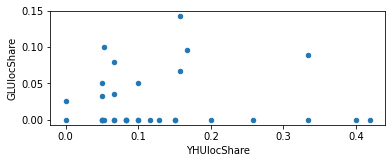

In [ ]:
t = YH_GLUlocShare
t.plot.scatter(x="YHUlocShare", y="GLUlocShare");
plt.axis('scaled')

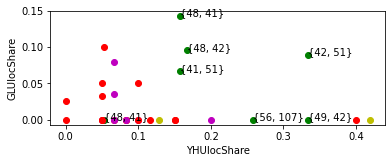

In [ ]:
f=plt.figure();
p=f.add_subplot(111);
tab=[];
yhgames = YHGames['Game'].to_list()
for player in YH_GLUlocShare.player_id.unique():
  games = GamesPlayers.loc[GamesPlayers['player_id']==player]['game']
  games = games.to_list();
  yh = YH_GLUlocShare.loc[YH_GLUlocShare['player_id']==player]['YHUlocShare'].values[0]
  gl = YH_GLUlocShare.loc[YH_GLUlocShare['player_id']==player]['GLUlocShare'].values[0]
  yhgame = set(games).intersection(yhgames)
  glgame = set(games).intersection(GLData.Game.unique())
  ann = yhgame.union(glgame)
  if (len(set(games).intersection(YHConsensusGames)) == 0) & (len(set(games).intersection(GLConsensusGames)) == 0):
    p.scatter(yh, gl, c='r') 
    cons_yh='-'; cons_gl='-'   
  if (len(set(games).intersection(YHConsensusGames)) == 1) & (len(set(games).intersection(GLConsensusGames)) == 0):  
    p.scatter(yh, gl, c='y')
    cons_yh='+'; cons_gl='-' 
  if (len(set(games).intersection(YHConsensusGames)) == 0) & (len(set(games).intersection(GLConsensusGames)) == 1):  
    p.scatter(yh, gl, c='m')
    cons_yh='-'; cons_gl='+' 
  if (len(set(games).intersection(YHConsensusGames)) == 1) & (len(set(games).intersection(GLConsensusGames)) == 1):  
    p.scatter(yh, gl, c='g') 
    cons_yh='+'; cons_gl='+' 
    p.annotate(ann, xy=(yh, gl))
  #p.annotate(ann, xy=(yh, gl))   
  tab.append([player, yhgame, glgame, yh,gl, cons_yh, cons_gl])  
p.set_xlabel('YHUlocShare')
p.set_ylabel('GLUlocShare')
p.axis('scaled')
plt.show() 

In [ ]:
YH_ADMM_UlocShare = pd.merge(YHUlocShare, ADMMUlocShare, on = 'player_id', how = 'inner')
YH_ADMM_UlocShare

,player_id,YHUlocShare,ADMMUlocShare
0,25,0.066667,0.155172
1,28,0.157895,0.259259
2,26,0.052632,0.137931
3,31,0.333333,0.137931
4,30,0.333333,0.222222
5,32,0.083333,0.259259
6,3,0.066667,0.050000
7,35,0.050000,0.000000
8,42,0.050000,0.050000
9,41,0.100000,0.050000


In [ ]:
t = YH_ADMM_UlocShare

(-0.016666666666666666, 0.35, -0.012962962962962963, 0.2722222222222222)

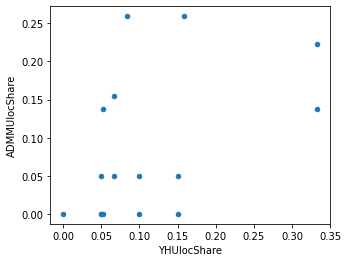

In [ ]:
t.plot.scatter(x="YHUlocShare", y="ADMMUlocShare");
plt.axis('scaled')

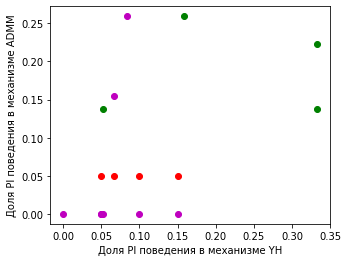

In [ ]:
f=plt.figure();
p=f.add_subplot(111);
#fig1, p = plt.subplots()
tab=[];
for player in YH_ADMM_UlocShare.player_id.unique():
  games = GamesPlayers.loc[GamesPlayers['player_id']==player]['game']
  games = games.to_list();
  yh = YH_ADMM_UlocShare.loc[YH_ADMM_UlocShare['player_id']==player]['YHUlocShare'].values[0]
  admm = YH_ADMM_UlocShare.loc[YH_ADMM_UlocShare['player_id']==player]['ADMMUlocShare'].values[0]
  yhgames = YHGames['Game'].to_list()
  yhgame = set(games).intersection(yhgames)
  admmgame = set(games).intersection(ADMMGoodGames)
  ann = yhgame.union(admmgame)
  if (len(set(games).intersection(YHConsensusGames)) == 0) & (len(set(games).intersection(ADMMConsensusGames)) == 0):
    p.scatter(yh, admm, c='r')
    #if yh>0.08:
      #p.annotate(ann, xy=(yh, admm-0.01))
    #else:
      #p.annotate(ann, xy=(yh, admm+0.01)) 
    cons_yh='-'; cons_admm='-'   
  if (len(set(games).intersection(YHConsensusGames)) == 1) & (len(set(games).intersection(ADMMConsensusGames)) == 0):  
    p.scatter(yh, admm, c='y')
    cons_yh='+'; cons_admm='-' 
  if (len(set(games).intersection(YHConsensusGames)) == 0) & (len(set(games).intersection(ADMMConsensusGames)) == 1):  
    p.scatter(yh, admm, c='m')
    cons_yh='-'; cons_admm='+' 
  if (len(set(games).intersection(YHConsensusGames)) == 1) & (len(set(games).intersection(ADMMConsensusGames)) == 1):  
    p.scatter(yh, admm, c='g') 
    #p.annotate(ann, xy=(yh, admm))
    cons_yh='+'; cons_admm='+' 
  #p.annotate(ann, xy=(yh, admm))   
  tab.append([player, yhgame, admmgame, yh, admm, cons_yh, cons_admm])  
p.axis('scaled')
p.set_xlabel('Доля PI поведения в механизме YH')
p.set_ylabel('Доля PI поведения в механизме ADMM')
#p.set_xlabel('Share of PI decisions in YH games')
#p.set_ylabel('Share of PI decisions in ADMM games')
plt.show() 
f.savefig('diagYH_ADMM.png', dpi=400) 

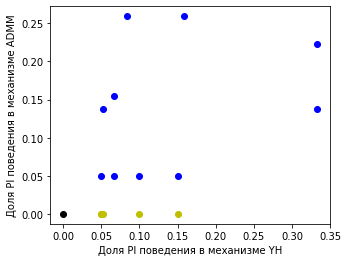

In [ ]:
f=plt.figure()
p=f.add_subplot(111)
tab=[]
for player in YH_ADMM_UlocShare.player_id.unique():
  yh = YH_ADMM_UlocShare.loc[YH_ADMM_UlocShare['player_id']==player]['YHUlocShare'].values[0]
  admm = YH_ADMM_UlocShare.loc[YH_ADMM_UlocShare['player_id']==player]['ADMMUlocShare'].values[0]
  yhgames = YHGames['Game'].to_list()
  yhgame = set(games).intersection(yhgames)
  admmgame = set(games).intersection(ADMMGoodGames)
  if (admm==0) & (yh>0):
    p.scatter(yh, admm, c='y')
  elif (admm==0) & (yh==0):
    p.scatter(yh, admm, c='k')
  else:
    p.scatter(yh, admm, c='b')
  tab.append([player, yhgame, admmgame, yh, admm, cons_yh, cons_admm])  
p.axis('scaled')
#p.set_xlabel('Share of PI decisions in YH games')
#p.set_ylabel('Share of PI decisions in ADMM games')
p.set_xlabel('Доля PI поведения в механизме YH')
p.set_ylabel('Доля PI поведения в механизме ADMM')
plt.show() 
#f.savefig('diagYH_ADMM_yellow.png', dpi=400) 

In [ ]:
tab=pd.DataFrame(tab, columns=(['Игрок', 'Игра YH', 'Игра ADMM', 'PI в YH', 'PI в ADMM', 'Консенсус в YH', 'Консенсус в ADMM'])).sort_values(by=['Консенсус в YH', 'Консенсус в ADMM'])

def highlight(s):
  x=s.copy()
  condred=(x['Консенсус в YH']=='-')& (x['Консенсус в ADMM']=='-')
  condmag=(x['Консенсус в YH']=='-')& (x['Консенсус в ADMM']=='+')
  x.loc[condred, :]='background-color: red'
  x.loc[~condred, :]='background-color: green'
  x.loc[condmag, :]='background-color: magenta'
  return x

c=tab.style.apply(highlight, axis=None)
#c.to_excel('tabYH_ADMM.xlsx')
c

,Игрок,Игра YH,Игра ADMM,PI в YH,PI в ADMM,Консенсус в YH,Консенсус в ADMM
0,25,{94},{82},0.066667,0.155172,-,-
1,28,{94},{82},0.157895,0.259259,-,-
2,26,{94},{82},0.052632,0.137931,-,-
3,31,{94},{82},0.333333,0.137931,-,-
4,30,{94},{82},0.333333,0.222222,-,-
5,32,{94},{82},0.083333,0.259259,-,-
6,3,{94},{82},0.066667,0.050000,-,-
7,35,{94},{82},0.050000,0.000000,-,-
8,42,{94},{82},0.050000,0.050000,-,-
9,41,{94},{82},0.100000,0.050000,-,-


In [ ]:
#c.to_latex('tabPI_YH_ADMM.tex')

##Разделить на тех, кто использовал PI в первой игре и нет 


In [ ]:
from scipy.stats import mannwhitneyu

In [ ]:
first_games=[40, 41, 42, 43, 60, 80, 81, 82]
second_games=[92, 93, 94, 45, 46, 65]

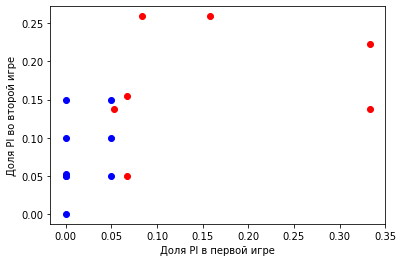

In [ ]:
order_tab=[]
first_zero=[]
first_some=[]
s1=[]; s2=[]

f=plt.figure()
p=f.add_subplot(111)

yhgames = YHGames['Game'].to_list()
for player in YH_ADMM_UlocShare.player_id.unique():
  games = GamesPlayers.loc[GamesPlayers['player_id']==player]['game']
  yh = YH_ADMM_UlocShare.loc[YH_ADMM_UlocShare['player_id']==player]['YHUlocShare'].values[0]
  admm = YH_ADMM_UlocShare.loc[YH_ADMM_UlocShare['player_id']==player]['ADMMUlocShare'].values[0]
  yhgame = list(set(games).intersection(yhgames))
  admmgame = list(set(games).intersection(ADMMGoodGames))
  if yhgame[0] in first_games:
    first=yhgame
    second=admmgame
    first_share=yh
    second_share=admm
    p.scatter(first_share, second_share, c='r') 
  else: 
    first=admmgame
    second=yhgame
    first_share=admm
    second_share=yh
    p.scatter(first_share, second_share, c='b') 
  if first_share ==0:
     first_zero.append(player)
     s1.append(second_share)
  else:
    first_some.append(player)
    s2.append(second_share)   
  order_tab.append([player, first[0], second[0], first_share, second_share])  

  p.set_xlabel('Доля PI в первой игре')
  p.set_ylabel('Доля PI во второй игре')
  plt.savefig('PI_order_color', dpi=200)

In [ ]:
order_tab=pd.DataFrame(order_tab, columns=(['Player', 'First Game', 'Second Game', 'PI Share in 1', 'PI Share in 2']))

In [ ]:
order_tab.sort_values(by=['PI Share in 1'])

,Player,First Game,Second Game,PI Share in 1,PI Share in 2
7,35,80,92,0.000000,0.050000
10,38,81,93,0.000000,0.100000
11,39,81,93,0.000000,0.052632
12,40,81,93,0.000000,0.150000
13,37,80,94,0.000000,0.000000
14,36,80,94,0.000000,0.050000
8,42,82,92,0.050000,0.050000
9,41,82,92,0.050000,0.100000
15,43,82,94,0.050000,0.150000
2,26,41,45,0.052632,0.137931


In [ ]:
mean1=sum(s1)/len(s1)
mean1

0.06710526315789474

In [ ]:
mean2=sum(s2)/len(s2)
mean2

0.15217752234993615

In [ ]:
order_tab['PI Share in 1'].corr(order_tab['PI Share in 2'])

0.5400512542237802

In [ ]:
t.sort_values(by='player_id')

,player_id,YHUlocShare,ADMMUlocShare
6,3,0.066667,0.050000
0,25,0.066667,0.155172
2,26,0.052632,0.137931
1,28,0.157895,0.259259
4,30,0.333333,0.222222
3,31,0.333333,0.137931
5,32,0.083333,0.259259
7,35,0.050000,0.000000
14,36,0.050000,0.000000
13,37,0.000000,0.000000


In [ ]:
t.corr()

,player_id,YHUlocShare,ADMMUlocShare
player_id,1.000000,-0.024809,-0.332332
YHUlocShare,-0.024809,1.000000,0.464662
ADMMUlocShare,-0.332332,0.464662,1.000000


In [ ]:
print(s1); print(s2)

[0.05, 0.1, 0.05263157894736842, 0.15, 0.0, 0.05]
[0.15517241379310345, 0.25925925925925924, 0.13793103448275862, 0.13793103448275862, 0.2222222222222222, 0.25925925925925924, 0.05, 0.05, 0.1, 0.15]


In [ ]:
mannwhitneyu(s1, s2, alternative="less")

MannwhitneyuResult(statistic=12.0, pvalue=0.027556254632306536)

In [ ]:
U1,p=mannwhitneyu(s2, s1)
print(U1)
nx, ny = len(s1), len(s2)
U2 = nx*ny - U1
print(U2)

48.0
12.0


Тест отдельно для консенсус и не-консенсус игр

In [ ]:
both_cons_players=[];
no_cons_players=[];
consensus= YHConsensusGames + ADMMConsensusGames
for index, row in order_tab.iterrows():
  if (row['First Game'] in consensus) & (row['Second Game'] in consensus):
    both_cons_players.append(row['Player'])
  if (row['First Game'] not in consensus) & (row['Second Game'] not in consensus):
    no_cons_players.append(row['Player'])  
print(both_cons_players)    
print(no_cons_players)
#если будет больше данных, можно будет сделать такой же тест для таких игроков

[28.0, 26.0, 31.0, 30.0]
[3.0, 42.0, 41.0, 43.0]


In [ ]:
#Если в первой игре был консенсус во второй тоже будет? 
s=[]
for index, row in order_tab.iterrows():
  if (row['First Game'] in consensus) & (row['Second Game'] in consensus):
    s.append(1)
  if (row['First Game'] in consensus) & (row['Second Game'] not in consensus): 
    s.append(0)
print(s)    

[1, 1, 1, 1, 0, 0, 0, 0, 0, 0]


In [ ]:
#сравнить PI только в первых играх #сделать, когда появлятся данные по ADMM
YHfirst=list(set(first_games).intersection(yhgames))
#ADMMfirst = list(set(first_games).intersection(ADMMGoodGames))


#Сравнить PI шаги с BR

In [ ]:
YHPI=YHData[YHData['Fi>Fprev']==1]
brsi=[]
for index, row in YHPI.iterrows():
  brsi.append(abs(row['s2']-row['br']))
A=YHPI.drop(columns=['Penalty', 'x', 's1', 's3', 'AcceptAdvice', 'CalcCount', 'CalcAdviceCount', 'UseHelp', 'Unnamed: 16', 'Util', 'iscb0', 'iscb0.5',
       'iscb1', 'Ui>Uprev', 'Uloci>Ulocprev', 'Uall>Uprev', 'Unew>Uprev',
       'Fnew>Fprev', 'Fnew>=Fprev', 'anyFnew>Fprev', 'Fi>=Fprev',
       'anyFi>Fprev', 'Fii>Fiprev', 'Ui', 'Uloci', 'Unew', 'Uprev', 'Ulocnew',
       'Ulocnew>Ulocprev', 'dsi', 'dxi', 'dti', 'g', 'br0', 'br0.5',
       'br1', 'game', 'subject'])
A['|s-br|']=brsi
#A.to_excel('PI_and_BR(0).xlsx')

In [ ]:
YHData=YHData.sort_values(by=['Game', 'Time'])
YHData.head(10)

,Game,Time,Subject,Group,GrSubject,Type,Gain,Penalty,x,s1,...,dti,g,br,br0,br0.5,br1,twbr,game,subject,player_id
0,40,1,11,1,1,1,1.131904,0.107000,0.534884,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,40,11,25
60,40,1,6,1,2,9,2.129054,5.742000,52.953488,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,40,6,23
120,40,1,10,1,3,25,3.551163,5.750000,61.511628,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,40,10,24
1,40,2,11,1,1,1,1.142498,0.117700,0.588099,NaN,...,0.0107,0.013325,8.504692,0.0,0.0,0.0,1.0,40,11,25
61,40,2,6,1,2,9,2.122540,5.746950,52.928870,NaN,...,0.0000,0.000000,27.598804,0.0,0.0,0.0,0.0,40,6,23
121,40,2,10,1,3,25,3.543875,5.755750,61.483031,NaN,...,0.0000,0.000000,27.605742,0.0,0.0,0.0,0.0,40,10,24
2,40,3,11,1,1,1,1.131904,0.107000,0.534884,NaN,...,-0.0107,-0.013505,8.504692,0.0,0.0,0.0,0.0,40,11,25
62,40,3,6,1,2,9,2.129054,5.742000,52.953488,NaN,...,0.0000,0.000000,27.551742,0.0,0.0,0.0,0.0,40,6,23
122,40,3,10,1,3,25,3.551163,5.750000,61.511628,NaN,...,0.0000,0.000000,27.545459,0.0,0.0,0.0,0.0,40,10,24
3,40,4,11,1,1,1,1.438479,0.055825,1.232943,NaN,...,0.0107,0.013325,8.504692,0.0,0.0,0.0,1.0,40,11,25


In [ ]:
#BR(0) является PI?
br_is_pi=[]
for game in YHData.Game.unique():
  G=YHData[YHData['Game']==game]
  if game != 93: #в игре 93 не хватает одной строчки
    for time in G.Time.unique():
      if time>1:
        small_data=G[(G.Time==time) | (G.Time==time-1)]
        small_data.loc[(small_data.Time==time-1), ('Time')]=1  
        small_data.loc[(small_data.Time==time), ('Time')]=2 
        small_data=small_data.drop(columns=['Penalty', 'x', 'Ui>Uprev', 'Uloci>Ulocprev', 'Uall>Uprev', 'Unew>Uprev', 'Fnew>Fprev', 'Fnew>=Fprev', 'anyFnew>Fprev',
                                    'Fi>Fprev', 'Fi>=Fprev', 'anyFi>Fprev', 'Fii>Fiprev', 'Ui', 'Uloci', 'Unew', 'Uprev', 'Ulocnew', 'Ulocnew>Ulocprev',
                                    'dsi', 'dxi', 'dti', 'g', 'br1', 'twbr', 'game', 'subject'])
        for i in (1, 2, 3):
          ismall_data=small_data.copy()
          br=ismall_data.loc[(ismall_data.GrSubject==i)&(ismall_data.Time==2), ('br')]
          ismall_data.loc[(ismall_data.GrSubject==i)&(ismall_data.Time==2), ('s2')]=br
          smallND=NashData_bySubjects(YHMechanism, ismall_data, [0,0,0])
          ismall_data = pd.merge(ismall_data, smallND, on=['Game', 'Time','GrSubject'], how='outer')
          br_is_pi.append(ismall_data.loc[(ismall_data.GrSubject==i)&(ismall_data.Time==2), ('Fi>Fprev')].values[0])
      else:
         br_is_pi.extend([np.nan, np.nan, np.nan])   

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
print(YHData.shape[0])
print(len(br_is_pi))

977
918


In [ ]:
#отдельно для игры 93
testgame=YHData[YHData['Game']==93]
br_is_pi93=[]
for time in testgame.Time.unique():
      if (time>1) & (time !=19) & (time !=20):
        small_data=testgame[(testgame.Time==time) | (testgame.Time==time-1)]
        small_data.loc[(small_data.Time==time-1), ('Time')]=1  
        small_data.loc[(small_data.Time==time), ('Time')]=2 
        small_data=small_data.drop(columns=['Penalty', 'x', 'Ui>Uprev', 'Uloci>Ulocprev', 'Uall>Uprev', 'Unew>Uprev', 'Fnew>Fprev', 'Fnew>=Fprev', 'anyFnew>Fprev',
                                    'Fi>Fprev', 'Fi>=Fprev', 'anyFi>Fprev', 'Fii>Fiprev', 'Ui', 'Uloci', 'Unew', 'Uprev', 'Ulocnew', 'Ulocnew>Ulocprev',
                                    'dsi', 'dxi', 'dti', 'g', 'br1', 'twbr', 'game', 'subject'])
        for i in (1, 2, 3):
          ismall_data=small_data.copy()
          br=ismall_data.loc[(ismall_data.GrSubject==i)&(ismall_data.Time==2), ('br')]
          ismall_data.loc[(ismall_data.GrSubject==i)&(ismall_data.Time==2), ('s2')]=br
          smallND=NashData_bySubjects(YHMechanism, ismall_data, [0,0,0])
          ismall_data = pd.merge(ismall_data, smallND, on=['Game', 'Time','GrSubject'], how='outer')
          br_is_pi93.append(ismall_data.loc[(ismall_data.GrSubject==i)&(ismall_data.Time==2), ('Fi>Fprev')].values[0])
      else:
         br_is_pi93.extend([np.nan, np.nan, np.nan]) 
br_is_pi93.extend([[np.nan, np.nan, np.nan, np.nan, np.nan]])         

In [ ]:
br_is_pi=np.array(br_is_pi)
print(np.nansum(br_is_pi))
print(np.nansum(np.array(br_is_pi93)))
#добавить к общей таблице? 

277.0
[nan nan nan nan nan]


<ipython-input-150-964ed843b80a>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(np.nansum(np.array(br_is_pi93)))


In [ ]:
def is_pi(data, i, s):
  data.loc[(data.GrSubject==i)&(data.Time==2), ('s2')]=s
  ND=NashData_bySubjects(YHMechanism, data, [0,0,0])
  data = pd.merge(data, smallND, on=['Game', 'Time','GrSubject'], how='outer')
  return (data.loc[(data.GrSubject==i)&(data.Time==2), ('Fi>Fprev')].values[0])

In [ ]:
#доделать потом
#найти границу при движении к BR, где PI перестаёт быть PI
#найти диапазон от предыдущей заявки до br 
testgame=YHData[YHData['Game']==40]
ranges=[]
for time in testgame.Time.unique():
      if (time>1):
        small_data=testgame[(testgame.Time==time) | (testgame.Time==time-1)]
        small_data.loc[(small_data.Time==time-1), ('Time')]=1  
        small_data.loc[(small_data.Time==time), ('Time')]=2 
        small_data=small_data.drop(columns=['Penalty', 'x', 'Ui>Uprev', 'Uloci>Ulocprev', 'Uall>Uprev', 'Unew>Uprev', 'Fnew>Fprev', 'Fnew>=Fprev', 'anyFnew>Fprev',
                                    'Fi>Fprev', 'Fi>=Fprev', 'anyFi>Fprev', 'Fii>Fiprev', 'Ui', 'Uloci', 'Unew', 'Uprev', 'Ulocnew', 'Ulocnew>Ulocprev',
                                    'dsi', 'dxi', 'dti', 'g', 'br1', 'twbr', 'game', 'subject'])
        for i in (1, 2, 3):
          s_prev=small_data.loc[(small_data.GrSubject==i)&(small_data.Time==1), ('s2')].values[0]
          br=small_data.loc[(small_data.GrSubject==i)&(small_data.Time==2), ('br')].values[0]
          range=[s_prev, br]
          ranges.append(range)
      else:
        ranges.extend([np.nan, np.nan, np.nan]) 

In [ ]:
testgame.columns

Index(['Game', 'Time', 'Subject', 'Group', 'GrSubject', 'Type', 'Gain',
       'Penalty', 'x', 's1', 's2', 's3', 'AcceptAdvice', 'CalcCount',
       'CalcAdviceCount', 'UseHelp', 'Unnamed: 16', 'Util', 'iscb0', 'iscb0.5',
       'iscb1', 'Ui>Uprev', 'Uloci>Ulocprev', 'Uall>Uprev', 'Unew>Uprev',
       'Fnew>Fprev', 'Fnew>=Fprev', 'anyFnew>Fprev', 'Fi>Fprev', 'Fi>=Fprev',
       'anyFi>Fprev', 'Fii>Fiprev', 'Ui', 'Uloci', 'Unew', 'Uprev', 'Ulocnew',
       'Ulocnew>Ulocprev', 'dsi', 'dxi', 'dti', 'g', 'br', 'br0', 'br0.5',
       'br1', 'twbr', 'game', 'subject', 'player_id'],
      dtype='object')

#улучшает ли PI ресурс, выигрыш в YH?

In [ ]:
x_more_xprev=[]
pen_less_penprev=[]
gain_more_gainprev=[]
x_prev=0
pen_prev=0
gain_prev=0
for index, row in YHData.iterrows():
  if row['Time'] == 1: 
    x_more_xprev.append(0)
    pen_less_penprev.append(0)
    gain_more_gainprev.append(0)
  else:  
    if row['x']>x_prev:
      x_more_xprev.append(1)
    else:
      x_more_xprev.append(0) 
    if row['Penalty']<pen_prev:
      pen_less_penprev.append(1)
    else:
      pen_less_penprev.append(0) 
    if row['Gain']>gain_prev:
      gain_more_gainprev.append(1)
    else:
      gain_more_gainprev.append(0)   

  x_prev=row['x']  
  pen_prev=row['Penalty']
  gain_prev=row['Gain']

In [ ]:
YHData['x>x_prev']=x_more_xprev 
YHData['pen<pen_prev']=pen_less_penprev
YHData['gain>gain_prev']=gain_more_gainprev
YHData

,Game,Time,Subject,Group,GrSubject,Type,Gain,Penalty,x,s1,...,br0,br0.5,br1,twbr,game,subject,player_id,x>x_prev,pen<pen_prev,gain>gain_prev
0,40,1,11,1,1,1,1.131904,0.10700,0.534884,NaN,...,0.0,0.0,0.0,0.0,40,11,25,0,0,0
60,40,1,6,1,2,9,2.129054,5.74200,52.953488,NaN,...,0.0,0.0,0.0,0.0,40,6,23,0,0,0
120,40,1,10,1,3,25,3.551163,5.75000,61.511628,NaN,...,0.0,0.0,0.0,0.0,40,10,24,0,0,0
1,40,2,11,1,1,1,1.142498,0.11770,0.588099,NaN,...,0.0,0.0,0.0,1.0,40,11,25,0,1,0
61,40,2,6,1,2,9,2.122540,5.74695,52.928870,NaN,...,0.0,0.0,0.0,0.0,40,6,23,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,94,19,7,3,2,9,5.418582,1.32125,36.425339,NaN,...,0.0,0.0,0.0,0.0,94,7,36,0,1,1
975,94,19,8,3,3,25,6.704406,1.39425,40.588235,NaN,...,0.0,0.0,0.0,0.0,94,8,43,1,0,1
936,94,20,9,3,1,1,4.888836,1.37455,38.230009,NaN,...,0.0,0.0,0.0,1.0,94,9,37,0,1,0
956,94,20,7,3,2,9,5.571499,1.39795,39.573226,NaN,...,0.0,0.0,0.0,1.0,94,7,36,1,0,1


In [ ]:
YHPI=YHData[YHData['Fi>Fprev']==1]
YHPI=YHPI[['Game', 'Time', 'Type', 'Gain', 'Penalty', 'Fi>Fprev', 'player_id',	'x>x_prev',	'pen<pen_prev']]

In [ ]:
YHPI['gain>gain_prev']= YHData['gain>gain_prev']
YHPI

<ipython-input-157-888ba167a07f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  YHPI['gain>gain_prev']= YHData['gain>gain_prev']


,Game,Time,Type,Gain,Penalty,Fi>Fprev,player_id,x>x_prev,pen<pen_prev,gain>gain_prev
63,40,4,9,6.085187,1.252000,1.0,23,1,0,1
123,40,4,25,8.428066,1.263825,1.0,24,1,0,1
66,40,7,9,5.232570,1.622000,1.0,23,1,0,1
128,40,9,25,6.218916,2.400000,1.0,24,1,0,1
69,40,10,9,3.964668,2.070000,1.0,23,0,1,0
...,...,...,...,...,...,...,...,...,...,...
907,93,11,25,7.456471,0.765000,1.0,40,1,0,1
959,94,3,25,6.668881,1.980000,1.0,43,1,0,1
942,94,6,9,6.367044,0.962500,1.0,36,1,0,1
966,94,10,25,6.856247,1.172500,1.0,43,1,0,1


In [ ]:
len(YHPI[YHPI['x>x_prev']==1].index)

53

In [ ]:
len(YHPI[YHPI['pen<pen_prev']==1].index)

67

In [ ]:
len(YHPI[YHPI['gain>gain_prev']==1].index)

71

In [ ]:
#если на предыдущем шаге был большой штраф, то игрок будет применять PI? #посмотреть ещё раз 
neg_gain=[]
PI=[]
for index, row in YHData.iterrows():
  if index < len(YHData)-1:
    if (row['Gain']<0) & (YHData.iloc[index+1]['Time'] !=1):
      neg_gain.append(index)
for i in neg_gain:
  PI.append(YHData['Fi>Fprev'][i+1])
print(len(neg_gain)) 
print(sum(x==1 for x in PI))

25
8


In [ ]:
#посчитать длину цепочек PI 
chain_lengths=[]
i=0
prev_player=YHPI.iloc[0]['player_id']
prev_time=YHPI.iloc[0]['Time']-1
for index, row in YHPI.iterrows():
  if (row['player_id'] == prev_player) & (row['Time'] == prev_time+1):
    i=i+1
  else:
    chain_lengths.append(i)
    i=1
  prev_player = row['player_id']
  prev_time = row['Time']
chain_lengths.append(i)
#print(chain_lengths)  

In [ ]:
sum(chain_lengths)

110

In [ ]:
ntimes=[]
for n in np.unique(chain_lengths):
  ntimes.append(chain_lengths.count(n))
print(ntimes)  

[88, 7, 2]


Text(0, 0.5, 'Число цепочек')

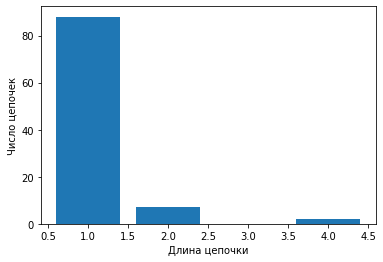

In [ ]:
#диаграмма длин цепочек 
fg, ax = plt.subplots()
ax.bar(np.unique(chain_lengths), ntimes, width=0.8)
ax.set_xlabel('Длина цепочки')
ax.set_ylabel('Число цепочек')
#fg.savefig('bar.png')

In [ ]:
#при применении PI увеличивают заявку? 
s_inc=[]
prec=0.0001
for index, row in YHData.iterrows():
  if row['Fi>Fprev']==1:
    if row['s2']>YHData.iloc[index-1]['s2']:
      s_inc.append(1)
    elif abs(row['s2']-YHData.iloc[index-1]['s2'])<prec:
      s_inc.append(0)
    else:
      s_inc.append(-1) 
print(len(s_inc)) 
#print(s_inc)

110


In [ ]:
#стремятся ли увеличить выигрыш, уменьшить трансфер? 
#dsi>0 -- увеличил заявку; dxi>0 -- пытался увеличить выигрыш; dti<0 -- пытался уменьшить трансфер
YHPI['dsi']= YHData['dsi']
YHPI['dxi']= YHData['dxi']
YHPI['dti']= YHData['dti']

In [ ]:
s_inc=YHPI[YHPI['dsi']>0].shape[0]
s_dec=YHPI[YHPI['dsi']<0].shape[0]

x_inc=YHPI[YHPI['dxi']>0].shape[0]
x_dec=YHPI[YHPI['dxi']<0].shape[0]

t_inc=YHPI[YHPI['dti']>0].shape[0]
t_dec=YHPI[YHPI['dti']<0].shape[0]

print(s_inc); print(s_dec)
print(x_inc); print(x_dec)
print(t_inc); print(t_dec)

0
110
0
110
0
110


In [ ]:
#Проверить, что если Rational\PI, то s увеличивается 
flag=1
for index, row in YHData.iterrows():
  if (row['Fii>Fiprev']==1)&(row['Fi>Fprev']==0)&(row['dsi']<=0):
    flag=0
flag    

1

In [ ]:
#всегда ли, когда уменьшали штраф, это было PI?
count=0
for index, row in YHData.iterrows():
  if (row['dti']<0)&(row['Fi>Fprev']==0):
    count=count+1
print(count)  
print(YHData[YHData['dti']<0].shape[0])

186
296


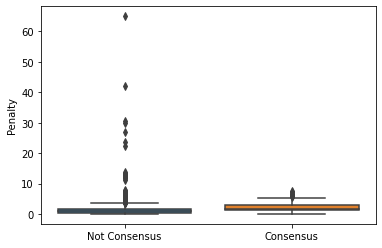

In [ ]:
import seaborn as sns
fig, ax=plt.subplots()
#Средние штрафы в консенсус и неконсенсус играх 
cons=[]
cons_ind=[]
noncons_ind=[]
for index, row in YHData.iterrows():
  if row['Game'] in YHConsensusGames:
    cons.append('Consensus')
    cons_ind.append(index)
  else:
    cons.append('Not Consensus')
    noncons_ind.append(index)
bp=sns.boxplot(x=cons, y=YHData['Penalty'], ax=ax)    
#plt.ylim(0, 10) 
#plt.savefig('transfersfull.png')

In [ ]:
YHCons=YHData[YHData.Game.isin(YHConsensusGames)]
YHNonCons=YHData[~YHData.Game.isin(YHConsensusGames)]
print(YHCons.Penalty.mean())
print(YHNonCons.Penalty.mean())

2.1764660714285715
1.806119913473424


In [ ]:
YHCons[YHCons['Penalty']>6].shape[0]

5

In [ ]:
print(YHNonCons[YHNonCons['Penalty']>6].shape[0])
print(YHNonCons[YHNonCons['Penalty']>10].shape[0])
print(YHNonCons[YHNonCons['Penalty']>20].shape[0])
print(YHNonCons['Penalty'].max())

34
23
7
65.0


[Text(0, 0.5, 'Штрафы')]

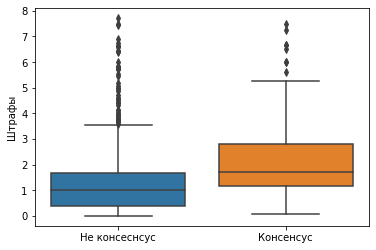

In [ ]:
cons=[]
for index, row in YHData.iterrows():
  if row['Penalty']<10:
    if row['Game'] in YHConsensusGames:
      cons.append('Консенсус')
    else:
      cons.append('Не консеснсус')

bp=sns.boxplot(x=cons, y=YHData[YHData['Penalty']<10]['Penalty'])
bp.set(ylabel='Штрафы')
#plt.savefig('transfers.png')

In [ ]:
#в консенсус чаще уменьшают штрафы? 
print('Cons')
print(YHCons.shape[0])
print(YHCons[YHCons['dti']<0].shape[0])
print(YHCons[YHCons['dti']<0].shape[0]/YHCons.shape[0])

print('Not Cons')
print(YHNonCons.shape[0])
print(YHNonCons[YHNonCons['dti']<0].shape[0])
print(YHNonCons[YHNonCons['dti']<0].shape[0]/YHNonCons.shape[0])

Cons
168
53
0.31547619047619047
Not Cons
809
243
0.3003708281829419


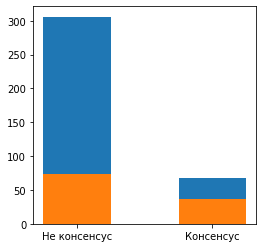

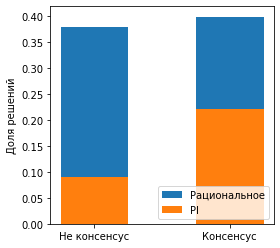

In [ ]:
#графики для рационального и PI поведения
fig1, ax1 = plt.subplots()
labels=['Рациональное', 'PI']
x=['Не консенсус', 'Консенсус']
rat=[YHNonCons[YHNonCons['Fii>Fiprev']==1].shape[0], YHCons[YHCons['Fii>Fiprev']==1].shape[0]]
pi=[YHNonCons[YHNonCons['Fi>Fprev']==1].shape[0], YHCons[YHCons['Fi>Fprev']==1].shape[0]]
ax1.bar(x, rat, width=0.5)
ax1.bar(x, pi, width=0.5)
fig1.set_figwidth(4)

fig2, ax2 = plt.subplots()
x=['Не консенсус', 'Консенсус']
rat=[YHNonCons[YHNonCons['Fii>Fiprev']==1].shape[0]/len(YHNonCons), YHCons[YHCons['Fii>Fiprev']==1].shape[0]/len(YHCons)]
pi=[YHNonCons[YHNonCons['Fi>Fprev']==1].shape[0]/len(YHNonCons), YHCons[YHCons['Fi>Fprev']==1].shape[0]/len(YHCons)]
ax2.bar(x, rat, width=0.5)
ax2.bar(x, pi, width=0.5)
fig2.set_figwidth(4)
plt.legend(labels, loc='lower right')
ax2.set_ylabel('Доля решений')
#plt.savefig('Rtnl_PI_bar.png')
fig2.savefig('Rtnl_PI_bar.png', bbox_inches = 'tight')

#PI и штрафы и выигрыши для ADMM


In [ ]:
#реальное изменение штрафа, ресурса и выигрыша
x_more_xprev=[]
pen_less_penprev=[]
gain_more_gainprev=[]
x_prev=0
pen_prev=0
gain_prev=0
for index, row in ADMMData.iterrows():
  if row['Time'] == 1: 
    x_more_xprev.append(0)
    pen_less_penprev.append(0)
    gain_more_gainprev.append(0)
  else:  
    if row['x']>x_prev:
      x_more_xprev.append(1)
    else:
      x_more_xprev.append(0) 
    if row['Penalty']<pen_prev:
      pen_less_penprev.append(1)
    else:
      pen_less_penprev.append(0) 
    if row['Gain']>gain_prev:
      gain_more_gainprev.append(1)
    else:
      gain_more_gainprev.append(0)   

  x_prev=row['x']  
  pen_prev=row['Penalty']
  gain_prev=row['Gain']

In [ ]:
ADMMData['x>x_prev']=x_more_xprev 
ADMMData['pen<pen_prev']=pen_less_penprev
ADMMData['gain>gain_prev']=gain_more_gainprev
ADMMData

,Unnamed: 0,Game,Time,Subject,Group,GrSubject,Type,Gain,Penalty,x,...,twbr,br0,br0.5,br1,game,subject,player_id,x>x_prev,pen<pen_prev,gain>gain_prev
0,0,45,1,6,2,1,1,6.262846,0.006125,38.3,...,NaN,0.0,0.0,0.0,45,6,26,0,0,0
1,3,45,2,6,2,1,1,6.364697,0.038427,40.0,...,1.0,0.0,0.0,0.0,45,6,26,1,0,1
2,6,45,3,6,2,1,1,6.656454,0.125876,45.0,...,1.0,0.0,0.0,0.0,45,6,26,1,0,1
3,9,45,4,6,2,1,1,6.656454,0.125876,45.0,...,0.0,0.0,0.0,0.0,45,6,26,0,0,0
4,12,45,5,6,2,1,1,6.356341,0.276909,43.0,...,0.0,0.0,0.0,0.0,45,6,26,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,464,82,16,8,3,3,25,-0.061104,10.784909,90.0,...,0.0,0.0,0.0,0.0,82,8,42,1,0,0
473,467,82,17,8,3,3,25,5.063061,2.893069,38.3,...,1.0,0.0,0.0,0.0,82,8,42,0,1,1
474,470,82,18,8,3,3,25,3.415085,4.541045,38.3,...,0.0,0.0,0.0,0.0,82,8,42,0,0,0
475,473,82,19,8,3,3,25,2.619110,4.089094,20.0,...,1.0,0.0,0.0,0.0,82,8,42,0,1,0


In [ ]:
ADMMPI=ADMMData[ADMMData['Fi>Fprev']==1]
ADMMPI=ADMMPI[['Game', 'Time', 'Type', 'Gain', 'Penalty', 'Fi>Fprev', 'player_id',	'x>x_prev',	'pen<pen_prev', 'gain>gain_prev']]
ADMMPI

,Game,Time,Type,Gain,Penalty,Fi>Fprev,player_id,x>x_prev,pen<pen_prev,gain>gain_prev
29,45,30,1,2.591011,3.677961,1.0,26,1,0,1
51,45,52,1,-0.634980,3.951605,1.0,26,0,1,1
52,45,53,1,0.443805,2.872820,1.0,26,0,1,1
53,45,54,1,1.833316,1.483309,1.0,26,0,1,1
54,45,55,1,3.068319,0.931681,1.0,26,1,1,1
...,...,...,...,...,...,...,...,...,...,...
357,67,3,25,7.306611,0.817427,1.0,5,1,1,1
358,67,4,25,7.531339,0.654014,1.0,5,1,1,1
429,82,13,1,3.755566,2.513405,1.0,43,0,1,1
449,82,13,9,4.724341,2.956805,1.0,41,1,1,1


In [ ]:
print(len(ADMMPI[ADMMPI['x>x_prev']==1].index))
print(len(ADMMPI[ADMMPI['pen<pen_prev']==1].index))
print(len(ADMMPI[ADMMPI['gain>gain_prev']==1].index))

41
50
62


In [ ]:
ADMMPI['dsi']= ADMMData['dsi']
ADMMPI['dxi']= ADMMData['dxi']
ADMMPI['dti']= ADMMData['dti']

In [ ]:
 
s_inc=ADMMPI[ADMMPI['dsi']>0].shape[0]
s_dec=ADMMPI[ADMMPI['dsi']<0].shape[0]
s_same=ADMMPI[ADMMPI['dsi']==0].shape[0]

x_inc=ADMMPI[ADMMPI['dxi']>0].shape[0]
x_dec=ADMMPI[ADMMPI['dxi']<0].shape[0]

t_inc=ADMMPI[ADMMPI['dti']>0].shape[0]
t_dec=ADMMPI[ADMMPI['dti']<0].shape[0]

print(s_inc); print(s_dec)
print(x_inc); print(x_dec)
print(t_inc); print(t_dec)

41
1
41
1
12
50


In [ ]:
#стремление увеличить ресурс и стремление уменьшить штраф всегда были удачными? 
flag_x=1
flag_t=1
for index, row in ADMMData.iterrows():
  if (row['dxi']>0)&(row['x>x_prev']==0):
    flag_x=0
  if (row['dti']<0)&(row['pen<pen_prev']==0):
    flag_t=0   
print(flag_x)
print(flag_t)

#а для PI?
flag_x=1
flag_t=1
for index, row in ADMMPI.iterrows():
  if (row['dxi']>0)&(row['x>x_prev']==0):
    flag_x=0
  if (row['dti']<0)&(row['pen<pen_prev']==0):
    flag_t=0   
print(flag_x)
print(flag_t)

1
0
1
1


In [ ]:
#Если уменьшали штраф, это было PI? 
count=0
for index, row in ADMMData.iterrows():
  if (row['dti']<0)&(row['Fi>Fprev']==1):
    count=count+1
print(count)  
print(ADMMData[ADMMData['dti']<0].shape[0])

50
193


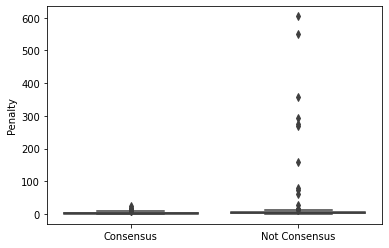

In [ ]:
import seaborn as sns
fig, ax=plt.subplots()
#Средние штрафы в консенсус и неконсенсус играх 
cons=[]
cons_ind=[]
noncons_ind=[]
for index, row in ADMMData.iterrows():
  if row['Game'] in ADMMConsensusGames:
    cons.append('Consensus')
    cons_ind.append(index)
  else:
    cons.append('Not Consensus')
    noncons_ind.append(index)
bp=sns.boxplot(x=cons, y=ADMMData['Penalty'], ax=ax)   

In [ ]:
ADMMCons=ADMMData[ADMMData.Game.isin(ADMMConsensusGames)]
ADMMNonCons=ADMMData[~ADMMData.Game.isin(ADMMConsensusGames)]
print(ADMMCons.Penalty.mean())
print(ADMMNonCons.Penalty.mean())
print(ADMMNonCons['Penalty'].max())
print(ADMMCons['Penalty'].max())

2.8615124467710435
19.151141945166668
604.6333889
23.84200056


[Text(0, 0.5, 'Штрафы')]

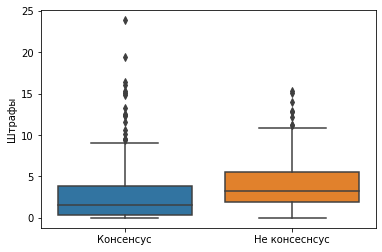

In [ ]:
cons=[]
for index, row in ADMMData.iterrows():
  if row['Penalty']<24:
    if row['Game'] in ADMMConsensusGames:
      cons.append('Консенсус')
    else:
      cons.append('Не консеснсус')

bp=sns.boxplot(x=cons, y=ADMMData[ADMMData['Penalty']<24]['Penalty'])
bp.set(ylabel='Штрафы')

In [ ]:
#в консенсус чаще стремятся уменьшить штрафы? 
print('Cons')
print(ADMMCons.shape[0])
print(ADMMCons[ADMMCons['dti']<0].shape[0])
print(ADMMCons[ADMMCons['dti']<0].shape[0]/ADMMCons.shape[0])

print('Not Cons')
print(ADMMNonCons.shape[0])
print(ADMMNonCons[ADMMNonCons['dti']<0].shape[0])
print(ADMMNonCons[ADMMNonCons['dti']<0].shape[0]/ADMMNonCons.shape[0])

Cons
297
123
0.41414141414141414
Not Cons
180
70
0.3888888888888889


In [ ]:
#если на предыдущем шаге был большой штраф, то игрок будет применять PI?
neg_gain=[]
PI=[]
for index, row in ADMMData.iterrows():
  if index < len(ADMMData)-1:
    if (row['Gain']<0) & (ADMMData.iloc[index+1]['Time'] !=1):
      neg_gain.append(index)
for i in neg_gain:
  PI.append(ADMMData['Fi>Fprev'][i+1])
print(len(neg_gain)) 
print(sum(x==1 for x in PI))

67
7


In [ ]:
#если на предыдущем шаге был большой штраф, то игрок будет стараться его уменьшить?
neg_gain=[]
dt=[]
for index, row in ADMMData.iterrows():
  if index < len(ADMMData)-1:
    if (row['Gain']<0) & (ADMMData.iloc[index+1]['Time'] !=1):
      neg_gain.append(index)
for i in neg_gain:
  dt.append(ADMMData['dti'][i+1])
print(len(neg_gain)) 
print(sum(x<0 for x in dt))

67
46


[0.09444444444444444, 0.15151515151515152]


Text(0, 0.5, 'Доля решений')

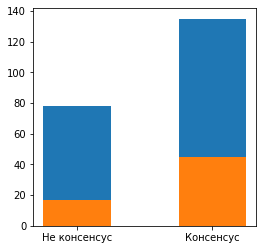

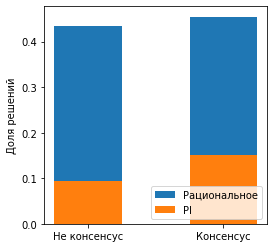

In [ ]:
#графики для рационального и PI поведения
fig1, ax1 = plt.subplots()
labels=['Рациональное', 'PI']
x=['Не консенсус', 'Консенсус']
rat=[ADMMNonCons[ADMMNonCons['Fii>Fiprev']==1].shape[0], ADMMCons[ADMMCons['Fii>Fiprev']==1].shape[0]]
pi=[ADMMNonCons[ADMMNonCons['Fi>Fprev']==1].shape[0], ADMMCons[ADMMCons['Fi>Fprev']==1].shape[0]]
ax1.bar(x, rat, width=0.5)
ax1.bar(x, pi, width=0.5)
fig1.set_figwidth(4)

fig2, ax2 = plt.subplots()
x=['Не консенсус', 'Консенсус']
rat=[ADMMNonCons[ADMMNonCons['Fii>Fiprev']==1].shape[0]/len(ADMMNonCons), ADMMCons[ADMMCons['Fii>Fiprev']==1].shape[0]/len(ADMMCons)]
pi=[ADMMNonCons[ADMMNonCons['Fi>Fprev']==1].shape[0]/len(ADMMNonCons), ADMMCons[ADMMCons['Fi>Fprev']==1].shape[0]/len(ADMMCons)]
print(pi)
ax2.bar(x, rat, width=0.5)
ax2.bar(x, pi, width=0.5)
fig2.set_figwidth(4)
plt.legend(labels, loc='lower right')
ax2.set_ylabel('Доля решений')
#plt.savefig('Rtnl_PI_bar.png')
#fig2.savefig('Rtnl_PI_bar.png', bbox_inches = 'tight')

In [ ]:
#цепочки Парето-улучшений
chain_lengths=[]
i=0
prev_player=ADMMPI.iloc[0]['player_id']
prev_time=ADMMPI.iloc[0]['Time']-1
for index, row in ADMMPI.iterrows():
  if (row['player_id'] == prev_player) & (row['Time'] == prev_time+1):
    i=i+1
  else:
    chain_lengths.append(i)
    i=1
  prev_player = row['player_id']
  prev_time = row['Time']
chain_lengths.append(i)
print(chain_lengths)

[1, 7, 1, 7, 1, 1, 7, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1]


[19, 11, 3]


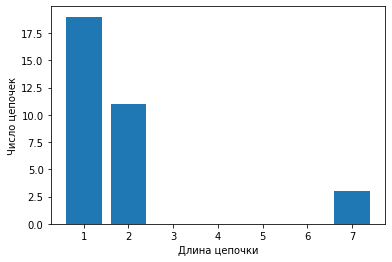

In [ ]:
#диаграмма длин цепочек 
ntimes=[]
for n in np.unique(chain_lengths):
  ntimes.append(chain_lengths.count(n))
print(ntimes) 
fg, ax = plt.subplots()
ax.bar(np.unique(chain_lengths), ntimes, width=0.8)
ax.set_xlabel('Длина цепочки')
ax.set_ylabel('Число цепочек')
fg.savefig('ADMM_chains.png')

#PI в GL 


In [ ]:
GLData

,Game,Time,Subject,Group,GrSubject,Type,Gain,Penalty,x,s1,...,twdbr1,twdbr2,twdbr3,br0,br0.5,br1,twbr,game,subject,player_id
0,48,1,3,1,1,1,6.268971,0.000000,38.300000,38.300000,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,48,3,26
1,48,2,3,1,1,1,5.626768,-0.110127,29.433333,49.000000,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,48,3,26
2,48,3,3,1,1,1,6.316628,0.042093,39.433333,79.000000,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,48,3,26
3,48,4,3,1,1,1,7.411182,0.043961,54.579167,79.000000,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,48,3,26
4,48,5,3,1,1,1,6.884528,0.146356,48.433333,79.000000,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,48,3,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,107,4,5,2,3,25,5.290672,2.285504,32.398438,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,107,5,19
1148,107,5,5,2,3,25,6.450309,1.149033,32.750000,20.000000,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,107,5,19
1149,107,6,5,2,3,25,7.763144,0.443815,42.354167,20.000000,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,107,5,19
1150,107,7,5,2,3,25,7.767302,0.438387,42.333333,14.190625,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,107,5,19


In [ ]:
GLPI=GLData[GLData['Fi>Fprev']==1]
GLPI=GLPI[['Game', 'Time', 'Type', 'Gain', 'Penalty', 'Fi>Fprev', 'player_id',	'dsi', 'dxi', 'dti']]

In [ ]:
print(GLPI.shape[0])
print(GLPI[GLPI['dti']<0].shape[0])

27
15


In [ ]:
#уменьшение/увеличение ресурса, штрафа
x_inc=GLPI[GLPI['dxi']>0].shape[0]
x_dec=GLPI[GLPI['dxi']<0].shape[0]
x_same=GLPI[GLPI['dxi']==0].shape[0]

t_inc=GLPI[GLPI['dti']>0].shape[0]
t_dec=GLPI[GLPI['dti']<0].shape[0]

print(x_inc); print(x_dec); print(x_same)
print(t_inc); print(t_dec)

16
5
6
12
15


In [ ]:
GLData[GLData['dti']<0].shape[0]

476

In [ ]:
#если на предыдущем шаге был большой штраф, то игрок будет применять PI?
neg_gain=[]
PI=[]
for index, row in GLData.iterrows():
  if index < len(GLData)-1:
    if (row['Gain']<0) & (GLData.iloc[index+1]['Time'] !=1):
      neg_gain.append(index)
for i in neg_gain:
  PI.append(GLData['Fi>Fprev'][i+1])
print(len(neg_gain)) 
print(sum(x==1 for x in PI))

25
0


In [ ]:
#если на предыдущем шаге был большой штраф, то игрок будет стараться его уменьшить?
neg_gain=[]
dt=[]
for index, row in GLData.iterrows():
  if index < len(GLData)-1:
    if (row['Gain']<0) & (GLData.iloc[index+1]['Time'] !=1):
      neg_gain.append(index)
for i in neg_gain:
  dt.append(GLData['dti'][i+1])
print(len(neg_gain)) 
print(sum(x<0 for x in dt))

25
17


In [ ]:
print(GLData.Penalty.mean())
print(GLData.Penalty.max())

138.88888888369877
20059.96223


In [ ]:
GLData.Penalty.describe()

count     1152.000000
mean       138.888889
std       1243.685838
min        -30.495959
25%         -0.235212
50%          0.000153
75%          0.289579
max      20059.962230
Name: Penalty, dtype: float64

In [ ]:
GLPI.Penalty.describe()

count    27.000000
mean      0.218341
std       0.599030
min      -0.607711
25%      -0.205772
50%      -0.025446
75%       0.577572
max       1.583333
Name: Penalty, dtype: float64

In [ ]:
#PI приводит к отрицательным штрафам? 
print(GLPI.shape[0])
print(GLPI[GLPI['Penalty']<0].shape[0])
print(GLData[GLData['Penalty']<0].shape[0])

27
14
573


In [ ]:
GLCons=GLData[GLData.Game.isin(GoodConsensusGames)]
GLNonCons=GLData[~GLData.Game.isin(GLConsensusGames)]

[0.013636363636363636, 0.036585365853658534]


Text(0, 0.5, 'Доля решений')

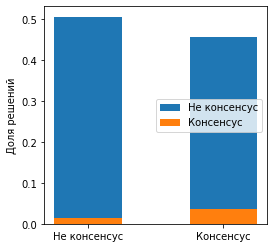

In [ ]:
fig, ax = plt.subplots()
x=['Не консенсус', 'Консенсус']
rat=[GLNonCons[GLNonCons['Fii>Fiprev']==1].shape[0]/len(GLNonCons), GLCons[GLCons['Fii>Fiprev']==1].shape[0]/len(GLCons)]
pi=[GLNonCons[GLNonCons['Fi>Fprev']==1].shape[0]/len(GLNonCons), GLCons[GLCons['Fi>Fprev']==1].shape[0]/len(GLCons)]
print(pi)
ax.bar(x, rat, width=0.5)
ax.bar(x, pi, width=0.5)
fig.set_figwidth(4)
plt.legend(x, loc='right')
ax.set_ylabel('Доля решений')

In [ ]:
#поведение, направленное на уменьшение штрафа: во всех играх, консенсус, без консенсуса
print(GLData[GLData['dti']<0].shape[0]/GLData.shape[0])
print(GLCons[GLCons['dti']<0].shape[0]/GLCons.shape[0])
print(GLNonCons[GLNonCons['dti']<0].shape[0]/GLNonCons.shape[0])

0.4131944444444444
0.40853658536585363
0.4166666666666667


In [ ]:
print(GLData.Game.unique())
print(GoodConsensusGames)
print(len(GLCons))
print(len(GLNonCons))

[48 49 50 51 68 69 71 72 83 84 85 106 107]
{71, 72, 107, 48, 49, 51}
492
660


In [ ]:
print(GLData[GLData['dti']<0].shape[0]/1113)
print(GLCons[GLCons['dti']<0].shape[0]/474)
print(GLNonCons[GLNonCons['dti']<0].shape[0]/639)

0.4276729559748428
0.4240506329113924
0.4303599374021909


In [ ]:
GLCons.Penalty.describe()

count      492.000000
mean       142.276423
std       1348.202785
min        -30.495959
25%         -0.224896
50%         -0.001127
75%          0.231051
max      20059.962230
Name: Penalty, dtype: float64

In [ ]:
GLNonCons.Penalty.describe()

count      660.000000
mean       136.363636
std       1160.711163
min         -3.947191
25%         -0.250000
50%          0.001922
75%          0.329554
max      10003.365030
Name: Penalty, dtype: float64

In [ ]:
#посчитать по всем шагам разницу между заявкой и средним оппонентов 
GLData=GLData.sort_values(by=['Game', 'Time', 'GrSubject'])
s_cur=[0, 0, 0]
s_prev=[0, 0, 0]
mean_op=[0, 0, 0]
diff=[]
for index, row in GLData.iterrows():
  if row['Time']==1:
    s_cur[row['GrSubject']-1]=[row['s1'], row['s2'], row['s3']]
    s_prev=s_cur
    diff.append(np.NaN)
  else:
    if row['GrSubject']==1:
      s_prev=s_cur
    s_cur[row['GrSubject']-1]=[row['s1'], row['s2'], row['s3']]
    for i in GLData.GrSubject.unique():
      mean_op[i-1]=(s_prev[0][i-1]+s_prev[1][i-1]+s_prev[2][i-1]-s_prev[row['GrSubject']-1][i-1])/2
    d=np.array(s_cur[row['GrSubject']-1])-np.array(mean_op)
    diff.append(np.sum(np.abs(d)))
print(diff)
A=GLData[['Game', 'Time', 'GrSubject', 's1', 's2', 's3', 'Fi>Fprev']]
A['|s-s{-i}_prev|']=diff

[nan, nan, nan, 19.0, 79.94999999999999, 38.4, 80.15, 83.9, 63.95, 80.15, 17.900000000000006, 84.1875, 53.0625, 139.015625, 54.50000000000001, 69.0, 99.875, 153.12500000000003, 71.85, 135.65, 154.5, 111.0, 115.25, 138.75, 142.5, 120.0, 136.25, 75.0, 60.0, 76.25, 127.5, 108.75, 88.75, 117.5, 102.5, 95.0, 122.5, 107.5, 55.0, 105.625, 109.375, 100.0, 120.0, 95.0, 130.0, 130.0, 131.0, 120.0, 130.0, 133.0, 131.0, 126.0, 142.25, 124.75, 126.0, 132.5, 121.5, 127.5, 131.0, 109.5, 131.5, 127.0, 109.5, nan, nan, nan, 28.349999999999994, 29.749999999999993, 29.537499999999994, 20.299999999999997, 25.599999999999994, 19.9, 7.500000000000007, 105.5, 53.3, 62.400000000000006, 134.65, 122.0, 70.75, 55.5, 47.3125, 51.75, 184.0, 70.828125, 70.171875, 21.5, 74.25, 48.25, 50.0, 66.875, 48.125, 16.331250000000008, 35.39999999999999, 81.5, 21.51562500000001, 60.44218749999999, 64.95781249000001, 96.58945312499999, 60.41054687500001, 77.99999999999999, 95.59999999900002, 68.30263671949999, 68.79736328050001

<ipython-input-213-aa9ab29445dc>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A['|s-s{-i}_prev|']=diff


In [ ]:
#есть ли разница diff для PI и не PI? 
print(A[A['Fi>Fprev']==0]['|s-s{-i}_prev|'].mean())
print(A[A['Fi>Fprev']==1]['|s-s{-i}_prev|'].mean())

118.580253258256
131.10843980575928


In [ ]:
A[A['Fi>Fprev']==1]

,Game,Time,GrSubject,s1,s2,s3,Fi>Fprev,|s-s{-i}_prev|
24,48,4,2,56.437500,28.0000,30.562500,1.0,17.900000
51,48,10,3,15.000000,15.0000,55.000000,1.0,76.250000
53,48,12,3,20.000000,20.0000,65.000000,1.0,95.000000
57,48,16,3,15.000000,15.0000,80.000000,1.0,120.000000
37,48,17,2,2.000000,52.0000,2.000000,1.0,133.000000
38,48,18,2,3.000000,52.0000,3.000000,1.0,142.250000
39,48,19,2,8.000000,52.0000,8.000000,1.0,132.500000
122,49,4,3,38.300000,38.3000,38.300000,1.0,53.300000
252,51,4,2,43.335938,40.0000,31.664062,1.0,9.500000
307,51,14,3,50.000000,0.0000,50.000000,1.0,81.500000


In [ ]:
#разница между '|s-s{-i}_prev|' на текущем и предыдущем шаге. Связано с pi?
A=A.sort_values(by=['Game', 'GrSubject', 'Time'])
d_more_dprev=[]
ddi=[]
for index, row in A.iterrows():
  if row['Time']==1:
    d_more_dprev.append(np.NaN)
    ddi.append(np.NaN)
  else:
    d=row['|s-s{-i}_prev|']  
    if d>d_prev:
      d_more_dprev.append(1)
    else:
      d_more_dprev.append(0)
    ddi.append(d-d_prev)    
  d_prev=row['|s-s{-i}_prev|']   

In [ ]:
#A=A.drop(columns=['d>dprev', 'ddi'])

In [ ]:
A.index = np.arange(len(A))
A['d>dprev']=pd.DataFrame(d_more_dprev)
A['ddi']=pd.DataFrame(ddi)
A.head(10)

,Game,Time,GrSubject,s1,s2,s3,Fi>Fprev,|s-s{-i}_prev|,d>dprev,ddi
0,48,1,1,38.3,36.000000,38.300000,NaN,NaN,NaN,NaN
1,48,2,1,49.0,31.850000,34.150000,0.0,19.0000,0.0,NaN
2,48,3,1,79.0,26.750000,9.250000,0.0,80.1500,1.0,61.1500
3,48,4,1,79.0,17.750000,18.250000,0.0,80.1500,0.0,0.0000
4,48,5,1,79.0,5.784375,30.215625,0.0,53.0625,0.0,-27.0875
5,48,6,1,80.0,36.925000,-1.925000,0.0,69.0000,1.0,15.9375
6,48,7,1,95.0,15.000000,5.000000,0.0,71.8500,1.0,2.8500
7,48,8,1,100.0,11.250000,3.750000,0.0,111.0000,1.0,39.1500
8,48,9,1,110.0,11.250000,-6.250000,0.0,142.5000,1.0,31.5000
9,48,10,1,65.0,28.750000,21.250000,0.0,75.0000,0.0,-67.5000


In [ ]:
print(len(A[A['Fi>Fprev']==1].index))
print(len(A[(A['Fi>Fprev']==1)&(A['d>dprev']==0)].index))
print(len(A[A['d>dprev']==0].index))

27
13
542


#Графики для выигрышей


In [ ]:
def payoff_plot (fulldata, game):
  data=fulldata[fulldata['Game']==game]
  time=data.Time.unique()
  first=data[data['Type']==1]['Gain']
  second=data[data['Type']==9]['Gain']
  third=data[data['Type']==25]['Gain']

  fig, ax=plt.subplots()
  plt.plot(time, first)
  plt.plot(time, second)
  plt.plot(time, third)

  #выделяем участки, где у всех PI
  f_PI=[]
  s_PI=[]
  t_PI=[]
  PI_times=[]
  for t in time:
    curdata=data[data['Time']==t]
    if (curdata['Fi>Fprev'].all())&(t!=1):
      PI_times.append(t)
      f_PI.append(curdata[curdata['Type']==1]['Gain'])
      s_PI.append(curdata[curdata['Type']==9]['Gain'])
      t_PI.append(curdata[curdata['Type']==25]['Gain'])
  
  plt.scatter(PI_times, f_PI, color='red')
  plt.scatter(PI_times, s_PI, color='red')
  plt.scatter(PI_times, t_PI, color='red')
  labels=['1', '9', '25']
  plt.legend(labels)

In [ ]:
#отметить реальные PI
def payoff_plot_realPI (fulldata, game):
  data=fulldata[fulldata['Game']==game]
  time=data.Time.unique()
  first=data[data['Type']==1]['Gain']
  second=data[data['Type']==9]['Gain']
  third=data[data['Type']==25]['Gain']

  fig, ax=plt.subplots()
  plt.plot(time, first)
  plt.plot(time, second)
  plt.plot(time, third)

  #выделяем участки, где есть реальное PI
  f_rPI=[]
  s_rPI=[]
  t_rPI=[]
  rPI_times=[]
  for t in time:
    curdata=data[data['Time']==t]
    if (curdata['Fnew>Fprev'].all())&(t!=1):
      rPI_times.append(t)
      f_rPI.append(curdata[curdata['Type']==1]['Gain'])
      s_rPI.append(curdata[curdata['Type']==9]['Gain'])
      t_rPI.append(curdata[curdata['Type']==25]['Gain'])
  
  plt.scatter(rPI_times, f_rPI, color='green')
  plt.scatter(rPI_times, s_rPI, color='green')
  plt.scatter(rPI_times, t_rPI, color='green')
  plt.xlabel('Шаг')
  plt.ylabel('Выигрыш')
  labels=['Тип 1', 'Тип 9', 'Тип 25']
  plt.legend(labels)

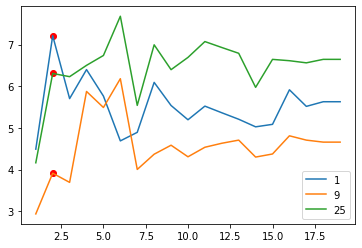

In [ ]:
payoff_plot(YHData, 41)

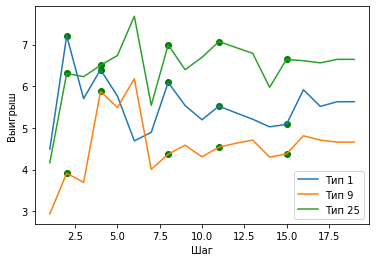

In [ ]:
payoff_plot_realPI(YHData, 41)
#plt.savefig('plot41.png')

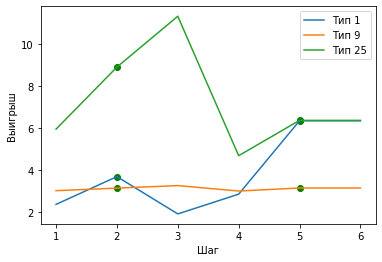

In [ ]:
payoff_plot_realPI(YHData, 42)
plt.savefig('plot42.png')

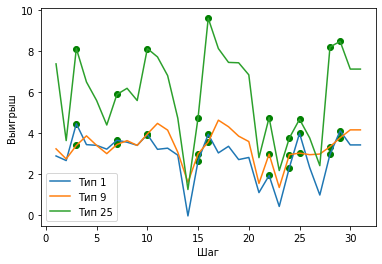

In [ ]:
payoff_plot_realPI(YHData, 56)
plt.savefig('plot56.png')

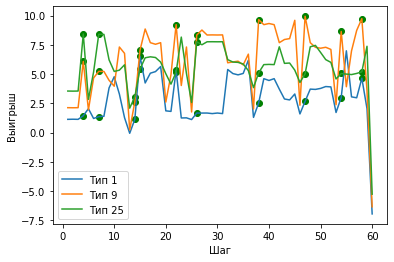

In [ ]:
payoff_plot_realPI(YHData, 40)

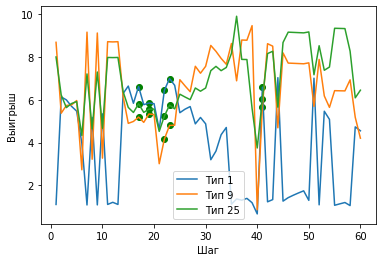

In [ ]:
payoff_plot_realPI(YHData, 43)

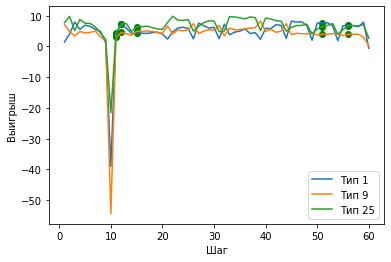

In [ ]:
payoff_plot_realPI(YHData, 57)

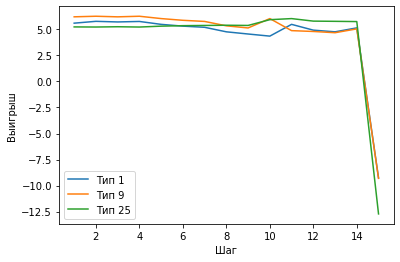

In [ ]:
payoff_plot_realPI(YHData, 60)

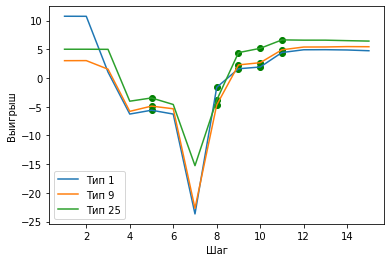

In [ ]:
payoff_plot_realPI(YHData, 61)

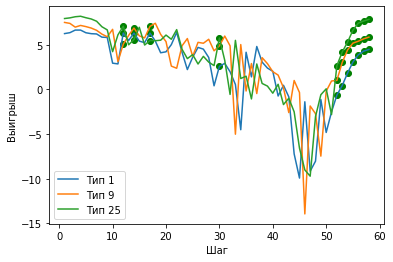

In [ ]:
payoff_plot_realPI(ADMMData, 45)
plt.savefig('plot45')

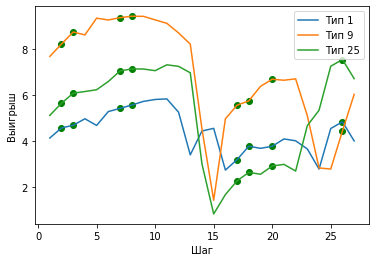

In [ ]:
payoff_plot_realPI(ADMMData, 46)

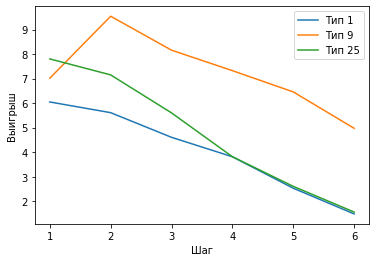

In [ ]:
payoff_plot_realPI(ADMMData, 80)

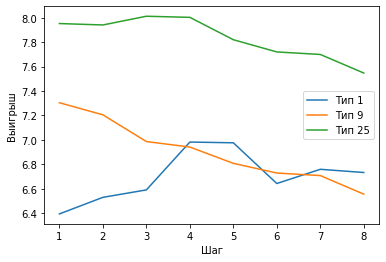

In [ ]:
payoff_plot_realPI(ADMMData, 81)

In [ ]:
#45,46,80,81
#65, 67, 82
#GLCons: 11,12,13,14,15,26,30,33,38,48,49,51,71,72,107

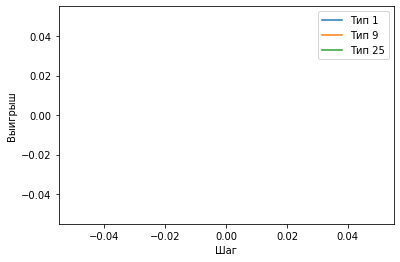

In [ ]:
payoff_plot_realPI(GLData, 12)

#Графики с учётом порядка игр

Text(0, 0.5, 'Доля PI во второй игре')

<Figure size 432x288 with 0 Axes>

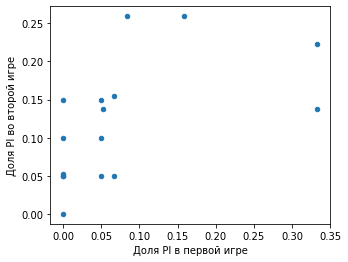

In [ ]:
f=plt.figure()
p=order_tab.plot.scatter(x="PI Share in 1", y="PI Share in 2");

plt.axis('scaled')
p.set_xlabel('Доля PI в первой игре')
p.set_ylabel('Доля PI во второй игре')
#plt.savefig('PI_order_games', dpi=200)

In [ ]:
yh_first_tab=order_tab[order_tab['First Game'].isin(yhgames)]
admm_first_tab=order_tab[order_tab['First Game'].isin(ADMMGoodGames)]

In [ ]:
yh_first_tab

,Player,First Game,Second Game,PI Share in 1,PI Share in 2
0,25,40,45,0.066667,0.155172
1,28,41,46,0.157895,0.259259
2,26,41,45,0.052632,0.137931
3,31,42,45,0.333333,0.137931
4,30,42,46,0.333333,0.222222
5,32,43,46,0.083333,0.259259
6,3,60,65,0.066667,0.050000


In [ ]:
yh_first_tab['PI Share in 1'].describe() #YH как первая игра

count    7.000000
mean     0.156266
std      0.125714
min      0.052632
25%      0.066667
50%      0.083333
75%      0.245614
max      0.333333
Name: PI Share in 1, dtype: float64

In [ ]:
yh_first_tab['PI Share in 2'].describe() #ADMM как вторая игра

count    7.000000
mean     0.174539
std      0.076588
min      0.050000
25%      0.137931
50%      0.155172
75%      0.240741
max      0.259259
Name: PI Share in 2, dtype: float64

In [ ]:
yh_first_tab['PI Share in 1'].corr(yh_first_tab['PI Share in 2'])

0.21824718880914593

In [ ]:
admm_first_tab

,Player,First Game,Second Game,PI Share in 1,PI Share in 2
7,35,80,92,0.00,0.050000
8,42,82,92,0.05,0.050000
9,41,82,92,0.05,0.100000
10,38,81,93,0.00,0.100000
11,39,81,93,0.00,0.052632
12,40,81,93,0.00,0.150000
13,37,80,94,0.00,0.000000
14,36,80,94,0.00,0.050000
15,43,82,94,0.05,0.150000


In [ ]:
admm_first_tab['PI Share in 2'].describe() #YH как вторая игра

count    9.000000
mean     0.078070
std      0.050517
min      0.000000
25%      0.050000
50%      0.052632
75%      0.100000
max      0.150000
Name: PI Share in 2, dtype: float64

In [ ]:
admm_first_tab['PI Share in 1'].describe() #ADMM как первая игра

count    9.000000
mean     0.016667
std      0.025000
min      0.000000
25%      0.000000
50%      0.000000
75%      0.050000
max      0.050000
Name: PI Share in 1, dtype: float64

In [ ]:
admm_first_tab['PI Share in 1'].corr(admm_first_tab['PI Share in 2'])

0.32558266316913953

<Figure size 432x288 with 0 Axes>

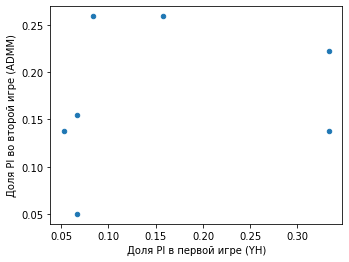

In [ ]:
f=plt.figure();
p=yh_first_tab.plot.scatter(x="PI Share in 1", y="PI Share in 2");

plt.axis('scaled')
p.set_xlabel('Доля PI в первой игре (YH)')
p.set_ylabel('Доля PI во второй игре (ADMM)')
plt.savefig('firstYH', dpi=200)

<Figure size 432x288 with 0 Axes>

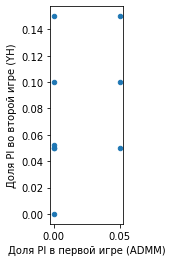

In [ ]:
f=plt.figure();
p=admm_first_tab.plot.scatter(x="PI Share in 1", y="PI Share in 2");

plt.axis('scaled')
p.set_xlabel('Доля PI в первой игре (ADMM)')
p.set_ylabel('Доля PI во второй игре (YH)')
plt.savefig('firstADMM', dpi=200)

#Добавим оценку механизма игроком


In [ ]:
YHData=pd.merge(YHData, Questionary[['player_id','yhscore']], on='player_id', how='inner')

In [ ]:
YHData.head()

,Game,Time,Subject,Group,GrSubject,Type,Gain,Penalty,x,s1,...,br0.5,br1,twbr,game,subject,player_id,x>x_prev,pen<pen_prev,gain>gain_prev,yhscore
0,40,1,11,1,1,1,1.131904,0.107000,0.534884,NaN,...,0.0,0.0,0.0,40,11,25,0,0,0,4
1,40,2,11,1,1,1,1.142498,0.117700,0.588099,NaN,...,0.0,0.0,1.0,40,11,25,0,1,0,4
2,40,3,11,1,1,1,1.131904,0.107000,0.534884,NaN,...,0.0,0.0,0.0,40,11,25,0,1,0,4
3,40,4,11,1,1,1,1.438479,0.055825,1.232943,NaN,...,0.0,0.0,1.0,40,11,25,0,1,0,4
4,40,5,11,1,1,1,2.043182,5.836250,61.085450,NaN,...,0.0,0.0,1.0,40,11,25,0,0,0,4


In [ ]:
YHUlocShare=pd.merge(YHUlocShare, Questionary[['player_id','yhscore']], on='player_id')
YHUlocShare

,player_id,YHUlocShare,yhscore
0,25,0.066667,4
1,28,0.157895,4
2,27,0.157895,4
3,32,0.083333,3
4,20,0.258065,5
5,21,0.419355,1
6,18,0.129032,3
7,19,0.083333,4
8,17,0.050000,3
9,22,0.100000,3


In [ ]:
t=YHUlocShare.sort_values(by = ['YHUlocShare'])
t

,player_id,YHUlocShare,yhscore
11,4,0.000000,3
21,37,0.000000,1
10,6,0.000000,1
16,42,0.050000,1
15,35,0.050000,2
22,36,0.050000,2
8,17,0.050000,3
19,39,0.052632,1
13,1,0.066667,4
12,3,0.066667,4


Text(0, 0.5, 'Оценка механизма YH')

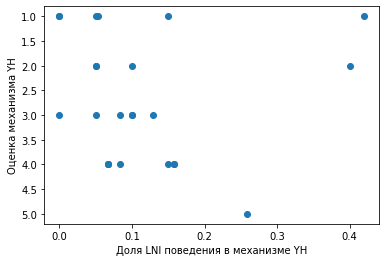

In [ ]:
f=plt.figure()
p=f.add_subplot(111);
p.scatter(t.YHUlocShare, t.yhscore);
plt.gca().invert_yaxis()
p.set_xlabel('Доля LNI поведения в механизме YH')
p.set_ylabel('Оценка механизма YH')
#f.savefig('scoreYH.png', dpi=200)

In [ ]:
a=YHUlocShare['YHUlocShare']
b=YHUlocShare['yhscore']
c=np.corrcoef(a, b)
print(c)

[[1.         0.03821501]
 [0.03821501 1.        ]]


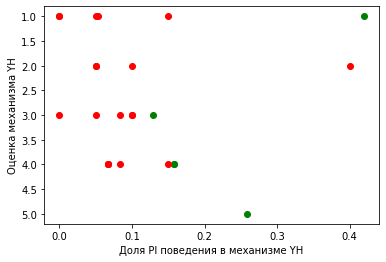

In [ ]:
f=plt.figure()
p=f.add_subplot(111);
for player in YHUlocShare.player_id.unique():
  game = GamesPlayers.loc[GamesPlayers['player_id']==player]['game'].values[0]
  share = YHUlocShare.loc[YHUlocShare['player_id']==player]['YHUlocShare'].values[0]
  score = YHUlocShare.loc[YHUlocShare['player_id']==player]['yhscore'].values[0]
  if game in YHConsensusGames:
    p.scatter(share, score, c='g')  
  else:
    p.scatter(share, score, c='r') 
plt.gca().invert_yaxis()     
p.set_xlabel('Доля PI поведения в механизме YH')
p.set_ylabel('Оценка механизма YH')
#p.set_xlabel('Share of PI decisions in YH games')
#p.set_ylabel('YH rank')
plt.show() 
f.savefig('scoreYHcolor.png', dpi=200)     

In [ ]:
ADMMData=pd.merge(ADMMData, Questionary[['player_id','boydscore']], on='player_id', how='inner')
ADMMData

,Unnamed: 0,Game,Time,Subject,Group,GrSubject,Type,Gain,Penalty,x,...,br0,br0.5,br1,game,subject,player_id,x>x_prev,pen<pen_prev,gain>gain_prev,boydscore
0,2,45,1,5,2,3,25,7.950005,0.006125,38.3,...,0.0,0.0,0.0,45,5,25,0,0,0,3
1,5,45,2,5,2,3,25,8.023831,0.038427,40.0,...,0.0,0.0,0.0,45,5,25,1,0,1,3
2,8,45,3,5,2,3,25,8.150069,0.096142,43.0,...,0.0,0.0,0.0,45,5,25,1,0,1,3
3,11,45,4,5,2,3,25,8.206991,0.159609,45.0,...,0.0,0.0,0.0,45,5,25,1,0,1,3
4,14,45,5,5,2,3,25,8.040625,0.325976,45.0,...,0.0,0.0,0.0,45,5,25,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,464,82,16,8,3,3,25,-0.061104,10.784909,90.0,...,0.0,0.0,0.0,82,8,42,1,0,0,3
330,467,82,17,8,3,3,25,5.063061,2.893069,38.3,...,0.0,0.0,0.0,82,8,42,0,1,1,3
331,470,82,18,8,3,3,25,3.415085,4.541045,38.3,...,0.0,0.0,0.0,82,8,42,0,0,0,3
332,473,82,19,8,3,3,25,2.619110,4.089094,20.0,...,0.0,0.0,0.0,82,8,42,0,1,0,3


In [ ]:
ADMMUlocShare=pd.merge(ADMMUlocShare, Questionary[['player_id','boydscore']], on='player_id')
t=ADMMUlocShare.sort_values(by = ['ADMMUlocShare'])
t

,player_id,ADMMUlocShare,boydscore
14,39,0.000000,3
13,38,0.000000,4
12,40,0.000000,4
11,36,0.000000,2
10,35,0.000000,2
9,37,0.000000,4
17,42,0.050000,3
15,43,0.050000,1
5,3,0.050000,5
16,41,0.050000,2


Text(0, 0.5, 'Оценка механизма ADMM')

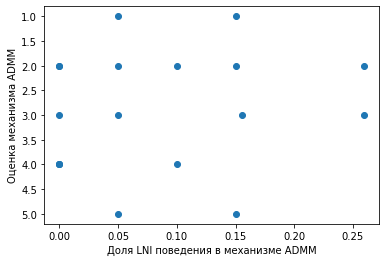

In [ ]:
f=plt.figure()
p=f.add_subplot(111);
p.scatter(t.ADMMUlocShare, t.boydscore);
plt.gca().invert_yaxis()
p.set_xlabel('Доля LNI поведения в механизме ADMM')
p.set_ylabel('Оценка механизма ADMM')
#f.savefig('scoreADMM.png', dpi=200)

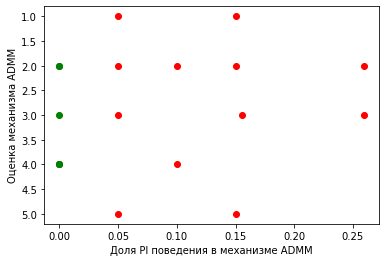

In [ ]:
f=plt.figure()
p=f.add_subplot(111);
for player in ADMMUlocShare.player_id.unique():
  game = GamesPlayers.loc[GamesPlayers['player_id']==player]['game'].values[0]
  share = ADMMUlocShare.loc[ADMMUlocShare['player_id']==player]['ADMMUlocShare'].values[0]
  score = ADMMUlocShare.loc[ADMMUlocShare['player_id']==player]['boydscore'].values[0]
  if game in ADMMConsensusGames:
    p.scatter(share, score, c='g')  
  else:
    p.scatter(share, score, c='r') 
plt.gca().invert_yaxis()     
p.set_xlabel('Доля PI поведения в механизме ADMM')
p.set_ylabel('Оценка механизма ADMM')
#p.set_xlabel('Share of PI decisions in ADMM games')
#p.set_ylabel('ADMM rank')
plt.show() 
f.savefig('scoreADMMcolor.png', dpi=200)

In [ ]:
Uloc_score=pd.merge(YHUlocShare, ADMMUlocShare, on='player_id', how='inner')

In [ ]:
Uloc_score=Uloc_score[['player_id', 'YHUlocShare', 'ADMMUlocShare', 'yhscore', 'boydscore']]
Uloc_score

,player_id,YHUlocShare,ADMMUlocShare,yhscore,boydscore
0,25,0.066667,0.155172,4,3
1,28,0.157895,0.259259,4,3
2,32,0.083333,0.259259,3,2
3,3,0.066667,0.050000,4,5
4,35,0.050000,0.000000,2,2
5,42,0.050000,0.050000,1,3
6,41,0.100000,0.050000,2,2
7,38,0.100000,0.000000,3,4
8,39,0.052632,0.000000,1,3
9,40,0.150000,0.000000,1,4


In [ ]:
sum((Uloc_score.YHUlocShare-Uloc_score.ADMMUlocShare)*(Uloc_score.yhscore-Uloc_score.boydscore)<0)

7

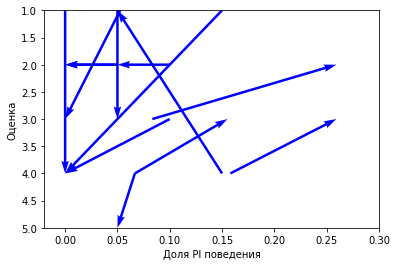

In [ ]:
t=plt.figure(1);
f=t.add_subplot(111);
for index, row in Uloc_score.iterrows():
  y=row['YHUlocShare']; ys=row['yhscore'];
  ad=row['ADMMUlocShare']; ads=row['boydscore'];
  f.quiver(y, ys, ad-y, ads-ys, angles='xy', scale_units='xy', scale = 1, color='blue')
f.axis([-0.02, 0.3, 5, 1]);  
f.set_xlabel('Доля PI поведения')
f.set_ylabel('Оценка')
#f.set_xlabel('Share of PI decisions')
#f.set_ylabel('Rank')
t.savefig('arrows.png', dpi=200)

In [ ]:
#Оценки+порядок игр
Uloc_score.rename(columns={'player_id': 'Player'}, inplace=True)
order_score=pd.merge(order_tab, Uloc_score, on=['Player'], how='inner')

In [ ]:
first_score=[]; second_score=[]
for index, row in order_score.iterrows():
  if row['First Game'] in yhgames:
    first_score.append(row['yhscore'])
    second_score.append(row['boydscore'])
  else:
    first_score.append(row['boydscore'])
    second_score.append(row['yhscore'])  

In [ ]:
order_score['first_score']=first_score
order_score['second_score']=second_score

In [ ]:
order_score=order_score[['Player', 'First Game', 'Second Game', 'PI Share in 1', 'PI Share in 2', 'first_score', 'second_score']]
order_score

,Player,First Game,Second Game,PI Share in 1,PI Share in 2,first_score,second_score
0,25,40,45,0.066667,0.155172,4.0,3.0
1,28,41,46,0.157895,0.259259,4.0,3.0
2,32,43,46,0.083333,0.259259,3.0,2.0
3,3,60,65,0.066667,0.050000,4.0,5.0
4,35,80,92,0.000000,0.050000,2.0,2.0
5,42,82,92,0.050000,0.050000,3.0,1.0
6,41,82,92,0.050000,0.100000,2.0,2.0
7,38,81,93,0.000000,0.100000,4.0,3.0
8,39,81,93,0.000000,0.052632,3.0,1.0
9,40,81,93,0.000000,0.150000,4.0,1.0


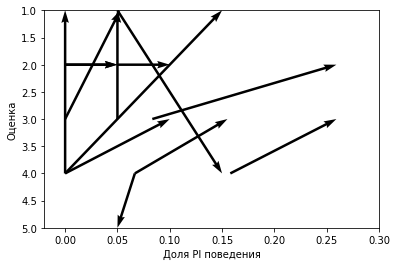

In [ ]:
t=plt.figure(1);
f=t.add_subplot(111);
for index, row in order_score.iterrows():
  fi=row['PI Share in 1']; fis=row['first_score'];
  s=row['PI Share in 2']; ss=row['second_score'];
  f.quiver(fi, fis, s-fi, ss-fis, angles='xy', scale_units='xy', scale = 1)
f.axis([-0.02, 0.3, 5, 1]);  
f.set_xlabel('Доля PI поведения')
f.set_ylabel('Оценка')
#f.set_xlabel('Share of PI decisions')
#f.set_ylabel('Rank')
t.savefig('arrows.png', dpi=200)

# Анализ устойчивости рационального поведения


TODO: Добавить расчёт BR новым играм GL 50, 71, 106 - с небольшой долей штрафованных шагов

In [ ]:
YHRationalShare=[];
for player in YHData.player_id.unique():
  alldec=sum(YHData.player_id == player) 
  Br1dec = sum((YHData.player_id == player) & (YHData.br1 == 1))
  Twbrdec = sum((YHData.player_id == player) & (YHData.twbr == 1))
  YHRationalShare.append([player, Br1dec/alldec, Twbrdec/alldec])  
YHRationalShare = pd.DataFrame(YHRationalShare, columns=['player_id', 'YHBr1Share', 'YHTwbrShare'])
YHRationalShare=pd.merge(YHRationalShare, Questionary[['player_id','yhscore']], on='player_id')
YHRationalShare.head()

,player_id,YHBr1Share,YHTwbrShare,yhscore
0,25,0.033333,0.650000,4
1,28,0.000000,0.368421,4
2,27,0.052632,0.578947,4
3,32,0.066667,0.283333,3
4,20,0.064516,0.387097,5


Text(0, 0.5, 'Оценка механизма YH')

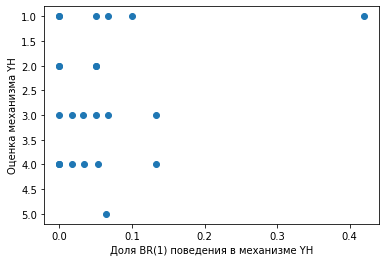

In [ ]:
t=YHRationalShare
f=plt.figure()
p=f.add_subplot(111);
p.scatter(t.YHBr1Share, t.yhscore);
plt.gca().invert_yaxis()
p.set_xlabel('Доля BR(1) поведения в механизме YH')
p.set_ylabel('Оценка механизма YH')
#f.savefig('scoreBr1YH.png', dpi=200)

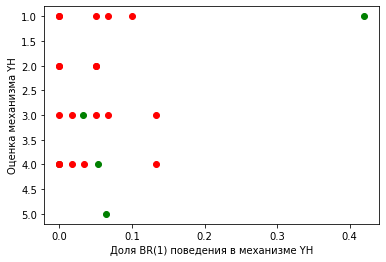

In [ ]:
f=plt.figure()
p=f.add_subplot(111);
for player in YHRationalShare.player_id.unique():
  game = GamesPlayers.loc[GamesPlayers['player_id']==player]['game'].values[0]
  share = YHRationalShare.loc[YHRationalShare['player_id']==player]['YHBr1Share'].values[0]
  score = YHRationalShare.loc[YHRationalShare['player_id']==player]['yhscore'].values[0]
  if game in YHConsensusGames:
    p.scatter(share, score, c='g')  
  else:
    p.scatter(share, score, c='r') 
plt.gca().invert_yaxis()     
p.set_xlabel('Доля BR(1) поведения в механизме YH')
p.set_ylabel('Оценка механизма YH')
#p.set_xlabel('Share of BR(1) behavior in YH games')
#p.set_ylabel('YH rank')
plt.show() 
f.savefig('scoreBr1YHcolor.png', dpi=200)

Text(0, 0.5, 'Оценка механизма YH')

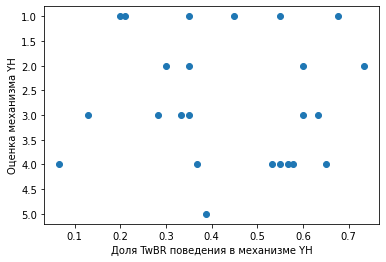

In [ ]:
t=YHRationalShare
f=plt.figure()
p=f.add_subplot(111);
p.scatter(t.YHTwbrShare, t.yhscore);
plt.gca().invert_yaxis()
p.set_xlabel('Доля TwBR поведения в механизме YH')
p.set_ylabel('Оценка механизма YH')
#f.savefig('scoreTwbrYH.png', dpi=200)

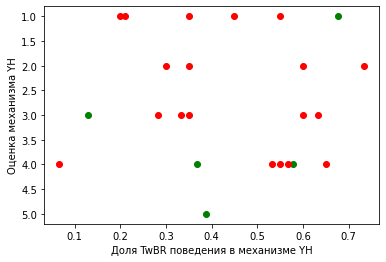

In [ ]:
f=plt.figure()
p=f.add_subplot(111);
for player in YHRationalShare.player_id.unique():
  game = GamesPlayers.loc[GamesPlayers['player_id']==player]['game'].values[0]
  share = YHRationalShare.loc[YHRationalShare['player_id']==player]['YHTwbrShare'].values[0]
  score = YHRationalShare.loc[YHRationalShare['player_id']==player]['yhscore'].values[0]
  if game in YHConsensusGames:
    p.scatter(share, score, c='g')  
  else:
    p.scatter(share, score, c='r') 
plt.gca().invert_yaxis()     
p.set_xlabel('Доля TwBR поведения в механизме YH')
p.set_ylabel('Оценка механизма YH')
#p.set_xlabel('Share of TwBR behavior in YH games')
#p.set_ylabel('YH rank')
plt.show() 
f.savefig('scoreTwbrYHcolor.png', dpi=200)

In [ ]:
GLData=pd.merge(GLData, Questionary[['player_id','glscore']], on='player_id', how='inner')

In [ ]:
GLRationalShare=[];
for player in GLData.player_id.unique():
  alldec=sum(GLData.player_id == player) 
  Br1dec = sum((GLData.player_id == player) & (GLData.br1 == 1))
  Twbrdec = sum((GLData.player_id == player) & (GLData.twbr == 1))
  GLRationalShare.append([player, Br1dec/alldec, Twbrdec/alldec])  
GLRationalShare = pd.DataFrame(GLRationalShare, columns=['player_id', 'GLBr1Share', 'GLTwbrShare'])
GLRationalShare=pd.merge(GLRationalShare, Questionary[['player_id','glscore']], on='player_id')
GLRationalShare.head()

,player_id,GLBr1Share,GLTwbrShare,glscore
0,27,0.0,0.285714,1
1,25,0.0,0.035714,1
2,32,0.0,0.000000,5
3,28,0.0,0.200000,2
4,5,0.0,0.200000,1


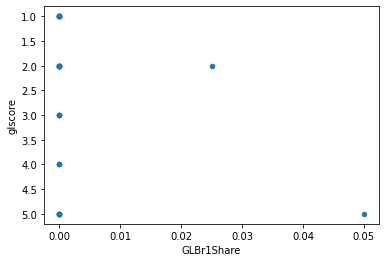

In [ ]:
GLRationalShare.plot.scatter(x="GLBr1Share", y="glscore");
plt.gca().invert_yaxis()

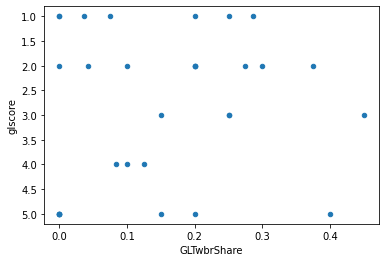

In [ ]:
GLRationalShare.plot.scatter(x="GLTwbrShare", y="glscore");
plt.gca().invert_yaxis()

In [ ]:
ADMMRationalShare=[];
for player in ADMMData.player_id.unique():
  alldec=sum(ADMMData.player_id == player) 
  Br1dec = sum((ADMMData.player_id == player) & (ADMMData.br1 == 1))
  Twbrdec = sum((ADMMData.player_id == player) & (ADMMData.twbr == 1))
  ADMMRationalShare.append([player, Br1dec/alldec, Twbrdec/alldec])  
ADMMRationalShare = pd.DataFrame(ADMMRationalShare, columns=['player_id', 'ADMMBr1Share', 'ADMMTwbrShare'])
ADMMRationalShare=pd.merge(ADMMRationalShare, Questionary[['player_id','boydscore']], on='player_id')
ADMMRationalShare.head()

,player_id,ADMMBr1Share,ADMMTwbrShare,boydscore
0,25,0.034483,0.448276,3
1,28,0.000000,0.629630,3
2,32,0.111111,0.629630,2
3,7,0.150000,0.550000,1
4,9,0.000000,0.200000,5


Text(0, 0.5, 'Оценка механизма ADMM')

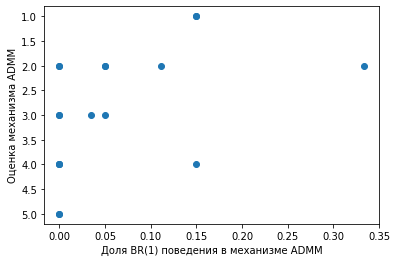

In [ ]:
t=ADMMRationalShare
f=plt.figure()
p=f.add_subplot(111);
p.scatter(t.ADMMBr1Share, t.boydscore);
plt.gca().invert_yaxis()
p.set_xlabel('Доля BR(1) поведения в механизме ADMM')
p.set_ylabel('Оценка механизма ADMM')
#f.savefig('scoreBr1ADMM.png', dpi=200)

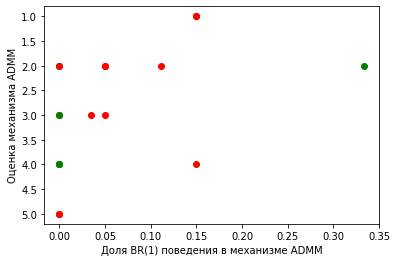

In [ ]:
f=plt.figure()
p=f.add_subplot(111);
for player in ADMMRationalShare.player_id.unique():
  game = GamesPlayers.loc[GamesPlayers['player_id']==player]['game'].values[0]
  share = ADMMRationalShare.loc[ADMMRationalShare['player_id']==player]['ADMMBr1Share'].values[0]
  score = ADMMRationalShare.loc[ADMMRationalShare['player_id']==player]['boydscore'].values[0]
  if game in ADMMConsensusGames:
    p.scatter(share, score, c='g')  
  else:
    p.scatter(share, score, c='r') 
plt.gca().invert_yaxis()     
p.set_xlabel('Доля BR(1) поведения в механизме ADMM')
p.set_ylabel('Оценка механизма ADMM')
plt.show() 
f.savefig('scoreBr1ADMMcolor.png', dpi=200)

Text(0, 0.5, 'Оценка механизма ADMM')

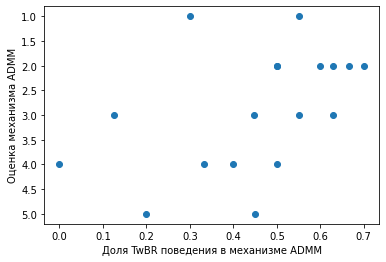

In [ ]:
t=ADMMRationalShare
f=plt.figure()
p=f.add_subplot(111);
p.scatter(t.ADMMTwbrShare, t.boydscore);
plt.gca().invert_yaxis()
p.set_xlabel('Доля TwBR поведения в механизме ADMM')
p.set_ylabel('Оценка механизма ADMM')
#f.savefig('scoreTwbrADMM.png', dpi=200)

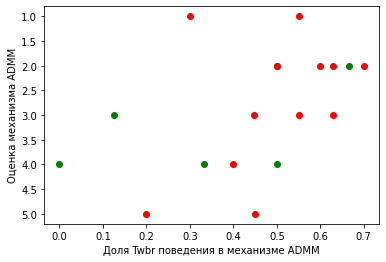

In [ ]:
f=plt.figure()
p=f.add_subplot(111);
for player in ADMMRationalShare.player_id.unique():
  game = GamesPlayers.loc[GamesPlayers['player_id']==player]['game'].values[0]
  share = ADMMRationalShare.loc[ADMMRationalShare['player_id']==player]['ADMMTwbrShare'].values[0]
  score = ADMMRationalShare.loc[ADMMRationalShare['player_id']==player]['boydscore'].values[0]
  if game in ADMMConsensusGames:
    p.scatter(share, score, c='g')  
  else:
    p.scatter(share, score, c='r') 
plt.gca().invert_yaxis()     
p.set_xlabel('Доля Twbr поведения в механизме ADMM')
p.set_ylabel('Оценка механизма ADMM')
plt.show() 
f.savefig('scoreTwbrADMMcolor.png', dpi=200)

(0.03333333333333333,
 0.7666666666666666,
 -0.022500000000000003,
 0.47250000000000003)

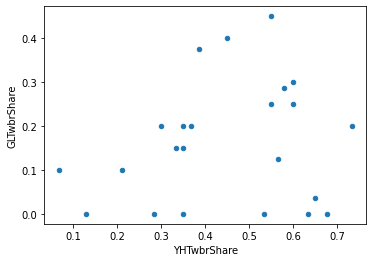

In [ ]:
YH_GLRationalShare = pd.merge(YHRationalShare, GLRationalShare, on = 'player_id', how = 'inner')
YH_GLRationalShare.plot.scatter(x="YHTwbrShare", y="GLTwbrShare");
plt.axis('scaled')

(0.18855263157894736, 0.6719736842105264, -0.03333333333333333, 0.7)

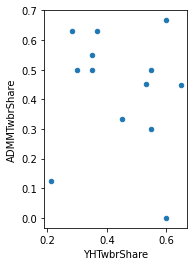

In [ ]:
YH_ADMMRationalShare = pd.merge(YHRationalShare, ADMMRationalShare, on = 'player_id', how = 'inner')
YH_ADMMRationalShare.plot.scatter(x="YHTwbrShare", y="ADMMTwbrShare");
plt.axis('scaled')

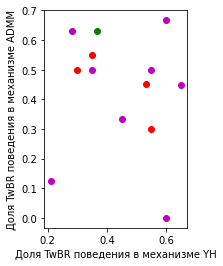

In [ ]:
f=plt.figure();
p=f.add_subplot(111);
tab=[];
for player in YH_ADMMRationalShare.player_id.unique():
  games = GamesPlayers.loc[GamesPlayers['player_id']==player]['game']
  games = games.to_list();
  yh = YH_ADMMRationalShare.loc[YH_ADMMRationalShare['player_id']==player]['YHTwbrShare'].values[0]
  admm = YH_ADMMRationalShare.loc[YH_ADMMRationalShare['player_id']==player]['ADMMTwbrShare'].values[0]
  yhgames = YHGames['Game'].to_list()
  yhgame = set(games).intersection(yhgames)
  admmgame = set(games).intersection(ADMMGoodGames)
  ann = yhgame.union(admmgame)
  if (len(set(games).intersection(YHConsensusGames)) == 0) & (len(set(games).intersection(ADMMConsensusGames)) == 0):
    p.scatter(yh, admm, c='r')
    #p.annotate(ann, xy=(yh, admm)) 
    cons_yh='-'; cons_admm='-'   
  if (len(set(games).intersection(YHConsensusGames)) == 1) & (len(set(games).intersection(ADMMConsensusGames)) == 0):  
    p.scatter(yh, admm, c='y')
    #p.annotate(ann, xy=(yh, admm)) 
    cons_yh='+'; cons_admm='-' 
  if (len(set(games).intersection(YHConsensusGames)) == 0) & (len(set(games).intersection(ADMMConsensusGames)) == 1):  
    p.scatter(yh, admm, c='m') 
    cons_yh='-'; cons_admm='+' 
  if (len(set(games).intersection(YHConsensusGames)) == 1) & (len(set(games).intersection(ADMMConsensusGames)) == 1):  
    p.scatter(yh, admm, c='g') 
    #p.annotate(ann, xy=(yh, admm)) 
    cons_yh='+'; cons_admm='+' 
  #p.annotate(ann, xy=(yh, admm))   
  tab.append([player, yhgame, admmgame, yh, admm, cons_yh, cons_admm])  
p.set_xlabel('Доля TwBR поведения в механизме YH')
p.set_ylabel('Доля TwBR поведения в механизме ADMM')
#p.set_xlabel('Share of TwBR behavior in YH games')
#p.set_ylabel('Share of TwBR behavior in ADMM games')
p.axis('scaled')
plt.show()
f.savefig('diagTwbrnew.png', dpi=200) 

In [ ]:
tab=pd.DataFrame(tab, columns=(['Игрок', 'Игра YH', 'Игра ADMM', 'Twbr в YH', 'Twbr в ADMM', 'Консенсус в YH', 'Консенсус в ADMM'])).sort_values(by=['Консенсус в YH', 'Консенсус в ADMM'])
def highlight(s):
  x=s.copy()
  condred=(x['Консенсус в YH']=='-')& (x['Консенсус в ADMM']=='-')
  condmag=(x['Консенсус в YH']=='-')& (x['Консенсус в ADMM']=='+')
  x.loc[condred, :]='background-color: red'
  x.loc[~condred, :]='background-color: green'
  x.loc[condmag, :]='background-color: magenta'
  return x

c=tab.style.apply(highlight, axis=None)
c.to_excel('tabTwbrnew.xlsx')
c

,Игрок,Игра YH,Игра ADMM,Twbr в YH,Twbr в ADMM,Консенсус в YH,Консенсус в ADMM
1,28,{41},{46},0.368421,0.629630,+,+
0,25,{40},{45},0.650000,0.448276,-,+
2,32,{43},{46},0.283333,0.629630,-,+
4,35,{92},{80},0.600000,0.666667,-,+
7,38,{93},{81},0.600000,0.000000,-,+
8,39,{93},{81},0.210526,0.125000,-,+
9,40,{93},{81},0.550000,0.500000,-,+
10,37,{94},{80},0.450000,0.333333,-,+
11,36,{94},{80},0.350000,0.500000,-,+
3,3,{60},{65},0.533333,0.450000,-,-


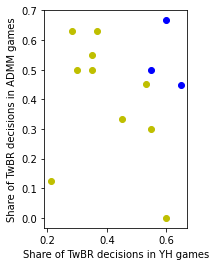

0     4
1     4
2     4
3     3
4     5
5     1
6     3
7     4
8     3
9     3
10    1
11    3
12    4
13    4
14    2
15    2
16    1
17    2
18    3
19    1
20    1
21    1
22    2
23    4
Name: yhscore, dtype: int64


In [ ]:
f=plt.figure();
p=f.add_subplot(111);
tab=[];
for player in YH_ADMMRationalShare.player_id.unique():
  yh = YH_ADMMRationalShare.loc[YH_ADMMRationalShare['player_id']==player]['YHTwbrShare'].values[0]
  admm = YH_ADMMRationalShare.loc[YH_ADMMRationalShare['player_id']==player]['ADMMTwbrShare'].values[0]
  if (admm+yh)/2 >0.5:
    p.scatter(yh, admm, c='b')
  else:
    p.scatter(yh, admm, c='y')
  tab.append([player, yhgame, admmgame, yh, admm, cons_yh, cons_admm])  
p.axis('scaled')
p.set_xlabel('Share of TwBR decisions in YH games')
p.set_ylabel('Share of TwBR decisions in ADMM games')
plt.show() 
f.savefig('diagTwBR_yellow.png', dpi=400) 
print(b)

In [ ]:
#c.to_latex('tabTwbr_YH_ADMM.tex')

(-0.006666666666666667, 0.13999999999999999, -0.016666666666666666, 0.35)

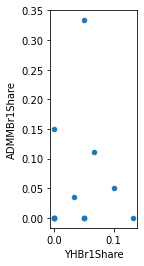

In [ ]:
YH_ADMMRationalShare.plot.scatter(x="YHBr1Share", y="ADMMBr1Share");
plt.axis('scaled')

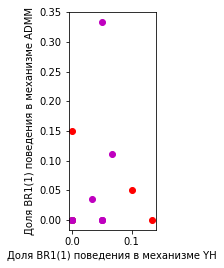

In [ ]:
f=plt.figure();
p=f.add_subplot(111);
tab=[];
for player in YH_ADMMRationalShare.player_id.unique():
  games = GamesPlayers.loc[GamesPlayers['player_id']==player]['game']
  games = games.to_list();
  yh = YH_ADMMRationalShare.loc[YH_ADMMRationalShare['player_id']==player]['YHBr1Share'].values[0]
  admm = YH_ADMMRationalShare.loc[YH_ADMMRationalShare['player_id']==player]['ADMMBr1Share'].values[0]
  yhgames = YHGames['Game'].to_list()
  yhgame = set(games).intersection(yhgames)
  admmgame = set(games).intersection(ADMMGoodGames)
  ann = yhgame.union(admmgame)
  if (len(set(games).intersection(YHConsensusGames)) == 0) & (len(set(games).intersection(ADMMConsensusGames)) == 0):
    p.scatter(yh, admm, c='r')
    #p.annotate(ann, xy=(yh, admm)) 
    cons_yh='-'; cons_admm='-'   
  if (len(set(games).intersection(YHConsensusGames)) == 1) & (len(set(games).intersection(ADMMConsensusGames)) == 0):  
    p.scatter(yh, admm, c='y')
    cons_yh='+'; cons_admm='-' 
  if (len(set(games).intersection(YHConsensusGames)) == 0) & (len(set(games).intersection(ADMMConsensusGames)) == 1):  
    p.scatter(yh, admm, c='m') 
    cons_yh='-'; cons_admm='+' 
  if (len(set(games).intersection(YHConsensusGames)) == 1) & (len(set(games).intersection(ADMMConsensusGames)) == 1):  
    p.scatter(yh, admm, c='g') 
    #p.annotate(ann, xy=(yh, admm)) 
    cons_yh='+'; cons_admm='+' 
  #p.annotate(ann, xy=(yh, admm))   
  tab.append([player, yhgame, admmgame, yh, admm, cons_yh, cons_admm])  
p.set_xlabel('Доля BR1(1) поведения в механизме YH')
p.set_ylabel('Доля BR1(1) поведения в механизме ADMM')
#p.set_xlabel('Share of BR1(1) behavior in YH games')
#p.set_ylabel('Share of BR1(1) behavior in ADMM games')
p.axis('scaled')
f.savefig('diagBr1new.png', dpi=200) 
plt.show() 

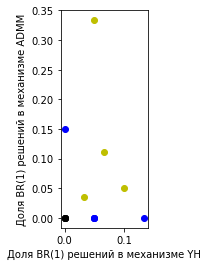

In [ ]:
f=plt.figure();
p=f.add_subplot(111);
tab=[];
for player in YH_ADMMRationalShare.player_id.unique():
  yh = YH_ADMMRationalShare.loc[YH_ADMMRationalShare['player_id']==player]['YHBr1Share'].values[0]
  admm = YH_ADMMRationalShare.loc[YH_ADMMRationalShare['player_id']==player]['ADMMBr1Share'].values[0]
  if (admm>0) & (yh>0):
    p.scatter(yh, admm, c='y')
  elif (admm==0) & (yh==0):
    p.scatter(yh, admm, c='k')
  else:
    p.scatter(yh, admm, c='b')
  tab.append([player, yhgame, admmgame, yh, admm, cons_yh, cons_admm])  
p.axis('scaled')
#p.set_xlabel('Share of BR(1) decisions in YH games')
#p.set_ylabel('Share of BR(1) decisions in ADMM games')
p.set_xlabel('Доля BR(1) решений в механизме YH')
p.set_ylabel('Доля BR(1) решений в механизме ADMM')
plt.show() 
f.savefig('diagBR1_yellow.png', dpi=400) 

In [ ]:
tab=pd.DataFrame(tab, columns=(['Игрок', 'Игра YH', 'Игра ADMM', 'BR(1) в YH', 'BR(1) в ADMM', 'Консенсус в YH', 'Консенсус в ADMM'])).sort_values(by=['Консенсус в YH', 'Консенсус в ADMM'])
def highlight(s):
  x=s.copy()
  condred=(x['Консенсус в YH']=='-')& (x['Консенсус в ADMM']=='-')
  condmag=(x['Консенсус в YH']=='-')& (x['Консенсус в ADMM']=='+')
  x.loc[condred, :]='background-color: red'
  x.loc[~condred, :]='background-color: green'
  x.loc[condmag, :]='background-color: magenta'
  return x

c=tab.style.apply(highlight, axis=None)
#c.to_excel('tabBr1new.xlsx')
c

,Игрок,Игра YH,Игра ADMM,BR(1) в YH,BR(1) в ADMM,Консенсус в YH,Консенсус в ADMM
0,25,{94},{82},0.033333,0.034483,-,-
1,28,{94},{82},0.000000,0.000000,-,-
2,32,{94},{82},0.066667,0.111111,-,-
3,3,{94},{82},0.133333,0.000000,-,-
4,35,{94},{82},0.050000,0.000000,-,-
5,42,{94},{82},0.100000,0.050000,-,-
6,41,{94},{82},0.000000,0.000000,-,-
7,38,{94},{82},0.050000,0.000000,-,-
8,39,{94},{82},0.000000,0.000000,-,-
9,40,{94},{82},0.050000,0.000000,-,-


In [ ]:
c.to_latex('tabBR_YH_ADMM.tex')

In [ ]:
Rational_score=pd.merge(YHRationalShare, ADMMRationalShare, on='player_id', how='inner')
Rational_score=Rational_score[['player_id', 'YHBr1Share', 'ADMMBr1Share', 'YHTwbrShare', 'ADMMTwbrShare', 'yhscore', 'boydscore']]
Rational_score

,player_id,YHBr1Share,ADMMBr1Share,YHTwbrShare,ADMMTwbrShare,yhscore,boydscore
0,25,0.033333,0.034483,0.650000,0.448276,4,3
1,28,0.000000,0.000000,0.368421,0.629630,4,3
2,32,0.066667,0.111111,0.283333,0.629630,3,2
3,3,0.133333,0.000000,0.533333,0.450000,4,5
4,35,0.050000,0.000000,0.600000,0.666667,2,2
5,42,0.100000,0.050000,0.350000,0.550000,1,3
6,41,0.000000,0.000000,0.300000,0.500000,2,2
7,38,0.050000,0.000000,0.600000,0.000000,3,4
8,39,0.000000,0.000000,0.210526,0.125000,1,3
9,40,0.050000,0.000000,0.550000,0.500000,1,4


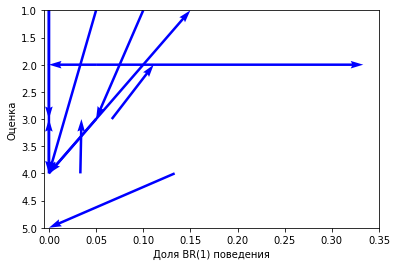

In [ ]:
t=plt.figure(1);
f=t.add_subplot(111);
for index, row in Rational_score.iterrows():
  y=row['YHBr1Share']; ys=row['yhscore'];
  ad=row['ADMMBr1Share']; ads=row['boydscore'];
  f.quiver(y, ys, ad-y, ads-ys, angles='xy', scale_units='xy', scale = 1, color='blue')
f.axis([-0.005, 0.35, 5, 1]);  
f.set_xlabel('Доля BR(1) поведения')
f.set_ylabel('Оценка')
t.savefig('arrowsBr1.png', dpi=200)

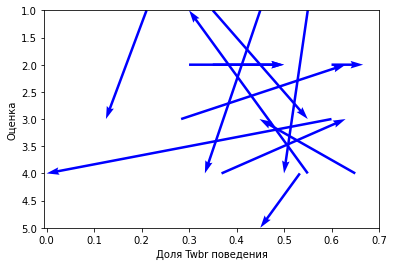

In [ ]:
t=plt.figure(1);
f=t.add_subplot(111);
for index, row in Rational_score.iterrows():
  y=row['YHTwbrShare']; ys=row['yhscore'];
  ad=row['ADMMTwbrShare']; ads=row['boydscore'];
  f.quiver(y, ys, ad-y, ads-ys, angles='xy', scale_units='xy', scale = 1, color='blue')
f.axis([-0.005, 0.7, 5, 1]);  
f.set_xlabel('Доля Twbr поведения')
f.set_ylabel('Оценка')
t.savefig('arrowsTwbr_rus.png', dpi=200)

#Цепочки WCB Продолжение иследования константного поведения - уточнение связи с Вишерой и Парето улучшениями

In [ ]:
YHData=YHData.sort_values(by=['Game', 'GrSubject'])
YHData=YHData.reset_index(drop=True)

In [ ]:
rowsCB=[]
for index, row in YHData.iterrows():
  if row['Time']>1:
    if (row['iscb1']==1) or (YHData.iloc[index-1]['iscb1'] ==1):
      rowsCB.append(index)
len(rowsCB)    

379

In [ ]:
YH_WCBchains=YHData[YHData.index.isin(rowsCB)]
YH_WCBchains.head(10)

,Game,Time,Subject,Group,GrSubject,Type,Gain,Penalty,x,s1,...,br0.5,br1,twbr,game,subject,player_id,x>x_prev,pen<pen_prev,gain>gain_prev,yhscore
1,40,2,11,1,1,1,1.142498,0.117700,0.588099,NaN,...,0.0,0.0,1.0,40,11,25,0,1,0,4
2,40,3,11,1,1,1,1.131904,0.107000,0.534884,NaN,...,0.0,0.0,0.0,40,11,25,0,1,0,4
3,40,4,11,1,1,1,1.438479,0.055825,1.232943,NaN,...,0.0,0.0,1.0,40,11,25,0,1,0,4
4,40,5,11,1,1,1,2.043182,5.836250,61.085450,NaN,...,0.0,0.0,1.0,40,11,25,0,0,0,4
6,40,7,11,1,1,1,1.363892,0.066000,1.044591,NaN,...,0.0,0.0,1.0,40,11,25,0,1,0,4
7,40,8,11,1,1,1,1.390400,0.072000,1.138614,NaN,...,0.0,0.0,1.0,40,11,25,0,1,0,4
8,40,9,11,1,1,1,3.818689,2.000000,32.857143,NaN,...,0.0,0.0,1.0,40,11,25,0,0,0,4
23,40,24,11,1,1,1,1.260253,0.085250,0.810378,NaN,...,0.0,0.0,1.0,40,11,25,0,1,0,4
24,40,25,11,1,1,1,1.114440,0.113000,0.506608,NaN,...,0.0,0.0,0.0,40,11,25,0,1,0,4
25,40,26,11,1,1,1,1.671226,0.035750,1.913767,NaN,...,0.0,0.0,1.0,40,11,25,0,1,0,4


In [ ]:
length=0
drop_indices=[]
YH_WCB_long=YH_WCBchains.copy()
for index, row in YH_WCBchains.iterrows():  
  if row['iscb1']==1:
    length=length+1
    drop_indices.append(index)
  else:
    if length<3:
      drop_indices.append(index)
      YH_WCB_long=YH_WCB_long.drop(labels=drop_indices, axis=0)  
    drop_indices=[]
    length=0 

In [ ]:
YH_WCB_long=YH_WCB_long.reset_index(drop=True)

In [ ]:
diff=[]
for index, row in YH_WCB_long.iterrows():
  if row['iscb1']==0:
    diff.append(YH_WCB_long.loc[index-1]['Gain']-YH_WCB_long.loc[index-2]['Gain'])

In [ ]:
print(len(diff))
print(sum(x>0 for x in diff))

37
12


In [ ]:
def WCB_chains(Data):
  Data=Data.sort_values(by=['Game', 'GrSubject'])
  Data=Data.reset_index(drop=True)
  rowsCB=[]
  for index, row in Data.iterrows():
    if row['Time']>1:
      if (row['iscb1']==1) or (Data.iloc[index-1]['iscb1'] ==1):
        rowsCB.append(index)

  WCBchains=Data[Data.index.isin(rowsCB)]

  length=0
  drop_indices=[]
  WCB_long=WCBchains.copy()
  for index, row in WCBchains.iterrows():  
    if row['iscb1']==1:
      length=length+1
      drop_indices.append(index)
    else:
      if length<3:
        drop_indices.append(index)
        WCB_long=WCB_long.drop(labels=drop_indices, axis=0)  
      drop_indices=[]
      length=0  
  WCB_long=WCB_long.reset_index(drop=True)  

  diff=[]
  for index, row in WCB_long.iterrows():
    if row['iscb1']==0:
      diff.append(WCB_long.loc[index-1]['Gain']-WCB_long.loc[index-2]['Gain'])  
  return(WCB_long)

In [ ]:
YH_WCB_chains=WCB_chains(YHData)
#YH_WCB_chains.to_excel('YH_WCB_chains.xlsx')

In [ ]:
ADMM_WCB_chains=WCB_chains(ADMMData)

In [ ]:
diff=[]
for index, row in ADMM_WCB_chains.iterrows():
  if row['iscb1']==0:
    diff.append(ADMM_WCB_chains.loc[index-1]['Gain']-ADMM_WCB_chains.loc[index-2]['Gain']) 
print(len(diff))
print(sum(x>0 for x in diff))      

19
8


In [ ]:
GL_WCB_chains=WCB_chains(GLData)
#GL_WCB_chains.to_excel('GL_WCB_chains.xlsx')
diff=[]
for index, row in GL_WCB_chains.iterrows():
  if row['iscb1']==0:
    diff.append(GL_WCB_chains.loc[index-1]['Gain']-GL_WCB_chains.loc[index-2]['Gain']) 
print(len(diff))
print(sum(x>0 for x in diff)) 

32
6


In [ ]:
GLR_WCB_chains=WCB_chains(GLRData)
#GLR_WCB_chains.to_excel('GLR_WCB_chains.xlsx')
diff=[]
for index, row in GLR_WCB_chains.iterrows():
  if row['iscb1']==0:
    diff.append(GLR_WCB_chains.loc[index-1]['Gain']-GLR_WCB_chains.loc[index-2]['Gain']) 
print(len(diff))
print(sum(x>0 for x in diff)) 

59
20


In [ ]:
YH_chains_gains=[]
h=[]
for index, row in YH_WCB_chains.iterrows():
  if row['iscb1']==1:
    h.append(row['Gain'])
  else:
    YH_chains_gains.append(h)
    h=[]

In [ ]:
#шаги, где только один действует 
YHData=YHData.sort_values(by=['Game', 'Time'])
YHData=YHData.reset_index(drop=True)

In [ ]:
two_wait=[]
for game in YHData.Game.unique():
    Game=YHData[YHData['Game']==game]
    for time in Game.Time.unique():
      T=Game[Game['Time']==time]
      s=T.iscb0.sum()
      if s>=2:
        two_wait.append([game, time])

In [ ]:
ind=[]
for index, row in YHData.iterrows():
  if ([row['Game'], row['Time']]  in (two_wait)) or ([row['Game'], row['Time']-1]  in (two_wait)) or ([row['Game'], row['Time']+1]  in (two_wait)):
    ind.append(index)
YH_twowait=YHData[YHData.index.isin(ind)]

In [ ]:
ind=list(set(ind))

In [ ]:
YH_twowait=YH_twowait.drop(columns=[ 'AcceptAdvice', 'CalcCount',
       'CalcAdviceCount', 'UseHelp', 'Unnamed: 16', 'Util', 'Ui>Uprev', 'Uloci>Ulocprev', 'Uall>Uprev', 'Unew>Uprev',
       'Fnew>Fprev', 'Fnew>=Fprev', 'anyFnew>Fprev', 'Fi>Fprev', 'Fi>=Fprev',
       'anyFi>Fprev', 'Fii>Fiprev', 'Ui', 'Uloci', 'Unew', 'Uprev', 'Ulocnew',
       'Ulocnew>Ulocprev', 'dsi', 'dxi', 'dti', 'g', 'br', 'br0', 'br0.5',
       'br1', 'twbr'])
YH_twowait.to_excel('YH_twowait.xlsx')

In [ ]:
YH_twowait.shape[0]

200

In [ ]:
def twowait(Data):
  Data=Data.sort_values(by=['Game', 'Time'])
  Data=Data.reset_index(drop=True)

  two_wait=[]
  for game in Data.Game.unique():
    Game=Data[Data['Game']==game]
    for time in Game.Time.unique():
      T=Game[Game['Time']==time]
      s=T.iscb0.sum()
      if s>=2:
        two_wait.append([game, time]) 

  ind=[]
  for index, row in Data.iterrows():
    if ([row['Game'], row['Time']]  in (two_wait)) or ([row['Game'], row['Time']-1]  in (two_wait)) or ([row['Game'], row['Time']+1]  in (two_wait)):
      ind.append(index)    
  Data_twowait=Data[Data.index.isin(ind)]
  Data_twowait=Data_twowait.drop(columns=[ 'AcceptAdvice', 'CalcCount',
       'CalcAdviceCount', 'UseHelp', 'Unnamed: 16', 'Util', 'Ui>Uprev', 'Uloci>Ulocprev', 'Uall>Uprev', 'Unew>Uprev',
       'Fnew>Fprev', 'Fnew>=Fprev', 'anyFnew>Fprev', 'Fi>=Fprev',
       'anyFi>Fprev', 'Fii>Fiprev',  'Uloci', 'Unew', 'Uprev', 'Ulocnew',
       'Ulocnew>Ulocprev', 'dsi', 'dxi', 'dti', 'br0', 'br0.5',
       'br1', 'twbr'])
  
  print(len(two_wait))
  for index, row in Data_twowait.iterrows():
    if ([row['Game'], row['Time']] in two_wait) and (row['iscb0']==0) and (row['Fi>Fprev']):
      print([row['Game'], row['Time']])
  return (Data_twowait)

In [ ]:
YH_twowait=twowait(YHData)
YH_twowait.to_excel('YH_twowait.xlsx')

32
[56.0, 29.0]
[93.0, 8.0]


In [ ]:
ADMM_twowait=twowait(ADMMData)
#ADMM_twowait.to_excel('ADMM_twowait.xlsx')

15


In [ ]:
ADMM_twowait.shape[0]

77

In [ ]:
GL_twowait=twowait(GLData)
#GL_twowait.to_excel('GL_twowait.xlsx')

In [ ]:
GL_twowait.shape[0]

In [ ]:
GLR_twowait=twowait(GLRData)
#GLR_twowait.to_excel('GLR_twowait.xlsx')

In [ ]:
GLR_twowait.shape[0]

##Выход из wcb(0)


In [ ]:
def stop_wcb (Data): #работает так же, как предыдущая функция
   wcb0=Data.copy()
   wcb0['prevcb0'] = wcb0.groupby(['Game','GrSubject'])['iscb0'].shift(1)
   return wcb0[ ((wcb0['iscb0']==1)&(wcb0['Time']>1)) | ((wcb0['prevcb0']==1)&(wcb0['iscb0']==0)) ]

In [ ]:
YH_wcb0=stop_wcb(YHData)
YH_wcb0=YH_wcb0.drop(columns=[ 'AcceptAdvice', 'CalcCount',
       'CalcAdviceCount', 'UseHelp', 'Unnamed: 16', 'Util', 'Ui>Uprev', 'Uloci>Ulocprev', 'Uall>Uprev', 'Unew>Uprev',
       'Fnew>Fprev', 'Fnew>=Fprev', 'anyFnew>Fprev',
       'anyFi>Fprev', 'Fii>Fiprev', 'Ui', 'Uloci', 'Unew', 'Uprev', 'Ulocnew',
       'Ulocnew>Ulocprev', 'dsi', 'dxi', 'dti', 'br0', 'br0.5',
       'br1', 'twbr', 'br', 'g', 'Fi>=Fprev'])

In [ ]:
YH_wcb0=YH_wcb0.sort_values(by=['Game', 'Time', 'GrSubject'])
YH_wcb0=YH_wcb0.reset_index(drop=True)

In [ ]:
YH_wcb0=YH_wcb0.reset_index(drop=True)

В следующих ячейках выводится: 1) сколько всего было прекращений константного поведения 2) сколько из них были в сторону Парето-улучшения


In [ ]:
print(YH_wcb0.shape[0]-YH_wcb0['iscb0'].sum())
len(YH_wcb0[(YH_wcb0['iscb0']==0) & (YH_wcb0['Fi>Fprev']==1)])

In [ ]:
ADMM_wcb0=stop_wcb(ADMMData)
ADMM_wcb0=ADMM_wcb0.drop(columns=[ 'AcceptAdvice', 'CalcCount',
       'CalcAdviceCount', 'UseHelp', 'Unnamed: 16', 'Util', 'Ui>Uprev', 'Uloci>Ulocprev', 'Uall>Uprev', 'Unew>Uprev',
       'Fnew>Fprev', 'Fnew>=Fprev', 'anyFnew>Fprev',
       'anyFi>Fprev', 'Fii>Fiprev', 'Ui', 'Uloci', 'Unew', 'Uprev', 'Ulocnew',
       'Ulocnew>Ulocprev', 'dsi', 'dxi', 'dti', 'br0', 'br0.5',
       'br1', 'twbr', 'br',  'Fi>=Fprev'])

In [ ]:
print(ADMM_wcb0.shape[0]-ADMM_wcb0['iscb0'].sum())
len(ADMM_wcb0[(ADMM_wcb0['iscb0']==0) & (ADMM_wcb0['Fi>Fprev']==1)])

In [ ]:
GL_wcb0=stop_wcb(GLData)
GL_wcb0=GL_wcb0.drop(columns=[ 'AcceptAdvice', 'CalcCount',
       'CalcAdviceCount', 'UseHelp', 'Unnamed: 16', 'Util', 'Ui>Uprev', 'Uloci>Ulocprev', 'Uall>Uprev', 'Unew>Uprev',
       'Fnew>Fprev', 'Fnew>=Fprev', 'anyFnew>Fprev',
       'anyFi>Fprev', 'Fii>Fiprev', 'Ui', 'Uloci', 'Unew', 'Uprev', 'Ulocnew',
       'Ulocnew>Ulocprev', 'dsi', 'dxi', 'dti', 'br0', 'br0.5',
       'br1', 'twbr', 'Fi>=Fprev', 'BR1', 'BR2', 'BR3', 'twdbr1', 'twdbr2', 'twdbr3'])
GL_wcb0.head(10)

In [ ]:
print(GL_wcb0.shape[0]-GL_wcb0['iscb0'].sum())
len(GL_wcb0[(GL_wcb0['iscb0']==0) & (GL_wcb0['Fi>Fprev']==1)])

In [ ]:
GLR_wcb0=stop_wcb(GLRData)
GLR_wcb0=GLR_wcb0.drop(columns=[ 'AcceptAdvice', 'CalcCount',
       'CalcAdviceCount', 'UseHelp', 'Unnamed: 16', 'Util', 'Ui>Uprev', 'Uloci>Ulocprev', 'Uall>Uprev', 'Unew>Uprev',
       'Fnew>Fprev', 'Fnew>=Fprev', 'anyFnew>Fprev',
       'anyFi>Fprev', 'Fii>Fiprev', 'Ui', 'Uloci', 'Unew', 'Uprev', 'Ulocnew',
       'Ulocnew>Ulocprev', 'dsi', 'dxi', 'dti', 'br0', 'br0.5',
       'br1', 'twbr', 'Fi>=Fprev', 'BR1', 'BR2', 'BR3', 'twdbr1', 'twdbr2', 'twdbr3'])
GLR_wcb0.head(10)

In [ ]:
print(GLR_wcb0.shape[0]-GLR_wcb0['iscb0'].sum())
len(GLR_wcb0[(GLR_wcb0['iscb0']==0) & (GLR_wcb0['Fi>Fprev']==1)])

In [ ]:
WCB_stops=pd.DataFrame({'YH':[YH_wcb0.shape[0]-YH_wcb0['iscb0'].sum(), len(YH_wcb0[(YH_wcb0['iscb0']==0) & (YH_wcb0['Fi>Fprev']==1)])], 
                        'ADMM':[ADMM_wcb0.shape[0]-ADMM_wcb0['iscb0'].sum(), len(ADMM_wcb0[(ADMM_wcb0['iscb0']==0) & (ADMM_wcb0['Fi>Fprev']==1)])],
                        'GL':[GL_wcb0.shape[0]-GL_wcb0['iscb0'].sum(), len(GL_wcb0[(GL_wcb0['iscb0']==0) & (GL_wcb0['Fi>Fprev']==1)])], 
                        'GLR':[GLR_wcb0.shape[0]-GLR_wcb0['iscb0'].sum(), len(GLR_wcb0[(GLR_wcb0['iscb0']==0) & (GLR_wcb0['Fi>Fprev']==1)])]})
WCB_stops=WCB_stops.rename(index={0:'Всего прекращений константного поведения', 1: 'Из них были в сторону Парето-улучшения'})
WCB_stops

***Составь таблицу из предыдущих данных [число остановок, в сторону Парето] x [механизмы]***

In [ ]:
YHData.columns

In [ ]:

k=0
YHData=YHData.sort_values(by=['Game', 'Time'])
YHData=YHData.reset_index(drop=True)
for game in YHData.Game.unique():
  g=YHData[YHData['Game']==game]
  for time in g.Time.unique():
    t=g[g['Time']==time]
    u=t['Ui']
    iscb=t['iscb0'] # не используется
    umin=t[t['Ui']==min(u)]
    if umin['iscb0'].all()==0:
      k=k+1
print(YHData.shape[0]/3, k)

##Гипотеза: шаг делает тот, у кого наименьшее Ui (среди ситуаций, когда остальные не двигаются?)

In [ ]:
def minUi_nonconstant(Data):
  pr2 = Data[Data.Time>1].groupby(['Game','Time']).apply(lambda x: (x.iscb0==1).sum()==2).sum()
  c_iscb0 = Data[Data.Time>1].groupby(['Game','Time'])['iscb0'].sum() 
  Umin = Data[Data.Time>1].groupby(['Game','Time'])['Ui'].min() 
  newData = pd.merge(Data.merge(Umin, how='left', on=['Game', 'Time']), c_iscb0, how='left', on=['Game', 'Time'])
  newData['isminU'] = (newData['Ui_x']==newData['Ui_y'])
  newData= newData[newData['isminU'].shift(3).fillna(False)]
  finalData = newData[(newData['iscb0_y']==2)&(newData['iscb0_x']==0)] 
  return (finalData[['Game', 'Time', 'GrSubject','Ui_y']], finalData.shape[0]/pr2) 

In [ ]:
print(minUi_nonconstant(YHData)[1])
print(minUi_nonconstant(ADMMData)[1])
print(minUi_nonconstant(GLData)[1])
print(minUi_nonconstant(GLRData)[1])

###Если предыдущее выполнено, то заявка направлена на то, чтобы сделать Ui не наименьшим? 

In [ ]:
#в minUi_nonconstant получаем таблицу, где есть Ui, Umin для данного шага, не предыдущего
#нам нужны шаги из minUi_nonconstant + предыдущие шаги, чтобы сравнить с ними текущие шаги 
def Ui_direction(Data):
  gt=minUi_nonconstant(Data)[0][['Game', 'Time', 'GrSubject']]
  gt1=gt.copy()
  gt1['Time']=gt1['Time']-1
  gt.to_excel('gt.xlsx')
  gt1.to_excel('gt1.xlsx')
  cur_steps=Data.merge(gt, how='inner', on=['Game', 'Time',  'GrSubject'])
  cur_steps['cur']=1
  prev_steps=Data.merge(gt1, how='inner', on=['Game', 'Time'])
  prev_steps['cur']=0
  newData=pd.concat([cur_steps, prev_steps]).sort_values(by=['Game', 'Time', 'GrSubject'])
  Umin = newData.groupby(['Game','Time'])['Ui'].min() 
  newData = pd.merge(newData, Umin, how='left', on=['Game', 'Time']) 
  newData.to_excel('trash.xlsx')
  return(newData[(newData.cur==1)&(newData.Ui_x>newData.Ui_y.shift(1))].shape[0]/gt.shape[0])

  #Uloci>Umin

In [ ]:
print(Ui_direction(YHData))
print(Ui_direction(ADMMData))
print(Ui_direction(GLData))
print(Ui_direction(GLRData))